<ipython-input-5-2c4495a83698>:7964: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df1['Date'] = pd.to_datetime(data['FECHA'], dayfirst=True )


Epoch 0 Loss: 0.0006121654296293855
Epoch 10 Loss: 0.0001784878404578194
Epoch 20 Loss: 0.00032951452885754406
Epoch 30 Loss: 0.0002037326485151425
Epoch 40 Loss: 0.0003233868337702006
Epoch 50 Loss: 0.0003399965353310108
Epoch 60 Loss: 0.00022964926029089838
Epoch 70 Loss: 0.0001370414684060961
Epoch 80 Loss: 7.361792086157948e-05
Epoch 90 Loss: 4.330692536314018e-05


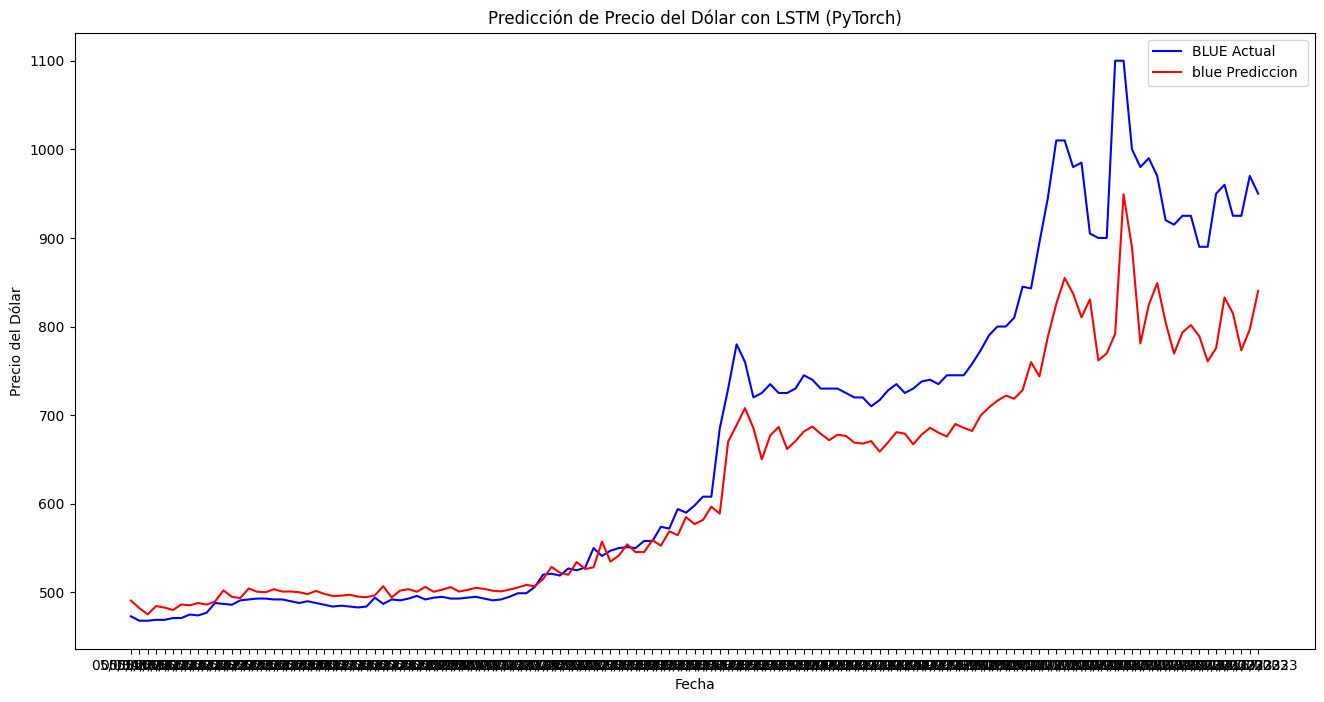

In [5]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Supongamos que tienes un archivo CSV con las columnas 'Date' y 'Rate' (precio del dólar).
# Asegúrate de tener instaladas las bibliotecas necesarias con: pip install numpy pandas matplotlib scikit-learn torch

# Carga de datos (asegúrate de tener un archivo CSV con las columnas 'Date' y 'Rate')
#df = pd.read_csv('tu_archivo.csv')

df = [
 {
  "FECHA": "12/01/2020",
  "PESO": 86.95,
  "BLUE": 153,
  "AL30": 5551,
  "AL30D": 38.5,
  "AL30C": 37.5,
  "GL30": 5890,
  "GL30D": 40.68,
  "GL30C": 39.55
 },
 {
  "FECHA": "12/02/2020",
  "PESO": 87,
  "BLUE": 153,
  "AL30": 5559.5,
  "AL30D": 38.62,
  "AL30C": 37.63,
  "GL30": 5840,
  "GL30D": 40.61,
  "GL30C": 39.49
 },
 {
  "FECHA": "12/03/2020",
  "PESO": 87.14,
  "BLUE": 151,
  "AL30": 5440,
  "AL30D": 38.86,
  "AL30C": 37.8,
  "GL30": 5695,
  "GL30D": 40.5,
  "GL30C": 39.2
 },
 {
  "FECHA": "12/04/2020",
  "PESO": 87.17,
  "BLUE": 150,
  "AL30": 5489.5,
  "AL30D": 38.8,
  "AL30C": 37.84,
  "GL30": 5700,
  "GL30D": 39.94,
  "GL30C": 38.95
 },
 {
  "FECHA": "12/09/2020",
  "PESO": 87.38,
  "BLUE": 149,
  "AL30": 5474,
  "AL30D": 39.1,
  "AL30C": 38.21,
  "GL30": 5610,
  "GL30D": 40,
  "GL30C": 39
 },
 {
  "FECHA": "12/10/2020",
  "PESO": 87.84,
  "BLUE": 146,
  "AL30": 5460,
  "AL30D": 39.57,
  "AL30C": 38.65,
  "GL30": 5615,
  "GL30D": 40.6,
  "GL30C": 39.41
 },
 {
  "FECHA": "12/11/2020",
  "PESO": 87.85,
  "BLUE": 148,
  "AL30": 5534,
  "AL30D": 40.01,
  "AL30C": 39.5,
  "GL30": 5730,
  "GL30D": 40.79,
  "GL30C": 39.91
 },
 {
  "FECHA": "12/14/2020",
  "PESO": 87.96,
  "BLUE": 151,
  "AL30": 5658.5,
  "AL30D": 40.3,
  "AL30C": 39.5,
  "GL30": 5860,
  "GL30D": 41.5,
  "GL30C": 40.7
 },
 {
  "FECHA": "12/15/2020",
  "PESO": 88.12,
  "BLUE": 151,
  "AL30": 5675,
  "AL30D": 40.03,
  "AL30C": 39.5,
  "GL30": 5790,
  "GL30D": 40.66,
  "GL30C": 40.1
 },
 {
  "FECHA": "12/16/2020",
  "PESO": 88.13,
  "BLUE": 150,
  "AL30": 5594.5,
  "AL30D": 39.72,
  "AL30C": 39.38,
  "GL30": 5770,
  "GL30D": 40.8,
  "GL30C": 40.4
 },
 {
  "FECHA": "12/17/2020",
  "PESO": 88.18,
  "BLUE": 149,
  "AL30": 5582,
  "AL30D": 39.81,
  "AL30C": 39.32,
  "GL30": 5770,
  "GL30D": 41.01,
  "GL30C": 40.48
 },
 {
  "FECHA": "12/18/2020",
  "PESO": 88.26,
  "BLUE": 150,
  "AL30": 5669.5,
  "AL30D": 40.15,
  "AL30C": 39.85,
  "GL30": 5865,
  "GL30D": 41.4,
  "GL30C": 40.8
 },
 {
  "FECHA": "12/21/2020",
  "PESO": 88.76,
  "BLUE": 150,
  "AL30": 5674,
  "AL30D": 40.71,
  "AL30C": 40.45,
  "GL30": 5755,
  "GL30D": 41.15,
  "GL30C": 40.94
 },
 {
  "FECHA": "12/22/2020",
  "PESO": 88.8,
  "BLUE": 152,
  "AL30": 5684.5,
  "AL30D": 40.74,
  "AL30C": 40.5,
  "GL30": 5750,
  "GL30D": 41.25,
  "GL30C": 40.8
 },
 {
  "FECHA": "12/23/2020",
  "PESO": 88.92,
  "BLUE": 151,
  "AL30": 5701.5,
  "AL30D": 40.62,
  "AL30C": 40.59,
  "GL30": 5855,
  "GL30D": 41.3,
  "GL30C": 41.15
 },
 {
  "FECHA": "12/28/2020",
  "PESO": 89.24,
  "BLUE": 159,
  "AL30": 5745,
  "AL30D": 40.63,
  "AL30C": 40.8,
  "GL30": 5925,
  "GL30D": 41.89,
  "GL30C": 41.5
 },
 {
  "FECHA": "12/29/2020",
  "PESO": 89.7,
  "BLUE": 164,
  "AL30": 5740,
  "AL30D": 40.95,
  "AL30C": 40.85,
  "GL30": 5850,
  "GL30D": 41.19,
  "GL30C": 41.1
 },
 {
  "FECHA": "12/30/2020",
  "PESO": 89.87,
  "BLUE": 165,
  "AL30": 5740,
  "AL30D": 40.99,
  "AL30C": 40.86,
  "GL30": 5901,
  "GL30D": 41.59,
  "GL30C": 41.31
 },
 {
  "FECHA": "01/04/2021",
  "PESO": 90.22,
  "BLUE": 166,
  "AL30": 5772.5,
  "AL30D": 40.4,
  "AL30C": 40.55,
  "GL30": 5859,
  "GL30D": 40.5,
  "GL30C": 40.25
 },
 {
  "FECHA": "01/05/2021",
  "PESO": 90.55,
  "BLUE": 165,
  "AL30": 5785,
  "AL30D": 40.2,
  "AL30C": 40.15,
  "GL30": 5875,
  "GL30D": 40.27,
  "GL30C": 40.15
 },
 {
  "FECHA": "01/06/2021",
  "PESO": 90.55,
  "BLUE": 160,
  "AL30": 5810,
  "AL30D": 40.16,
  "AL30C": 40.05,
  "GL30": 5980,
  "GL30D": 40.95,
  "GL30C": 40.6
 },
 {
  "FECHA": "01/07/2021",
  "PESO": 90.68,
  "BLUE": 160,
  "AL30": 5775,
  "AL30D": 39.69,
  "AL30C": 39.7,
  "GL30": 6005,
  "GL30D": 40.6,
  "GL30C": 40.6
 },
 {
  "FECHA": "01/08/2021",
  "PESO": 90.79,
  "BLUE": 162,
  "AL30": 5765,
  "AL30D": 39.22,
  "AL30C": 39.45,
  "GL30": 5975,
  "GL30D": 40.46,
  "GL30C": 40.05
 },
 {
  "FECHA": "01/11/2021",
  "PESO": 90.99,
  "BLUE": 161,
  "AL30": 5703,
  "AL30D": 38.85,
  "AL30C": 39,
  "GL30": 5891,
  "GL30D": 40.27,
  "GL30C": 39.95
 },
 {
  "FECHA": "01/12/2021",
  "PESO": 91.07,
  "BLUE": 159,
  "AL30": 5668,
  "AL30D": 38.85,
  "AL30C": 39,
  "GL30": 5905,
  "GL30D": 40.35,
  "GL30C": 39.45
 },
 {
  "FECHA": "01/13/2021",
  "PESO": 91.03,
  "BLUE": 159,
  "AL30": 5649,
  "AL30D": 38.85,
  "AL30C": 38.95,
  "GL30": 5753,
  "GL30D": 39.36,
  "GL30C": 38.6
 },
 {
  "FECHA": "01/14/2021",
  "PESO": 91.19,
  "BLUE": 160,
  "AL30": 5639,
  "AL30D": 38.52,
  "AL30C": 38.65,
  "GL30": 5724,
  "GL30D": 39,
  "GL30C": 38.47
 },
 {
  "FECHA": "01/15/2021",
  "PESO": 91.14,
  "BLUE": 159,
  "AL30": 5623,
  "AL30D": 38.6,
  "AL30C": 38.45,
  "GL30": 5784,
  "GL30D": 39.09,
  "GL30C": 38.3
 },
 {
  "FECHA": "01/18/2021",
  "PESO": 91.31,
  "BLUE": 159,
  "AL30": 5637,
  "AL30D": 38.6,
  "AL30C": 38.29,
  "GL30": 5820,
  "GL30D": 39.68,
  "GL30C": 38.9
 },
 {
  "FECHA": "01/19/2021",
  "PESO": 91.77,
  "BLUE": 159,
  "AL30": 5650,
  "AL30D": 38.65,
  "AL30C": 38.16,
  "GL30": 5869,
  "GL30D": 39.95,
  "GL30C": 39.11
 },
 {
  "FECHA": "01/20/2021",
  "PESO": 91.76,
  "BLUE": 157,
  "AL30": 5643,
  "AL30D": 38.68,
  "AL30C": 38.1,
  "GL30": 5890,
  "GL30D": 40.12,
  "GL30C": 39.2
 },
 {
  "FECHA": "01/21/2021",
  "PESO": 91.91,
  "BLUE": 156,
  "AL30": 5638,
  "AL30D": 38.63,
  "AL30C": 37.93,
  "GL30": 5885,
  "GL30D": 39.9,
  "GL30C": 38.76
 },
 {
  "FECHA": "01/22/2021",
  "PESO": 92,
  "BLUE": 156,
  "AL30": 5639,
  "AL30D": 38.63,
  "AL30C": 37.93,
  "GL30": 5940,
  "GL30D": 40.5,
  "GL30C": 39.35
 },
 {
  "FECHA": "01/25/2021",
  "PESO": 92.35,
  "BLUE": 156,
  "AL30": 5657,
  "AL30D": 38.58,
  "AL30C": 37.89,
  "GL30": 5972,
  "GL30D": 40.4,
  "GL30C": 39.25
 },
 {
  "FECHA": "01/26/2021",
  "PESO": 92.4,
  "BLUE": 156,
  "AL30": 5662,
  "AL30D": 38.54,
  "AL30C": 37.85,
  "GL30": 6010,
  "GL30D": 40.4,
  "GL30C": 39.21
 },
 {
  "FECHA": "01/27/2021",
  "PESO": 92.44,
  "BLUE": 154,
  "AL30": 5650.5,
  "AL30D": 38.37,
  "AL30C": 37.72,
  "GL30": 5984.5,
  "GL30D": 40.3,
  "GL30C": 39.2
 },
 {
  "FECHA": "01/28/2021",
  "PESO": 92.58,
  "BLUE": 154,
  "AL30": 5665,
  "AL30D": 38.25,
  "AL30C": 37.57,
  "GL30": 5970,
  "GL30D": 40.04,
  "GL30C": 38.9
 },
 {
  "FECHA": "01/29/2021",
  "PESO": 92.7,
  "BLUE": 153,
  "AL30": 5639,
  "AL30D": 38.04,
  "AL30C": 37.47,
  "GL30": 5950,
  "GL30D": 40.04,
  "GL30C": 38.88
 },
 {
  "FECHA": "02/01/2021",
  "PESO": 92.99,
  "BLUE": 153,
  "AL30": 5650,
  "AL30D": 38.14,
  "AL30C": 37.42,
  "GL30": 5999.5,
  "GL30D": 40.4,
  "GL30C": 39.25
 },
 {
  "FECHA": "02/02/2021",
  "PESO": 93.06,
  "BLUE": 153,
  "AL30": 5665,
  "AL30D": 38,
  "AL30C": 37.31,
  "GL30": 5981,
  "GL30D": 39.94,
  "GL30C": 38.78
 },
 {
  "FECHA": "02/03/2021",
  "PESO": 92.96,
  "BLUE": 153,
  "AL30": 5635,
  "AL30D": 37.75,
  "AL30C": 37.17,
  "GL30": 5955,
  "GL30D": 39.61,
  "GL30C": 38.4
 },
 {
  "FECHA": "02/04/2021",
  "PESO": 93.19,
  "BLUE": 150,
  "AL30": 5628,
  "AL30D": 37.53,
  "AL30C": 37.04,
  "GL30": 5995,
  "GL30D": 39.72,
  "GL30C": 38.41
 },
 {
  "FECHA": "02/05/2021",
  "PESO": 93.32,
  "BLUE": 151,
  "AL30": 5615,
  "AL30D": 37.44,
  "AL30C": 38.25,
  "GL30": 6035,
  "GL30D": 39.98,
  "GL30C": 38.79
 },
 {
  "FECHA": "02/08/2021",
  "PESO": 93.57,
  "BLUE": 151,
  "AL30": 5623,
  "AL30D": 37.62,
  "AL30C": 38.25,
  "GL30": 6035,
  "GL30D": 39.98,
  "GL30C": 39.01
 },
 {
  "FECHA": "02/09/2021",
  "PESO": 93.58,
  "BLUE": 151,
  "AL30": 5615,
  "AL30D": 37.53,
  "AL30C": 36.94,
  "GL30": 5986,
  "GL30D": 39.89,
  "GL30C": 38.72
 },
 {
  "FECHA": "02/10/2021",
  "PESO": 93.73,
  "BLUE": 151,
  "AL30": 5615,
  "AL30D": 37.45,
  "AL30C": 36.86,
  "GL30": 5965,
  "GL30D": 39.66,
  "GL30C": 38.54
 },
 {
  "FECHA": "02/11/2021",
  "PESO": 93.87,
  "BLUE": 151,
  "AL30": 5445,
  "AL30D": 37.45,
  "AL30C": 36.08,
  "GL30": 5870,
  "GL30D": 39.58,
  "GL30C": 38.5
 },
 {
  "FECHA": "02/12/2021",
  "PESO": 93.95,
  "BLUE": 152,
  "AL30": 5387,
  "AL30D": 36.76,
  "AL30C": 35.5,
  "GL30": 5830,
  "GL30D": 39.8,
  "GL30C": 38.63
 },
 {
  "FECHA": "02/15/2021",
  "PESO": 94.23,
  "BLUE": 151,
  "AL30": 5180,
  "AL30D": 36.2,
  "AL30C": 35.05,
  "GL30": 5650,
  "GL30D": 39.23,
  "GL30C": 38.25
 },
 {
  "FECHA": "02/16/2021",
  "PESO": 94.29,
  "BLUE": 149,
  "AL30": 5129,
  "AL30D": 36.49,
  "AL30C": 35.73,
  "GL30": 5531,
  "GL30D": 39.05,
  "GL30C": 37.84
 },
 {
  "FECHA": "02/19/2021",
  "PESO": 94.4,
  "BLUE": 148,
  "AL30": 5079.5,
  "AL30D": 36.35,
  "AL30C": 35.3,
  "GL30": 5381,
  "GL30D": 38.6,
  "GL30C": 37.73
 },
 {
  "FECHA": "02/22/2021",
  "PESO": 94.77,
  "BLUE": 147,
  "AL30": 4975,
  "AL30D": 36.14,
  "AL30C": 35.4,
  "GL30": 5305,
  "GL30D": 38.42,
  "GL30C": 37.3
 },
 {
  "FECHA": "02/23/2021",
  "PESO": 94.83,
  "BLUE": 147,
  "AL30": 4992,
  "AL30D": 36.04,
  "AL30C": 34.85,
  "GL30": 5283,
  "GL30D": 37.79,
  "GL30C": 36.8
 },
 {
  "FECHA": "02/24/2021",
  "PESO": 95.02,
  "BLUE": 146,
  "AL30": 5060.5,
  "AL30D": 35.76,
  "AL30C": 35.2,
  "GL30": 5400,
  "GL30D": 38.11,
  "GL30C": 37.1
 },
 {
  "FECHA": "02/25/2021",
  "PESO": 95.08,
  "BLUE": 145,
  "AL30": 5210,
  "AL30D": 36.26,
  "AL30C": 35.59,
  "GL30": 5430,
  "GL30D": 38.01,
  "GL30C": 36.87
 },
 {
  "FECHA": "02/26/2021",
  "PESO": 95.12,
  "BLUE": 143,
  "AL30": 5260,
  "AL30D": 36.79,
  "AL30C": 35.92,
  "GL30": 5390,
  "GL30D": 37.63,
  "GL30C": 36.5
 },
 {
  "FECHA": "03/01/2021",
  "PESO": 95.49,
  "BLUE": 146,
  "AL30": 5305,
  "AL30D": 36.95,
  "AL30C": 36.15,
  "GL30": 5455,
  "GL30D": 37.79,
  "GL30C": 36.69
 },
 {
  "FECHA": "03/02/2021",
  "PESO": 95.67,
  "BLUE": 147,
  "AL30": 5309,
  "AL30D": 36.6,
  "AL30C": 36,
  "GL30": 5419,
  "GL30D": 36.96,
  "GL30C": 35.95
 },
 {
  "FECHA": "03/03/2021",
  "PESO": 95.73,
  "BLUE": 145,
  "AL30": 5289,
  "AL30D": 36.05,
  "AL30C": 35.69,
  "GL30": 5424,
  "GL30D": 37,
  "GL30C": 35.75
 },
 {
  "FECHA": "03/04/2021",
  "PESO": 95.75,
  "BLUE": 145,
  "AL30": 5277.5,
  "AL30D": 36.35,
  "AL30C": 35.85,
  "GL30": 5388,
  "GL30D": 36.98,
  "GL30C": 35.62
 },
 {
  "FECHA": "03/05/2021",
  "PESO": 95.69,
  "BLUE": 144,
  "AL30": 5199.5,
  "AL30D": 35.91,
  "AL30C": 35.3,
  "GL30": 5291,
  "GL30D": 36.08,
  "GL30C": 34.6
 },
 {
  "FECHA": "03/08/2021",
  "PESO": 96,
  "BLUE": 144,
  "AL30": 5161,
  "AL30D": 35.69,
  "AL30C": 32.5,
  "GL30": 5291,
  "GL30D": 36.08,
  "GL30C": 34.6
 },
 {
  "FECHA": "03/09/2021",
  "PESO": 96.07,
  "BLUE": 144,
  "AL30": 5095,
  "AL30D": 35.4,
  "AL30C": 32.6,
  "GL30": 5170,
  "GL30D": 35.26,
  "GL30C": 34.6
 },
 {
  "FECHA": "03/10/2021",
  "PESO": 96.31,
  "BLUE": 144,
  "AL30": 4860,
  "AL30D": 34.17,
  "AL30C": 32.5,
  "GL30": 4930,
  "GL30D": 34.39,
  "GL30C": 32.8
 },
 {
  "FECHA": "03/11/2021",
  "PESO": 96.45,
  "BLUE": 143,
  "AL30": 4845,
  "AL30D": 33.75,
  "AL30C": 32.6,
  "GL30": 5011,
  "GL30D": 34.65,
  "GL30C": 33.37
 },
 {
  "FECHA": "03/12/2021",
  "PESO": 96.49,
  "BLUE": 140,
  "AL30": 4900.5,
  "AL30D": 34.16,
  "AL30C": 33.48,
  "GL30": 5120,
  "GL30D": 35.31,
  "GL30C": 33.95
 },
 {
  "FECHA": "03/15/2021",
  "PESO": 96.69,
  "BLUE": 142,
  "AL30": 5035,
  "AL30D": 35,
  "AL30C": 33.87,
  "GL30": 5220,
  "GL30D": 35.95,
  "GL30C": 34.48
 },
 {
  "FECHA": "03/16/2021",
  "PESO": 96.81,
  "BLUE": 146,
  "AL30": 5113,
  "AL30D": 35.33,
  "AL30C": 34.3,
  "GL30": 5261,
  "GL30D": 36.3,
  "GL30C": 34.9
 },
 {
  "FECHA": "03/17/2021",
  "PESO": 96.76,
  "BLUE": 144,
  "AL30": 5167.5,
  "AL30D": 35.44,
  "AL30C": 34.8,
  "GL30": 5364,
  "GL30D": 36.88,
  "GL30C": 35.42
 },
 {
  "FECHA": "03/18/2021",
  "PESO": 96.83,
  "BLUE": 144,
  "AL30": 5176,
  "AL30D": 35.75,
  "AL30C": 34.63,
  "GL30": 5317,
  "GL30D": 36.61,
  "GL30C": 35.17
 },
 {
  "FECHA": "03/19/2021",
  "PESO": 96.98,
  "BLUE": 144,
  "AL30": 5150,
  "AL30D": 36,
  "AL30C": 34.54,
  "GL30": 5335,
  "GL30D": 36.95,
  "GL30C": 35.56
 },
 {
  "FECHA": "03/22/2021",
  "PESO": 97.1,
  "BLUE": 143,
  "AL30": 5199,
  "AL30D": 36.33,
  "AL30C": 35,
  "GL30": 5375,
  "GL30D": 37.55,
  "GL30C": 35.88
 },
 {
  "FECHA": "03/23/2021",
  "PESO": 97.33,
  "BLUE": 144,
  "AL30": 5151,
  "AL30D": 36.38,
  "AL30C": 34.55,
  "GL30": 5298,
  "GL30D": 37.08,
  "GL30C": 35.34
 },
 {
  "FECHA": "03/25/2021",
  "PESO": 97.45,
  "BLUE": 143,
  "AL30": 4988,
  "AL30D": 35.73,
  "AL30C": 33.75,
  "GL30": 5130,
  "GL30D": 36.3,
  "GL30C": 34.65
 },
 {
  "FECHA": "03/26/2021",
  "PESO": 97.57,
  "BLUE": 143,
  "AL30": 4860,
  "AL30D": 35.24,
  "AL30C": 33.49,
  "GL30": 5025,
  "GL30D": 36.21,
  "GL30C": 34.46
 },
 {
  "FECHA": "03/29/2021",
  "PESO": 97.61,
  "BLUE": 142,
  "AL30": 4815,
  "AL30D": 34.85,
  "AL30C": 32.82,
  "GL30": 4950,
  "GL30D": 35.65,
  "GL30C": 33.92
 },
 {
  "FECHA": "03/30/2021",
  "PESO": 97.61,
  "BLUE": 142,
  "AL30": 4780,
  "AL30D": 34.17,
  "AL30C": 32.86,
  "GL30": 4920,
  "GL30D": 35.09,
  "GL30C": 33.4
 },
 {
  "FECHA": "03/31/2021",
  "PESO": 97.69,
  "BLUE": 141,
  "AL30": 4820,
  "AL30D": 34.1,
  "AL30C": 32.9,
  "GL30": 4960,
  "GL30D": 35.01,
  "GL30C": 33.52
 },
 {
  "FECHA": "04/05/2021",
  "PESO": 98.1,
  "BLUE": 141,
  "AL30": 4899.5,
  "AL30D": 34.54,
  "AL30C": 33.4,
  "GL30": 5006.5,
  "GL30D": 35.35,
  "GL30C": 33.74
 },
 {
  "FECHA": "04/06/2021",
  "PESO": 98.1,
  "BLUE": 140,
  "AL30": 4942,
  "AL30D": 34.56,
  "AL30C": 33.5,
  "GL30": 5092,
  "GL30D": 35.4,
  "GL30C": 33.84
 },
 {
  "FECHA": "04/07/2021",
  "PESO": 98.19,
  "BLUE": 140,
  "AL30": 4966,
  "AL30D": 34.55,
  "AL30C": 33.37,
  "GL30": 5077,
  "GL30D": 35.29,
  "GL30C": 33.8
 },
 {
  "FECHA": "04/08/2021",
  "PESO": 98.2,
  "BLUE": 139,
  "AL30": 4942,
  "AL30D": 34.34,
  "AL30C": 33.3,
  "GL30": 5125,
  "GL30D": 35.38,
  "GL30C": 33.89
 },
 {
  "FECHA": "04/09/2021",
  "PESO": 98.21,
  "BLUE": 140,
  "AL30": 4919.5,
  "AL30D": 34.18,
  "AL30C": 32.93,
  "GL30": 5091.5,
  "GL30D": 35.15,
  "GL30C": 33.65
 },
 {
  "FECHA": "04/12/2021",
  "PESO": 98.31,
  "BLUE": 140,
  "AL30": 4969,
  "AL30D": 34.81,
  "AL30C": 33,
  "GL30": 5182,
  "GL30D": 35.92,
  "GL30C": 34.23
 },
 {
  "FECHA": "04/13/2021",
  "PESO": 98.33,
  "BLUE": 142,
  "AL30": 4950,
  "AL30D": 34.84,
  "AL30C": 32.98,
  "GL30": 5195.5,
  "GL30D": 36.39,
  "GL30C": 34.36
 },
 {
  "FECHA": "04/14/2021",
  "PESO": 98.32,
  "BLUE": 142,
  "AL30": 4950,
  "AL30D": 34.73,
  "AL30C": 32.88,
  "GL30": 5177,
  "GL30D": 36.1,
  "GL30C": 34.23
 },
 {
  "FECHA": "04/15/2021",
  "PESO": 98.47,
  "BLUE": 143,
  "AL30": 4919.5,
  "AL30D": 34.36,
  "AL30C": 32.45,
  "GL30": 5172,
  "GL30D": 35.98,
  "GL30C": 33.95
 },
 {
  "FECHA": "04/16/2021",
  "PESO": 98.52,
  "BLUE": 143,
  "AL30": 4890.5,
  "AL30D": 34.26,
  "AL30C": 32.34,
  "GL30": 5231.5,
  "GL30D": 36.4,
  "GL30C": 34.47
 },
 {
  "FECHA": "04/19/2021",
  "PESO": 98.59,
  "BLUE": 142,
  "AL30": 4980,
  "AL30D": 34.38,
  "AL30C": 32.55,
  "GL30": 5270,
  "GL30D": 36.49,
  "GL30C": 34.62
 },
 {
  "FECHA": "04/20/2021",
  "PESO": 98.59,
  "BLUE": 143,
  "AL30": 4980,
  "AL30D": 34.25,
  "AL30C": 32.68,
  "GL30": 5307,
  "GL30D": 36.2,
  "GL30C": 34.55
 },
 {
  "FECHA": "04/21/2021",
  "PESO": 98.61,
  "BLUE": 143,
  "AL30": 4987,
  "AL30D": 34.25,
  "AL30C": 32.61,
  "GL30": 5337,
  "GL30D": 36.63,
  "GL30C": 34.72
 },
 {
  "FECHA": "04/22/2021",
  "PESO": 98.64,
  "BLUE": 144,
  "AL30": 5000,
  "AL30D": 34.42,
  "AL30C": 32.9,
  "GL30": 5340,
  "GL30D": 36.7,
  "GL30C": 35.1
 },
 {
  "FECHA": "04/23/2021",
  "PESO": 98.78,
  "BLUE": 147,
  "AL30": 5074.5,
  "AL30D": 34.23,
  "AL30C": 33.15,
  "GL30": 5440,
  "GL30D": 36.66,
  "GL30C": 35.36
 },
 {
  "FECHA": "04/26/2021",
  "PESO": 98.88,
  "BLUE": 152,
  "AL30": 5229.5,
  "AL30D": 34.79,
  "AL30C": 34.1,
  "GL30": 5550,
  "GL30D": 36.85,
  "GL30C": 35.8
 },
 {
  "FECHA": "04/27/2021",
  "PESO": 98.89,
  "BLUE": 158,
  "AL30": 5300,
  "AL30D": 35.11,
  "AL30C": 34.5,
  "GL30": 5623,
  "GL30D": 37.14,
  "GL30C": 36.04
 },
 {
  "FECHA": "04/28/2021",
  "PESO": 98.91,
  "BLUE": 161,
  "AL30": 5389.5,
  "AL30D": 35.38,
  "AL30C": 34.6,
  "GL30": 5650,
  "GL30D": 36.96,
  "GL30C": 35.98
 },
 {
  "FECHA": "04/29/2021",
  "PESO": 98.97,
  "BLUE": 162,
  "AL30": 5383.5,
  "AL30D": 35.11,
  "AL30C": 34.5,
  "GL30": 5622,
  "GL30D": 36.75,
  "GL30C": 35.7
 },
 {
  "FECHA": "04/30/2021",
  "PESO": 98.9,
  "BLUE": 154,
  "AL30": 5363,
  "AL30D": 34.7,
  "AL30C": 34.38,
  "GL30": 5690,
  "GL30D": 37.21,
  "GL30C": 36.26
 },
 {
  "FECHA": "05/03/2021",
  "PESO": 99.21,
  "BLUE": 150,
  "AL30": 5394.5,
  "AL30D": 35.1,
  "AL30C": 34.44,
  "GL30": 5712,
  "GL30D": 37.07,
  "GL30C": 36.09
 },
 {
  "FECHA": "05/04/2021",
  "PESO": 99.3,
  "BLUE": 153,
  "AL30": 5418,
  "AL30D": 35.07,
  "AL30C": 34.38,
  "GL30": 5746,
  "GL30D": 37.05,
  "GL30C": 36.06
 },
 {
  "FECHA": "05/05/2021",
  "PESO": 99.33,
  "BLUE": 154,
  "AL30": 5405,
  "AL30D": 35.05,
  "AL30C": 34.32,
  "GL30": 5710,
  "GL30D": 36.82,
  "GL30C": 35.87
 },
 {
  "FECHA": "05/06/2021",
  "PESO": 99.34,
  "BLUE": 151,
  "AL30": 5370,
  "AL30D": 34.84,
  "AL30C": 34.06,
  "GL30": 5631,
  "GL30D": 36.53,
  "GL30C": 35.55
 },
 {
  "FECHA": "05/07/2021",
  "PESO": 99.43,
  "BLUE": 151,
  "AL30": 5273,
  "AL30D": 34.38,
  "AL30C": 33.52,
  "GL30": 5613,
  "GL30D": 36.32,
  "GL30C": 35.45
 },
 {
  "FECHA": "05/10/2021",
  "PESO": 99.5,
  "BLUE": 151,
  "AL30": 5284,
  "AL30D": 34.41,
  "AL30C": 33.42,
  "GL30": 5609,
  "GL30D": 36.48,
  "GL30C": 35.33
 },
 {
  "FECHA": "05/11/2021",
  "PESO": 99.5,
  "BLUE": 152,
  "AL30": 5165,
  "AL30D": 34.08,
  "AL30C": 32.8,
  "GL30": 5500,
  "GL30D": 35.9,
  "GL30C": 34.79
 },
 {
  "FECHA": "05/12/2021",
  "PESO": 99.51,
  "BLUE": 152,
  "AL30": 5212,
  "AL30D": 34.15,
  "AL30C": 33,
  "GL30": 5570,
  "GL30D": 36.4,
  "GL30C": 35.25
 },
 {
  "FECHA": "05/13/2021",
  "PESO": 99.51,
  "BLUE": 151,
  "AL30": 5250,
  "AL30D": 34.15,
  "AL30C": 33.15,
  "GL30": 5610,
  "GL30D": 36.45,
  "GL30C": 35.26
 },
 {
  "FECHA": "05/14/2021",
  "PESO": 99.51,
  "BLUE": 152,
  "AL30": 5400,
  "AL30D": 35.12,
  "AL30C": 33.99,
  "GL30": 5788,
  "GL30D": 37.45,
  "GL30C": 36.25
 },
 {
  "FECHA": "05/17/2021",
  "PESO": 99.64,
  "BLUE": 151,
  "AL30": 5545,
  "AL30D": 35.79,
  "AL30C": 34.58,
  "GL30": 5947,
  "GL30D": 38.38,
  "GL30C": 37.1
 },
 {
  "FECHA": "05/18/2021",
  "PESO": 99.64,
  "BLUE": 153,
  "AL30": 5562.5,
  "AL30D": 35.55,
  "AL30C": 34.58,
  "GL30": 5947,
  "GL30D": 38.38,
  "GL30C": 37.1
 },
 {
  "FECHA": "05/19/2021",
  "PESO": 99.7,
  "BLUE": 153,
  "AL30": 5519,
  "AL30D": 35.15,
  "AL30C": 34.05,
  "GL30": 5973,
  "GL30D": 37.9,
  "GL30C": 36.5
 },
 {
  "FECHA": "05/20/2021",
  "PESO": 99.71,
  "BLUE": 156,
  "AL30": 5454,
  "AL30D": 34.84,
  "AL30C": 33.78,
  "GL30": 6015,
  "GL30D": 37.99,
  "GL30C": 36.55
 },
 {
  "FECHA": "05/21/2021",
  "PESO": 99.71,
  "BLUE": 156,
  "AL30": 5440,
  "AL30D": 34.47,
  "AL30C": 33.45,
  "GL30": 5976,
  "GL30D": 37.5,
  "GL30C": 36.15
 },
 {
  "FECHA": "05/26/2021",
  "PESO": 99.96,
  "BLUE": 155,
  "AL30": 5620,
  "AL30D": 35.58,
  "AL30C": 34.2,
  "GL30": 6138,
  "GL30D": 38.75,
  "GL30C": 37.3
 },
 {
  "FECHA": "05/27/2021",
  "PESO": 100.02,
  "BLUE": 153,
  "AL30": 5670,
  "AL30D": 35.78,
  "AL30C": 34.4,
  "GL30": 6157.5,
  "GL30D": 38.71,
  "GL30C": 37.35
 },
 {
  "FECHA": "05/28/2021",
  "PESO": 100.04,
  "BLUE": 157,
  "AL30": 5638.5,
  "AL30D": 35.32,
  "AL30C": 34.15,
  "GL30": 6164,
  "GL30D": 38.55,
  "GL30C": 37.25
 },
 {
  "FECHA": "05/31/2021",
  "PESO": 100.09,
  "BLUE": 157,
  "AL30": 5683,
  "AL30D": 35.44,
  "AL30C": 34.13,
  "GL30": 6198,
  "GL30D": 38.58,
  "GL30C": 37.28
 },
 {
  "FECHA": "06/01/2021",
  "PESO": 100.23,
  "BLUE": 157,
  "AL30": 5719,
  "AL30D": 35.64,
  "AL30C": 34.45,
  "GL30": 6250,
  "GL30D": 38.8,
  "GL30C": 37.45
 },
 {
  "FECHA": "06/02/2021",
  "PESO": 100.26,
  "BLUE": 155,
  "AL30": 5880,
  "AL30D": 36.37,
  "AL30C": 35.14,
  "GL30": 6407,
  "GL30D": 39.51,
  "GL30C": 38.22
 },
 {
  "FECHA": "06/03/2021",
  "PESO": 100.26,
  "BLUE": 156,
  "AL30": 5815,
  "AL30D": 36.03,
  "AL30C": 34.9,
  "GL30": 6295,
  "GL30D": 38.86,
  "GL30C": 37.68
 },
 {
  "FECHA": "06/04/2021",
  "PESO": 100.28,
  "BLUE": 156,
  "AL30": 5772.5,
  "AL30D": 35.88,
  "AL30C": 34.7,
  "GL30": 6290,
  "GL30D": 39.12,
  "GL30C": 37.75
 },
 {
  "FECHA": "06/07/2021",
  "PESO": 100.34,
  "BLUE": 157,
  "AL30": 5830,
  "AL30D": 36.32,
  "AL30C": 35.32,
  "GL30": 6380,
  "GL30D": 39.53,
  "GL30C": 38.19
 },
 {
  "FECHA": "06/08/2021",
  "PESO": 100.37,
  "BLUE": 157,
  "AL30": 5890.5,
  "AL30D": 36.95,
  "AL30C": 35.87,
  "GL30": 6405,
  "GL30D": 39.96,
  "GL30C": 38.5
 },
 {
  "FECHA": "06/09/2021",
  "PESO": 100.36,
  "BLUE": 156,
  "AL30": 5989,
  "AL30D": 37.59,
  "AL30C": 36.35,
  "GL30": 6465,
  "GL30D": 40.47,
  "GL30C": 38.95
 },
 {
  "FECHA": "06/10/2021",
  "PESO": 100.37,
  "BLUE": 156,
  "AL30": 6028,
  "AL30D": 38.04,
  "AL30C": 36.6,
  "GL30": 6441.5,
  "GL30D": 40.46,
  "GL30C": 38.96
 },
 {
  "FECHA": "06/11/2021",
  "PESO": 100.39,
  "BLUE": 157,
  "AL30": 6050,
  "AL30D": 38.37,
  "AL30C": 36.75,
  "GL30": 6422,
  "GL30D": 40.6,
  "GL30C": 38.93
 },
 {
  "FECHA": "06/14/2021",
  "PESO": 100.53,
  "BLUE": 158,
  "AL30": 6020.5,
  "AL30D": 38.27,
  "AL30C": 36.8,
  "GL30": 6406,
  "GL30D": 40.62,
  "GL30C": 39.04
 },
 {
  "FECHA": "06/15/2021",
  "PESO": 100.67,
  "BLUE": 158,
  "AL30": 6024,
  "AL30D": 38.09,
  "AL30C": 36.78,
  "GL30": 6405,
  "GL30D": 40.33,
  "GL30C": 38.77
 },
 {
  "FECHA": "06/16/2021",
  "PESO": 100.62,
  "BLUE": 160,
  "AL30": 6072,
  "AL30D": 37.96,
  "AL30C": 36.83,
  "GL30": 6409,
  "GL30D": 40.08,
  "GL30C": 38.67
 },
 {
  "FECHA": "06/17/2021",
  "PESO": 100.71,
  "BLUE": 163,
  "AL30": 6030,
  "AL30D": 37.56,
  "AL30C": 36.7,
  "GL30": 6385.5,
  "GL30D": 39.68,
  "GL30C": 38.29
 },
 {
  "FECHA": "06/18/2021",
  "PESO": 100.71,
  "BLUE": 163,
  "AL30": 5992.5,
  "AL30D": 37.36,
  "AL30C": 36.35,
  "GL30": 6385.5,
  "GL30D": 39.71,
  "GL30C": 38.49
 },
 {
  "FECHA": "06/22/2021",
  "PESO": 100.69,
  "BLUE": 164,
  "AL30": 5880.5,
  "AL30D": 36.75,
  "AL30C": 35.9,
  "GL30": 6258.5,
  "GL30D": 38.75,
  "GL30C": 37.62
 },
 {
  "FECHA": "06/23/2021",
  "PESO": 100.89,
  "BLUE": 164,
  "AL30": 5890,
  "AL30D": 36.53,
  "AL30C": 35.86,
  "GL30": 6315,
  "GL30D": 38.92,
  "GL30C": 37.64
 },
 {
  "FECHA": "06/24/2021",
  "PESO": 100.89,
  "BLUE": 166,
  "AL30": 5860,
  "AL30D": 36.19,
  "AL30C": 35.58,
  "GL30": 6265,
  "GL30D": 38.45,
  "GL30C": 37.18
 },
 {
  "FECHA": "06/25/2021",
  "PESO": 100.99,
  "BLUE": 168,
  "AL30": 5754.5,
  "AL30D": 35.06,
  "AL30C": 34.7,
  "GL30": 6209,
  "GL30D": 37.51,
  "GL30C": 36.6
 },
 {
  "FECHA": "06/28/2021",
  "PESO": 101.1,
  "BLUE": 174,
  "AL30": 5722,
  "AL30D": 34.76,
  "AL30C": 34.41,
  "GL30": 6160,
  "GL30D": 37.53,
  "GL30C": 36.36
 },
 {
  "FECHA": "06/29/2021",
  "PESO": 101.14,
  "BLUE": 173,
  "AL30": 5595,
  "AL30D": 34.3,
  "AL30C": 33.75,
  "GL30": 6151,
  "GL30D": 37.4,
  "GL30C": 36.3
 },
 {
  "FECHA": "06/30/2021",
  "PESO": 101.17,
  "BLUE": 170,
  "AL30": 5565.5,
  "AL30D": 33.85,
  "AL30C": 33.45,
  "GL30": 6195.5,
  "GL30D": 37.59,
  "GL30C": 36.35
 },
 {
  "FECHA": "07/01/2021",
  "PESO": 101.23,
  "BLUE": 168,
  "AL30": 5560,
  "AL30D": 33.82,
  "AL30C": 33.67,
  "GL30": 6245,
  "GL30D": 37.54,
  "GL30C": 36.58
 },
 {
  "FECHA": "07/02/2021",
  "PESO": 101.19,
  "BLUE": 169,
  "AL30": 5675,
  "AL30D": 34.14,
  "AL30C": 34.05,
  "GL30": 6245,
  "GL30D": 37.22,
  "GL30C": 36.2
 },
 {
  "FECHA": "07/05/2021",
  "PESO": 101.28,
  "BLUE": 170,
  "AL30": 5695,
  "AL30D": 33.79,
  "AL30C": 33.77,
  "GL30": 6255,
  "GL30D": 37.45,
  "GL30C": 36.7
 },
 {
  "FECHA": "07/06/2021",
  "PESO": 101.33,
  "BLUE": 171,
  "AL30": 5620,
  "AL30D": 33.66,
  "AL30C": 33.6,
  "GL30": 6239,
  "GL30D": 37.02,
  "GL30C": 36.1
 },
 {
  "FECHA": "07/07/2021",
  "PESO": 101.34,
  "BLUE": 171,
  "AL30": 5636,
  "AL30D": 33.63,
  "AL30C": 33.59,
  "GL30": 6241,
  "GL30D": 37.01,
  "GL30C": 36.04
 },
 {
  "FECHA": "07/08/2021",
  "PESO": 101.35,
  "BLUE": 172,
  "AL30": 5628,
  "AL30D": 33.8,
  "AL30C": 33.69,
  "GL30": 6175,
  "GL30D": 36.85,
  "GL30C": 35.74
 },
 {
  "FECHA": "07/12/2021",
  "PESO": 101.42,
  "BLUE": 174,
  "AL30": 5674,
  "AL30D": 34.28,
  "AL30C": 34.15,
  "GL30": 6170,
  "GL30D": 37.1,
  "GL30C": 37.4
 },
 {
  "FECHA": "07/13/2021",
  "PESO": 101.48,
  "BLUE": 177,
  "AL30": 5747,
  "AL30D": 34.61,
  "AL30C": 34.57,
  "GL30": 6200,
  "GL30D": 37.41,
  "GL30C": 37
 },
 {
  "FECHA": "07/14/2021",
  "PESO": 101.63,
  "BLUE": 176,
  "AL30": 5797,
  "AL30D": 34.97,
  "AL30C": 34.89,
  "GL30": 6248,
  "GL30D": 37.7,
  "GL30C": 36.7
 },
 {
  "FECHA": "07/15/2021",
  "PESO": 101.64,
  "BLUE": 177,
  "AL30": 5821,
  "AL30D": 35.12,
  "AL30C": 35.09,
  "GL30": 6260,
  "GL30D": 37.55,
  "GL30C": 36.95
 },
 {
  "FECHA": "07/16/2021",
  "PESO": 101.65,
  "BLUE": 178,
  "AL30": 5898,
  "AL30D": 35.37,
  "AL30C": 35.43,
  "GL30": 6285,
  "GL30D": 37.79,
  "GL30C": 35.95
 },
 {
  "FECHA": "07/19/2021",
  "PESO": 101.72,
  "BLUE": 179,
  "AL30": 5961.5,
  "AL30D": 35.49,
  "AL30C": 35.76,
  "GL30": 6380,
  "GL30D": 38.03,
  "GL30C": 36.7
 },
 {
  "FECHA": "07/20/2021",
  "PESO": 101.75,
  "BLUE": 180,
  "AL30": 6032.5,
  "AL30D": 35.89,
  "AL30C": 36.1,
  "GL30": 6447,
  "GL30D": 38.23,
  "GL30C": 36.61
 },
 {
  "FECHA": "07/21/2021",
  "PESO": 101.76,
  "BLUE": 182,
  "AL30": 6054,
  "AL30D": 36,
  "AL30C": 36.23,
  "GL30": 6484,
  "GL30D": 38.39,
  "GL30C": 36.91
 },
 {
  "FECHA": "07/22/2021",
  "PESO": 101.69,
  "BLUE": 182.5,
  "AL30": 6073.5,
  "AL30D": 35.92,
  "AL30C": 36.18,
  "GL30": 6530,
  "GL30D": 38.58,
  "GL30C": 36.9
 },
 {
  "FECHA": "07/23/2021",
  "PESO": 101.75,
  "BLUE": 184.5,
  "AL30": 6065,
  "AL30D": 36.1,
  "AL30C": 36.13,
  "GL30": 6585,
  "GL30D": 38.95,
  "GL30C": 37.3
 },
 {
  "FECHA": "07/26/2021",
  "PESO": 101.82,
  "BLUE": 185,
  "AL30": 6070,
  "AL30D": 35.94,
  "AL30C": 36.07,
  "GL30": 6581,
  "GL30D": 38.6,
  "GL30C": 37.4
 },
 {
  "FECHA": "07/27/2021",
  "PESO": 101.95,
  "BLUE": 185,
  "AL30": 6065,
  "AL30D": 35.9,
  "AL30C": 35.97,
  "GL30": 6571,
  "GL30D": 38.62,
  "GL30C": 37
 },
 {
  "FECHA": "07/28/2021",
  "PESO": 102,
  "BLUE": 183,
  "AL30": 6061.5,
  "AL30D": 35.87,
  "AL30C": 35.86,
  "GL30": 6535,
  "GL30D": 38.69,
  "GL30C": 37.3
 },
 {
  "FECHA": "07/29/2021",
  "PESO": 101.99,
  "BLUE": 180,
  "AL30": 6050,
  "AL30D": 35.87,
  "AL30C": 35.76,
  "GL30": 6568,
  "GL30D": 38.68,
  "GL30C": 37.1
 },
 {
  "FECHA": "07/30/2021",
  "PESO": 102.06,
  "BLUE": 180,
  "AL30": 6050,
  "AL30D": 35.67,
  "AL30C": 35.73,
  "GL30": 6600,
  "GL30D": 38.82,
  "GL30C": 37.6
 },
 {
  "FECHA": "08/02/2021",
  "PESO": 102.12,
  "BLUE": 180.5,
  "AL30": 6065,
  "AL30D": 35.9,
  "AL30C": 35.64,
  "GL30": 6625,
  "GL30D": 39,
  "GL30C": 37.84
 },
 {
  "FECHA": "08/03/2021",
  "PESO": 102.18,
  "BLUE": 180.5,
  "AL30": 6055,
  "AL30D": 35.68,
  "AL30C": 35.47,
  "GL30": 6632,
  "GL30D": 38.96,
  "GL30C": 37.41
 },
 {
  "FECHA": "08/05/2021",
  "PESO": 102.28,
  "BLUE": 180.5,
  "AL30": 6031.5,
  "AL30D": 35.44,
  "AL30C": 35.3,
  "GL30": 6599,
  "GL30D": 38.79,
  "GL30C": 37.5
 },
 {
  "FECHA": "08/06/2021",
  "PESO": 102.3,
  "BLUE": 180.5,
  "AL30": 5974.5,
  "AL30D": 35.2,
  "AL30C": 35.08,
  "GL30": 6620,
  "GL30D": 38.7,
  "GL30C": 37.21
 },
 {
  "FECHA": "08/09/2021",
  "PESO": 102.33,
  "BLUE": 178.5,
  "AL30": 5934.5,
  "AL30D": 34.92,
  "AL30C": 34.87,
  "GL30": 6551.5,
  "GL30D": 38.4,
  "GL30C": 37.32
 },
 {
  "FECHA": "08/10/2021",
  "PESO": 102.34,
  "BLUE": 179,
  "AL30": 5954,
  "AL30D": 35.12,
  "AL30C": 34.89,
  "GL30": 6523,
  "GL30D": 38.33,
  "GL30C": 37.5
 },
 {
  "FECHA": "08/11/2021",
  "PESO": 102.34,
  "BLUE": 178,
  "AL30": 6000,
  "AL30D": 35.43,
  "AL30C": 35.11,
  "GL30": 6545,
  "GL30D": 38.69,
  "GL30C": 37.6
 },
 {
  "FECHA": "08/12/2021",
  "PESO": 102.36,
  "BLUE": 178,
  "AL30": 6051,
  "AL30D": 35.54,
  "AL30C": 35.3,
  "GL30": 6606,
  "GL30D": 38.7,
  "GL30C": 38.89
 },
 {
  "FECHA": "08/13/2021",
  "PESO": 102.53,
  "BLUE": 178,
  "AL30": 6020,
  "AL30D": 35.7,
  "AL30C": 35.35,
  "GL30": 6636,
  "GL30D": 39.14,
  "GL30C": 39.2
 },
 {
  "FECHA": "08/14/2021",
  "PESO": 102.53,
  "BLUE": 182,
  "AL30": 5935,
  "AL30D": 34.92,
  "AL30C": 36,
  "GL30": 6610,
  "GL30D": 38.8,
  "GL30C": 39.2
 },
 {
  "FECHA": "08/17/2021",
  "PESO": 102.57,
  "BLUE": 183,
  "AL30": 5950,
  "AL30D": 34.98,
  "AL30C": 35.72,
  "GL30": 6537,
  "GL30D": 38.4,
  "GL30C": 37.8
 },
 {
  "FECHA": "08/18/2021",
  "PESO": 102.57,
  "BLUE": 183,
  "AL30": 5999,
  "AL30D": 34.9,
  "AL30C": 35.6,
  "GL30": 6582.5,
  "GL30D": 38.25,
  "GL30C": 37.25
 },
 {
  "FECHA": "08/19/2021",
  "PESO": 102.61,
  "BLUE": 181.5,
  "AL30": 5984,
  "AL30D": 34.9,
  "AL30C": 35.46,
  "GL30": 6595,
  "GL30D": 37.91,
  "GL30C": 37.45
 },
 {
  "FECHA": "08/20/2021",
  "PESO": 102.64,
  "BLUE": 181.5,
  "AL30": 5969,
  "AL30D": 35.05,
  "AL30C": 35.28,
  "GL30": 6610,
  "GL30D": 37.99,
  "GL30C": 36.82
 },
 {
  "FECHA": "08/23/2021",
  "PESO": 102.76,
  "BLUE": 182,
  "AL30": 5979.5,
  "AL30D": 35.15,
  "AL30C": 35.66,
  "GL30": 6605,
  "GL30D": 38.75,
  "GL30C": 37.85
 },
 {
  "FECHA": "08/24/2021",
  "PESO": 102.79,
  "BLUE": 182,
  "AL30": 6005,
  "AL30D": 35.27,
  "AL30C": 35.4,
  "GL30": 6735,
  "GL30D": 39.59,
  "GL30C": 38.7
 },
 {
  "FECHA": "08/25/2021",
  "PESO": 102.79,
  "BLUE": 182,
  "AL30": 5989,
  "AL30D": 35.28,
  "AL30C": 35.38,
  "GL30": 6750,
  "GL30D": 39.49,
  "GL30C": 38.4
 },
 {
  "FECHA": "08/26/2021",
  "PESO": 102.97,
  "BLUE": 181.5,
  "AL30": 5996.5,
  "AL30D": 35.24,
  "AL30C": 35.44,
  "GL30": 6770,
  "GL30D": 39.3,
  "GL30C": 38.5
 },
 {
  "FECHA": "08/27/2021",
  "PESO": 102.97,
  "BLUE": 181.5,
  "AL30": 6060,
  "AL30D": 35.36,
  "AL30C": 35.65,
  "GL30": 6822,
  "GL30D": 39.6,
  "GL30C": 38.36
 },
 {
  "FECHA": "08/30/2021",
  "PESO": 103.11,
  "BLUE": 182,
  "AL30": 6125,
  "AL30D": 35.9,
  "AL30C": 35.98,
  "GL30": 6865,
  "GL30D": 40.2,
  "GL30C": 39
 },
 {
  "FECHA": "08/31/2021",
  "PESO": 103.14,
  "BLUE": 182,
  "AL30": 6170,
  "AL30D": 36.16,
  "AL30C": 36.28,
  "GL30": 6909,
  "GL30D": 40.32,
  "GL30C": 39.4
 },
 {
  "FECHA": "09/01/2021",
  "PESO": 103.22,
  "BLUE": 181.5,
  "AL30": 6285,
  "AL30D": 36.7,
  "AL30C": 36.85,
  "GL30": 6997,
  "GL30D": 40.68,
  "GL30C": 39.5
 },
 {
  "FECHA": "09/02/2021",
  "PESO": 103.31,
  "BLUE": 180.5,
  "AL30": 6390,
  "AL30D": 37.2,
  "AL30C": 37.43,
  "GL30": 7080,
  "GL30D": 40.95,
  "GL30C": 39.8
 },
 {
  "FECHA": "09/03/2021",
  "PESO": 103.33,
  "BLUE": 181,
  "AL30": 6382,
  "AL30D": 37.3,
  "AL30C": 37.49,
  "GL30": 7085,
  "GL30D": 40.92,
  "GL30C": 39.8
 },
 {
  "FECHA": "09/06/2021",
  "PESO": 103.45,
  "BLUE": 182,
  "AL30": 6452,
  "AL30D": 37.5,
  "AL30C": 37.73,
  "GL30": 7130,
  "GL30D": 41.39,
  "GL30C": 39.95
 },
 {
  "FECHA": "09/07/2021",
  "PESO": 103.42,
  "BLUE": 182,
  "AL30": 6488,
  "AL30D": 37.63,
  "AL30C": 37.82,
  "GL30": 7104,
  "GL30D": 41.22,
  "GL30C": 40.43
 },
 {
  "FECHA": "09/08/2021",
  "PESO": 103.53,
  "BLUE": 183.5,
  "AL30": 6464,
  "AL30D": 37.63,
  "AL30C": 37.76,
  "GL30": 7000,
  "GL30D": 40.35,
  "GL30C": 40.43
 },
 {
  "FECHA": "09/09/2021",
  "PESO": 103.54,
  "BLUE": 187,
  "AL30": 6465,
  "AL30D": 37.41,
  "AL30C": 37.71,
  "GL30": 7010,
  "GL30D": 40.1,
  "GL30C": 40.43
 },
 {
  "FECHA": "09/10/2021",
  "PESO": 103.56,
  "BLUE": 186.5,
  "AL30": 6435,
  "AL30D": 37.26,
  "AL30C": 37.65,
  "GL30": 7020,
  "GL30D": 39.5,
  "GL30C": 38.75
 },
 {
  "FECHA": "09/13/2021",
  "PESO": 103.62,
  "BLUE": 185,
  "AL30": 6573.5,
  "AL30D": 38.32,
  "AL30C": 38.4,
  "GL30": 7177,
  "GL30D": 41.57,
  "GL30C": 40
 },
 {
  "FECHA": "09/14/2021",
  "PESO": 103.62,
  "BLUE": 181,
  "AL30": 6557,
  "AL30D": 38.2,
  "AL30C": 38.24,
  "GL30": 7120,
  "GL30D": 41.1,
  "GL30C": 41.1
 },
 {
  "FECHA": "09/15/2021",
  "PESO": 103.71,
  "BLUE": 182.5,
  "AL30": 6565,
  "AL30D": 38.05,
  "AL30C": 38.13,
  "GL30": 7172,
  "GL30D": 41.41,
  "GL30C": 41.1
 },
 {
  "FECHA": "09/16/2021",
  "PESO": 103.58,
  "BLUE": 185,
  "AL30": 6575,
  "AL30D": 38.11,
  "AL30C": 38.15,
  "GL30": 7176,
  "GL30D": 41.29,
  "GL30C": 40.25
 },
 {
  "FECHA": "09/17/2021",
  "PESO": 103.77,
  "BLUE": 186,
  "AL30": 6580,
  "AL30D": 37.96,
  "AL30C": 38.07,
  "GL30": 7165,
  "GL30D": 40.85,
  "GL30C": 39
 },
 {
  "FECHA": "09/20/2021",
  "PESO": 104.09,
  "BLUE": 185,
  "AL30": 6541,
  "AL30D": 37.6,
  "AL30C": 37.85,
  "GL30": 7065,
  "GL30D": 40.04,
  "GL30C": 39.14
 },
 {
  "FECHA": "09/21/2021",
  "PESO": 104.26,
  "BLUE": 184,
  "AL30": 6523,
  "AL30D": 37.58,
  "AL30C": 37.73,
  "GL30": 7010,
  "GL30D": 39.64,
  "GL30C": 37.5
 },
 {
  "FECHA": "09/22/2021",
  "PESO": 104.1,
  "BLUE": 184,
  "AL30": 6517,
  "AL30D": 37.56,
  "AL30C": 37.66,
  "GL30": 6990,
  "GL30D": 39.4,
  "GL30C": 37.9
 },
 {
  "FECHA": "09/23/2021",
  "PESO": 104.04,
  "BLUE": 185,
  "AL30": 6548,
  "AL30D": 37.58,
  "AL30C": 37.62,
  "GL30": 7035,
  "GL30D": 39.1,
  "GL30C": 37
 },
 {
  "FECHA": "09/24/2021",
  "PESO": 104.12,
  "BLUE": 185,
  "AL30": 6489.5,
  "AL30D": 37.19,
  "AL30C": 37.34,
  "GL30": 6945,
  "GL30D": 38.6,
  "GL30C": 36.25
 },
 {
  "FECHA": "09/27/2021",
  "PESO": 104.18,
  "BLUE": 186,
  "AL30": 6483,
  "AL30D": 37.06,
  "AL30C": 37.18,
  "GL30": 7025,
  "GL30D": 39.04,
  "GL30C": 37
 },
 {
  "FECHA": "09/28/2021",
  "PESO": 104.19,
  "BLUE": 186.5,
  "AL30": 6510,
  "AL30D": 36.8,
  "AL30C": 37.1,
  "GL30": 7121,
  "GL30D": 39.55,
  "GL30C": 36.9
 },
 {
  "FECHA": "09/29/2021",
  "PESO": 104.2,
  "BLUE": 187,
  "AL30": 6560,
  "AL30D": 37.06,
  "AL30C": 37.21,
  "GL30": 7205,
  "GL30D": 40.15,
  "GL30C": 37.5
 },
 {
  "FECHA": "09/30/2021",
  "PESO": 104.3,
  "BLUE": 187,
  "AL30": 6499,
  "AL30D": 36.93,
  "AL30C": 37.1,
  "GL30": 7065,
  "GL30D": 40,
  "GL30C": 37
 },
 {
  "FECHA": "10/01/2021",
  "PESO": 104.3,
  "BLUE": 186,
  "AL30": 6499,
  "AL30D": 36.88,
  "AL30C": 36.96,
  "GL30": 7132,
  "GL30D": 39.99,
  "GL30C": 36.75
 },
 {
  "FECHA": "10/04/2021",
  "PESO": 104.34,
  "BLUE": 186,
  "AL30": 6498,
  "AL30D": 36.78,
  "AL30C": 36.85,
  "GL30": 7060,
  "GL30D": 39.74,
  "GL30C": 37.3
 },
 {
  "FECHA": "10/05/2021",
  "PESO": 104.53,
  "BLUE": 186,
  "AL30": 6469,
  "AL30D": 36.63,
  "AL30C": 36.67,
  "GL30": 7086.5,
  "GL30D": 40,
  "GL30C": 37.9
 },
 {
  "FECHA": "10/06/2021",
  "PESO": 104.53,
  "BLUE": 186,
  "AL30": 6382.5,
  "AL30D": 36.15,
  "AL30C": 36.36,
  "GL30": 7175,
  "GL30D": 39.58,
  "GL30C": 37.3
 },
 {
  "FECHA": "10/07/2021",
  "PESO": 104.53,
  "BLUE": 186,
  "AL30": 6370.5,
  "AL30D": 36.16,
  "AL30C": 36.37,
  "GL30": 7151,
  "GL30D": 39.15,
  "GL30C": 37.5
 },
 {
  "FECHA": "10/12/2021",
  "PESO": 104.47,
  "BLUE": 186,
  "AL30": 6397,
  "AL30D": 36.1,
  "AL30C": 36.15,
  "GL30": 7036,
  "GL30D": 38.74,
  "GL30C": 36.95
 },
 {
  "FECHA": "10/13/2021",
  "PESO": 104.64,
  "BLUE": 185,
  "AL30": 6388,
  "AL30D": 36.02,
  "AL30C": 36.09,
  "GL30": 7017,
  "GL30D": 38.11,
  "GL30C": 36.5
 },
 {
  "FECHA": "10/14/2021",
  "PESO": 104.59,
  "BLUE": 185,
  "AL30": 6378,
  "AL30D": 36.03,
  "AL30C": 36.05,
  "GL30": 7092,
  "GL30D": 38.2,
  "GL30C": 36.55
 },
 {
  "FECHA": "10/15/2021",
  "PESO": 104.7,
  "BLUE": 185.5,
  "AL30": 6369,
  "AL30D": 35.87,
  "AL30C": 35.95,
  "GL30": 7070,
  "GL30D": 37.75,
  "GL30C": 36.39
 },
 {
  "FECHA": "10/18/2021",
  "PESO": 104.79,
  "BLUE": 185.5,
  "AL30": 6363,
  "AL30D": 35.75,
  "AL30C": 35.83,
  "GL30": 7015,
  "GL30D": 37.4,
  "GL30C": 36
 },
 {
  "FECHA": "10/19/2021",
  "PESO": 104.88,
  "BLUE": 185.5,
  "AL30": 6382,
  "AL30D": 35.7,
  "AL30C": 35.8,
  "GL30": 7077,
  "GL30D": 37.35,
  "GL30C": 36.2
 },
 {
  "FECHA": "10/20/2021",
  "PESO": 104.88,
  "BLUE": 187,
  "AL30": 6398,
  "AL30D": 35.72,
  "AL30C": 35.82,
  "GL30": 7090,
  "GL30D": 37.75,
  "GL30C": 36.15
 },
 {
  "FECHA": "10/21/2021",
  "PESO": 104.89,
  "BLUE": 188,
  "AL30": 6404.5,
  "AL30D": 35.71,
  "AL30C": 35.83,
  "GL30": 7100,
  "GL30D": 37.65,
  "GL30C": 35.99
 },
 {
  "FECHA": "10/22/2021",
  "PESO": 104.94,
  "BLUE": 191,
  "AL30": 6413.5,
  "AL30D": 35.71,
  "AL30C": 35.8,
  "GL30": 7120,
  "GL30D": 37.7,
  "GL30C": 35.76
 },
 {
  "FECHA": "10/25/2021",
  "PESO": 105.04,
  "BLUE": 195,
  "AL30": 6425,
  "AL30D": 35.75,
  "AL30C": 35.85,
  "GL30": 7123.5,
  "GL30D": 37.45,
  "GL30C": 35.6
 },
 {
  "FECHA": "10/26/2021",
  "PESO": 105.05,
  "BLUE": 194,
  "AL30": 6436.5,
  "AL30D": 35.66,
  "AL30C": 35.86,
  "GL30": 7148,
  "GL30D": 37.3,
  "GL30C": 35.65
 },
 {
  "FECHA": "10/27/2021",
  "PESO": 105.13,
  "BLUE": 196,
  "AL30": 6431,
  "AL30D": 35.64,
  "AL30C": 35.85,
  "GL30": 7170,
  "GL30D": 37.01,
  "GL30C": 35.5
 },
 {
  "FECHA": "10/28/2021",
  "PESO": 105.15,
  "BLUE": 197,
  "AL30": 6412,
  "AL30D": 35.58,
  "AL30C": 35.8,
  "GL30": 7167,
  "GL30D": 37,
  "GL30C": 35
 },
 {
  "FECHA": "10/29/2021",
  "PESO": 105.23,
  "BLUE": 198,
  "AL30": 6394,
  "AL30D": 35.2,
  "AL30C": 35.68,
  "GL30": 7260,
  "GL30D": 36.58,
  "GL30C": 34.5
 },
 {
  "FECHA": "11/01/2021",
  "PESO": 105.35,
  "BLUE": 197.5,
  "AL30": 6405,
  "AL30D": 35.37,
  "AL30C": 35.64,
  "GL30": 7355,
  "GL30D": 35.95,
  "GL30C": 34.1
 },
 {
  "FECHA": "11/02/2021",
  "PESO": 105.36,
  "BLUE": 196.5,
  "AL30": 6409,
  "AL30D": 35.16,
  "AL30C": 35.67,
  "GL30": 7377,
  "GL30D": 35.78,
  "GL30C": 33.95
 },
 {
  "FECHA": "11/03/2021",
  "PESO": 105.38,
  "BLUE": 197.5,
  "AL30": 6405.5,
  "AL30D": 35.33,
  "AL30C": 35.56,
  "GL30": 7301,
  "GL30D": 35.7,
  "GL30C": 34.05
 },
 {
  "FECHA": "11/04/2021",
  "PESO": 105.4,
  "BLUE": 199,
  "AL30": 6451,
  "AL30D": 35.58,
  "AL30C": 36,
  "GL30": 7.386,
  "GL30D": 37,
  "GL30C": 35
 },
 {
  "FECHA": "11/05/2021",
  "PESO": 105.45,
  "BLUE": 199,
  "AL30": 6508,
  "AL30D": 35.39,
  "AL30C": 35.83,
  "GL30": 7456,
  "GL30D": 36.33,
  "GL30C": 34.81
 },
 {
  "FECHA": "11/08/2021",
  "PESO": 105.58,
  "BLUE": 199,
  "AL30": 6552.5,
  "AL30D": 35.91,
  "AL30C": 35.97,
  "GL30": 7486,
  "GL30D": 36.95,
  "GL30C": 34.95
 },
 {
  "FECHA": "11/09/2021",
  "PESO": 105.63,
  "BLUE": 199,
  "AL30": 6554,
  "AL30D": 35.61,
  "AL30C": 35.89,
  "GL30": 7340,
  "GL30D": 36.65,
  "GL30C": 34.51
 },
 {
  "FECHA": "11/10/2021",
  "PESO": 105.67,
  "BLUE": 199.5,
  "AL30": 6568.5,
  "AL30D": 35.59,
  "AL30C": 35.85,
  "GL30": 7280,
  "GL30D": 36.6,
  "GL30C": 34.45
 },
 {
  "FECHA": "11/11/2021",
  "PESO": 105.79,
  "BLUE": 205,
  "AL30": 6586.5,
  "AL30D": 35.51,
  "AL30C": 35.88,
  "GL30": 7410,
  "GL30D": 37.25,
  "GL30C": 34.99
 },
 {
  "FECHA": "11/12/2021",
  "PESO": 105.82,
  "BLUE": 206.5,
  "AL30": 6575,
  "AL30D": 35.36,
  "AL30C": 35.8,
  "GL30": 7394,
  "GL30D": 37.25,
  "GL30C": 34.75
 },
 {
  "FECHA": "11/15/2021",
  "PESO": 105.88,
  "BLUE": 200,
  "AL30": 6625,
  "AL30D": 35.59,
  "AL30C": 35.14,
  "GL30": 7420,
  "GL30D": 37.55,
  "GL30C": 35.65
 },
 {
  "FECHA": "11/16/2021",
  "PESO": 105.92,
  "BLUE": 199.5,
  "AL30": 6545,
  "AL30D": 33,
  "AL30C": 32.11,
  "GL30": 7384,
  "GL30D": 37,
  "GL30C": 35.5
 },
 {
  "FECHA": "11/17/2021",
  "PESO": 105.94,
  "BLUE": 200.5,
  "AL30": 6547.5,
  "AL30D": 32.35,
  "AL30C": 31.2,
  "GL30": 7330,
  "GL30D": 36.39,
  "GL30C": 34.2
 },
 {
  "FECHA": "11/18/2021",
  "PESO": 105.95,
  "BLUE": 201.5,
  "AL30": 6357,
  "AL30D": 31.57,
  "AL30C": 30,
  "GL30": 7255,
  "GL30D": 35.6,
  "GL30C": 34
 },
 {
  "FECHA": "11/19/2021",
  "PESO": 105.96,
  "BLUE": 201,
  "AL30": 6392,
  "AL30D": 31.47,
  "AL30C": 29.85,
  "GL30": 7290,
  "GL30D": 35.46,
  "GL30C": 33.93
 },
 {
  "FECHA": "11/23/2021",
  "PESO": 106.09,
  "BLUE": 201.5,
  "AL30": 6217.5,
  "AL30D": 30.29,
  "AL30C": 28.5,
  "GL30": 7116,
  "GL30D": 34.59,
  "GL30C": 32.8
 },
 {
  "FECHA": "11/24/2021",
  "PESO": 106.08,
  "BLUE": 201,
  "AL30": 6174,
  "AL30D": 30.2,
  "AL30C": 28.5,
  "GL30": 7087,
  "GL30D": 34.58,
  "GL30C": 32.75
 },
 {
  "FECHA": "11/25/2021",
  "PESO": 106.16,
  "BLUE": 200.5,
  "AL30": 6035,
  "AL30D": 29.89,
  "AL30C": 28.2,
  "GL30": 7020,
  "GL30D": 34.74,
  "GL30C": 32.8
 },
 {
  "FECHA": "11/26/2021",
  "PESO": 106.17,
  "BLUE": 201,
  "AL30": 5862,
  "AL30D": 29.01,
  "AL30C": 27.65,
  "GL30": 6860,
  "GL30D": 34.1,
  "GL30C": 32.25
 },
 {
  "FECHA": "11/29/2021",
  "PESO": 106.41,
  "BLUE": 201,
  "AL30": 5860.5,
  "AL30D": 29.96,
  "AL30C": 27.5,
  "GL30": 6749,
  "GL30D": 33.96,
  "GL30C": 32
 },
 {
  "FECHA": "11/30/2021",
  "PESO": 106.48,
  "BLUE": 201,
  "AL30": 5877.5,
  "AL30D": 29.35,
  "AL30C": 27.5,
  "GL30": 6736,
  "GL30D": 33.36,
  "GL30C": 31.3
 },
 {
  "FECHA": "12/01/2021",
  "PESO": 106.55,
  "BLUE": 201.5,
  "AL30": 6255,
  "AL30D": 31.2,
  "AL30C": 28.3,
  "GL30": 7130,
  "GL30D": 35.04,
  "GL30C": 33
 },
 {
  "FECHA": "12/02/2021",
  "PESO": 106.6,
  "BLUE": 200.5,
  "AL30": 6312,
  "AL30D": 31,
  "AL30C": 29.5,
  "GL30": 7270,
  "GL30D": 35.6,
  "GL30C": 33.24
 },
 {
  "FECHA": "12/03/2021",
  "PESO": 106.63,
  "BLUE": 200.5,
  "AL30": 6460,
  "AL30D": 31.52,
  "AL30C": 30,
  "GL30": 7599,
  "GL30D": 37.15,
  "GL30C": 34.4
 },
 {
  "FECHA": "12/06/2021",
  "PESO": 106.65,
  "BLUE": 200.5,
  "AL30": 6660,
  "AL30D": 32.82,
  "AL30C": 30.5,
  "GL30": 7587,
  "GL30D": 37.29,
  "GL30C": 34.7
 },
 {
  "FECHA": "12/07/2021",
  "PESO": 106.88,
  "BLUE": 199,
  "AL30": 6800,
  "AL30D": 34.31,
  "AL30C": 30.51,
  "GL30": 7665,
  "GL30D": 38.21,
  "GL30C": 35.35
 },
 {
  "FECHA": "12/09/2021",
  "PESO": 107.26,
  "BLUE": 198,
  "AL30": 6663,
  "AL30D": 34.22,
  "AL30C": 31.6,
  "GL30": 7480,
  "GL30D": 38.01,
  "GL30C": 35.65
 },
 {
  "FECHA": "12/10/2021",
  "PESO": 107.3,
  "BLUE": 196,
  "AL30": 6577.5,
  "AL30D": 33.52,
  "AL30C": 31.9,
  "GL30": 7269,
  "GL30D": 36.9,
  "GL30C": 34.85
 },
 {
  "FECHA": "12/13/2021",
  "PESO": 107.38,
  "BLUE": 196.5,
  "AL30": 6457,
  "AL30D": 33.5,
  "AL30C": 31.5,
  "GL30": 7240,
  "GL30D": 37.05,
  "GL30C": 35.1
 },
 {
  "FECHA": "12/14/2021",
  "PESO": 107.49,
  "BLUE": 195.5,
  "AL30": 6419.5,
  "AL30D": 33.09,
  "AL30C": 31.5,
  "GL30": 7270,
  "GL30D": 37.6,
  "GL30C": 35.7
 },
 {
  "FECHA": "12/15/2021",
  "PESO": 107.51,
  "BLUE": 196.5,
  "AL30": 6334.5,
  "AL30D": 33,
  "AL30C": 31.75,
  "GL30": 7120,
  "GL30D": 37.15,
  "GL30C": 35.4
 },
 {
  "FECHA": "12/16/2021",
  "PESO": 107.55,
  "BLUE": 198.5,
  "AL30": 6359.5,
  "AL30D": 33.2,
  "AL30C": 32,
  "GL30": 7180,
  "GL30D": 36.91,
  "GL30C": 35.3
 },
 {
  "FECHA": "12/17/2021",
  "PESO": 107.57,
  "BLUE": 198.5,
  "AL30": 6344,
  "AL30D": 32.02,
  "AL30C": 31.2,
  "GL30": 7160,
  "GL30D": 36.2,
  "GL30C": 34.85
 },
 {
  "FECHA": "12/20/2021",
  "PESO": 107.61,
  "BLUE": 200,
  "AL30": 6349.5,
  "AL30D": 31.56,
  "AL30C": 31.2,
  "GL30": 7102,
  "GL30D": 35.52,
  "GL30C": 34.35
 },
 {
  "FECHA": "12/21/2021",
  "PESO": 107.73,
  "BLUE": 200,
  "AL30": 6418,
  "AL30D": 32.2,
  "AL30C": 31.2,
  "GL30": 7186,
  "GL30D": 35.75,
  "GL30C": 34.45
 },
 {
  "FECHA": "12/22/2021",
  "PESO": 107.79,
  "BLUE": 200,
  "AL30": 6426.5,
  "AL30D": 32.03,
  "AL30C": 31.2,
  "GL30": 7170,
  "GL30D": 35.75,
  "GL30C": 34.45
 },
 {
  "FECHA": "12/23/2021",
  "PESO": 107.74,
  "BLUE": 200,
  "AL30": 6335,
  "AL30D": 32.01,
  "AL30C": 31,
  "GL30": 7086,
  "GL30D": 35.76,
  "GL30C": 34.6
 },
 {
  "FECHA": "12/27/2021",
  "PESO": 107.94,
  "BLUE": 200.5,
  "AL30": 6360,
  "AL30D": 32.82,
  "AL30C": 31.3,
  "GL30": 7100,
  "GL30D": 36.75,
  "GL30C": 35.7
 },
 {
  "FECHA": "12/28/2021",
  "PESO": 108.14,
  "BLUE": 204,
  "AL30": 6487,
  "AL30D": 33.21,
  "AL30C": 32,
  "GL30": 7135,
  "GL30D": 36.92,
  "GL30C": 35.81
 },
 {
  "FECHA": "12/29/2021",
  "PESO": 108.16,
  "BLUE": 203.5,
  "AL30": 6513.5,
  "AL30D": 33.41,
  "AL30C": 32,
  "GL30": 7115,
  "GL30D": 36.6,
  "GL30C": 35.45
 },
 {
  "FECHA": "12/30/2021",
  "PESO": 108.29,
  "BLUE": 206,
  "AL30": 6469,
  "AL30D": 32.55,
  "AL30C": 32,
  "GL30": 7160,
  "GL30D": 36.31,
  "GL30C": 35.25
 },
 {
  "FECHA": "01/03/2022",
  "PESO": 108.48,
  "BLUE": 208,
  "AL30": 6549.5,
  "AL30D": 33.2,
  "AL30C": 31.5,
  "GL30": 7160,
  "GL30D": 36.25,
  "GL30C": 35.05
 },
 {
  "FECHA": "01/04/2022",
  "PESO": 108.61,
  "BLUE": 206,
  "AL30": 6494.5,
  "AL30D": 32.86,
  "AL30C": 31.5,
  "GL30": 7068,
  "GL30D": 35.99,
  "GL30C": 34.35
 },
 {
  "FECHA": "01/05/2022",
  "PESO": 108.63,
  "BLUE": 206.5,
  "AL30": 6420,
  "AL30D": 32.4,
  "AL30C": 31.5,
  "GL30": 7070,
  "GL30D": 35.5,
  "GL30C": 34.09
 },
 {
  "FECHA": "01/06/2022",
  "PESO": 108.72,
  "BLUE": 207.5,
  "AL30": 6329,
  "AL30D": 31.2,
  "AL30C": 31.5,
  "GL30": 6997,
  "GL30D": 34.46,
  "GL30C": 33.11
 },
 {
  "FECHA": "01/07/2022",
  "PESO": 108.86,
  "BLUE": 208.5,
  "AL30": 6179,
  "AL30D": 30.43,
  "AL30C": 28.75,
  "GL30": 6922,
  "GL30D": 34.09,
  "GL30C": 32.87
 },
 {
  "FECHA": "01/08/2022",
  "PESO": 108.96,
  "BLUE": 208,
  "AL30": 6184.5,
  "AL30D": 30.3,
  "AL30C": 29,
  "GL30": 6930,
  "GL30D": 33.75,
  "GL30C": 32.6
 },
 {
  "FECHA": "01/11/2022",
  "PESO": 108.97,
  "BLUE": 206,
  "AL30": 6179,
  "AL30D": 30.25,
  "AL30C": 29,
  "GL30": 6840,
  "GL30D": 33.85,
  "GL30C": 32.5
 },
 {
  "FECHA": "01/12/2022",
  "PESO": 109.05,
  "BLUE": 209,
  "AL30": 6098,
  "AL30D": 30.15,
  "AL30C": 28.8,
  "GL30": 6770,
  "GL30D": 33.5,
  "GL30C": 32.25
 },
 {
  "FECHA": "01/13/2022",
  "PESO": 109.11,
  "BLUE": 208.5,
  "AL30": 5978,
  "AL30D": 29.85,
  "AL30C": 28.8,
  "GL30": 6590,
  "GL30D": 32.73,
  "GL30C": 31.95
 },
 {
  "FECHA": "01/14/2022",
  "PESO": 109.21,
  "BLUE": 209.5,
  "AL30": 5926,
  "AL30D": 29.49,
  "AL30C": 28.8,
  "GL30": 6585,
  "GL30D": 32.74,
  "GL30C": 31.45
 },
 {
  "FECHA": "01/17/2022",
  "PESO": 109.46,
  "BLUE": 209.5,
  "AL30": 5955,
  "AL30D": 29.26,
  "AL30C": 28.8,
  "GL30": 6604,
  "GL30D": 32.4,
  "GL30C": 31.15
 },
 {
  "FECHA": "01/18/2022",
  "PESO": 109.64,
  "BLUE": 209,
  "AL30": 5924.5,
  "AL30D": 29.01,
  "AL30C": 28.8,
  "GL30": 6550,
  "GL30D": 32.21,
  "GL30C": 31.15
 },
 {
  "FECHA": "01/19/2022",
  "PESO": 109.67,
  "BLUE": 211,
  "AL30": 6035,
  "AL30D": 29.33,
  "AL30C": 28,
  "GL30": 6740,
  "GL30D": 32.65,
  "GL30C": 31.45
 },
 {
  "FECHA": "01/20/2022",
  "PESO": 109.71,
  "BLUE": 213,
  "AL30": 6100,
  "AL30D": 28.75,
  "AL30C": 28,
  "GL30": 6840,
  "GL30D": 32.25,
  "GL30C": 30.98
 },
 {
  "FECHA": "01/21/2022",
  "PESO": 109.79,
  "BLUE": 214,
  "AL30": 6098,
  "AL30D": 28.5,
  "AL30C": 28,
  "GL30": 6929,
  "GL30D": 32.34,
  "GL30C": 30.96
 },
 {
  "FECHA": "01/24/2022",
  "PESO": 110.08,
  "BLUE": 219,
  "AL30": 6098,
  "AL30D": 28,
  "AL30C": 28,
  "GL30": 6860,
  "GL30D": 31.65,
  "GL30C": 30.25
 },
 {
  "FECHA": "01/25/2022",
  "PESO": 110.11,
  "BLUE": 219,
  "AL30": 6121.5,
  "AL30D": 28.24,
  "AL30C": 27.9,
  "GL30": 6969,
  "GL30D": 31.95,
  "GL30C": 30.6
 },
 {
  "FECHA": "01/26/2022",
  "PESO": 110.15,
  "BLUE": 219.5,
  "AL30": 6394,
  "AL30D": 29.04,
  "AL30C": 27.75,
  "GL30": 7170,
  "GL30D": 32.69,
  "GL30C": 31.2
 },
 {
  "FECHA": "01/27/2022",
  "PESO": 110.5,
  "BLUE": 221,
  "AL30": 6424,
  "AL30D": 28.65,
  "AL30C": 27.75,
  "GL30": 7170,
  "GL30D": 32.29,
  "GL30C": 30.75
 },
 {
  "FECHA": "01/28/2022",
  "PESO": 110.68,
  "BLUE": 222.5,
  "AL30": 6584.5,
  "AL30D": 30.7,
  "AL30C": 27.75,
  "GL30": 7525,
  "GL30D": 34.65,
  "GL30C": 33.28
 },
 {
  "FECHA": "01/31/2022",
  "PESO": 110.71,
  "BLUE": 212.5,
  "AL30": 6785,
  "AL30D": 31.65,
  "AL30C": 27.75,
  "GL30": 7578.5,
  "GL30D": 35.5,
  "GL30C": 34
 },
 {
  "FECHA": "02/01/2022",
  "PESO": 110.91,
  "BLUE": 213,
  "AL30": 6769,
  "AL30D": 31.67,
  "AL30C": 27.75,
  "GL30": 7555,
  "GL30D": 35.2,
  "GL30C": 34
 },
 {
  "FECHA": "02/02/2022",
  "PESO": 110.75,
  "BLUE": 214,
  "AL30": 6758.5,
  "AL30D": 32.04,
  "AL30C": 27.75,
  "GL30": 7503,
  "GL30D": 35.58,
  "GL30C": 34.27
 },
 {
  "FECHA": "02/03/2022",
  "PESO": 110.92,
  "BLUE": 216.5,
  "AL30": 6550,
  "AL30D": 31.07,
  "AL30C": 27.75,
  "GL30": 7410,
  "GL30D": 35,
  "GL30C": 33.65
 },
 {
  "FECHA": "02/04/2022",
  "PESO": 111.37,
  "BLUE": 216,
  "AL30": 6438,
  "AL30D": 30.43,
  "AL30C": 30,
  "GL30": 7235,
  "GL30D": 34.09,
  "GL30C": 32.85
 },
 {
  "FECHA": "02/07/2022",
  "PESO": 111.46,
  "BLUE": 214,
  "AL30": 6425,
  "AL30D": 30.85,
  "AL30C": 30,
  "GL30": 7240,
  "GL30D": 34.44,
  "GL30C": 33.1
 },
 {
  "FECHA": "02/08/2022",
  "PESO": 111.49,
  "BLUE": 214,
  "AL30": 6400,
  "AL30D": 30.65,
  "AL30C": 29.4,
  "GL30": 7210,
  "GL30D": 34.68,
  "GL30C": 33.4
 },
 {
  "FECHA": "02/09/2022",
  "PESO": 111.52,
  "BLUE": 215,
  "AL30": 6330,
  "AL30D": 30.7,
  "AL30C": 29.4,
  "GL30": 7131,
  "GL30D": 34.79,
  "GL30C": 33.5
 },
 {
  "FECHA": "02/10/2022",
  "PESO": 111.61,
  "BLUE": 217,
  "AL30": 6260.5,
  "AL30D": 30.12,
  "AL30C": 28.75,
  "GL30": 7095,
  "GL30D": 34.25,
  "GL30C": 33.1
 },
 {
  "FECHA": "02/11/2022",
  "PESO": 111.67,
  "BLUE": 215.5,
  "AL30": 6196,
  "AL30D": 29.9,
  "AL30C": 28.75,
  "GL30": 6975,
  "GL30D": 33.6,
  "GL30C": 32.26
 },
 {
  "FECHA": "02/14/2022",
  "PESO": 112.01,
  "BLUE": 215.5,
  "AL30": 6160,
  "AL30D": 30.01,
  "AL30C": 28.5,
  "GL30": 6969,
  "GL30D": 33.6,
  "GL30C": 32.5
 },
 {
  "FECHA": "02/15/2022",
  "PESO": 112.17,
  "BLUE": 215,
  "AL30": 6240,
  "AL30D": 30.23,
  "AL30C": 28.5,
  "GL30": 6995,
  "GL30D": 34.04,
  "GL30C": 32.9
 },
 {
  "FECHA": "02/16/2022",
  "PESO": 112.21,
  "BLUE": 215,
  "AL30": 6218,
  "AL30D": 30.36,
  "AL30C": 28.5,
  "GL30": 7050,
  "GL30D": 34.57,
  "GL30C": 33.35
 },
 {
  "FECHA": "02/17/2022",
  "PESO": 112.24,
  "BLUE": 215,
  "AL30": 6170,
  "AL30D": 30.33,
  "AL30C": 28.5,
  "GL30": 6980,
  "GL30D": 34.38,
  "GL30C": 33.25
 },
 {
  "FECHA": "02/18/2022",
  "PESO": 112.48,
  "BLUE": 214,
  "AL30": 6159.5,
  "AL30D": 30.6,
  "AL30C": 28.5,
  "GL30": 7050,
  "GL30D": 35.3,
  "GL30C": 34.1
 },
 {
  "FECHA": "02/21/2022",
  "PESO": 112.71,
  "BLUE": 211,
  "AL30": 6194,
  "AL30D": 31,
  "AL30C": 28.5,
  "GL30": 7029,
  "GL30D": 34.95,
  "GL30C": 33.9
 },
 {
  "FECHA": "02/22/2022",
  "PESO": 112.8,
  "BLUE": 211.5,
  "AL30": 6066,
  "AL30D": 30.7,
  "AL30C": 28.5,
  "GL30": 6805,
  "GL30D": 34.71,
  "GL30C": 33.75
 },
 {
  "FECHA": "02/23/2022",
  "PESO": 112.83,
  "BLUE": 210,
  "AL30": 6025,
  "AL30D": 30.88,
  "AL30C": 28.5,
  "GL30": 6780,
  "GL30D": 34.45,
  "GL30C": 33.4
 },
 {
  "FECHA": "02/24/2022",
  "PESO": 112.89,
  "BLUE": 210,
  "AL30": 5900,
  "AL30D": 29.8,
  "AL30C": 29.25,
  "GL30": 6671,
  "GL30D": 33.83,
  "GL30C": 32.8
 },
 {
  "FECHA": "02/25/2022",
  "PESO": 112.95,
  "BLUE": 210.5,
  "AL30": 5879.5,
  "AL30D": 29.71,
  "AL30C": 28.55,
  "GL30": 6455,
  "GL30D": 33.05,
  "GL30C": 32.2
 },
 {
  "FECHA": "03/02/2022",
  "PESO": 113.33,
  "BLUE": 211,
  "AL30": 5818,
  "AL30D": 29.39,
  "AL30C": 28.75,
  "GL30": 6350,
  "GL30D": 32.26,
  "GL30C": 31.4
 },
 {
  "FECHA": "03/03/2022",
  "PESO": 113.48,
  "BLUE": 206,
  "AL30": 5835,
  "AL30D": 29.69,
  "AL30C": 27.95,
  "GL30": 6375,
  "GL30D": 32.39,
  "GL30C": 31.65
 },
 {
  "FECHA": "03/04/2022",
  "PESO": 113.69,
  "BLUE": 204,
  "AL30": 5656,
  "AL30D": 28.85,
  "AL30C": 27.95,
  "GL30": 6175,
  "GL30D": 31.25,
  "GL30C": 30.7
 },
 {
  "FECHA": "03/07/2022",
  "PESO": 113.94,
  "BLUE": 201,
  "AL30": 5522,
  "AL30D": 28.06,
  "AL30C": 27.95,
  "GL30": 6021,
  "GL30D": 30.52,
  "GL30C": 30.09
 },
 {
  "FECHA": "03/08/2022",
  "PESO": 114.06,
  "BLUE": 201,
  "AL30": 5483,
  "AL30D": 28.13,
  "AL30C": 27.95,
  "GL30": 5990,
  "GL30D": 30.79,
  "GL30C": 30.15
 },
 {
  "FECHA": "03/09/2022",
  "PESO": 114.37,
  "BLUE": 202,
  "AL30": 5487,
  "AL30D": 28.83,
  "AL30C": 27.95,
  "GL30": 6132,
  "GL30D": 32.13,
  "GL30C": 31.65
 },
 {
  "FECHA": "03/10/2022",
  "PESO": 114.38,
  "BLUE": 204.5,
  "AL30": 5549.5,
  "AL30D": 29.34,
  "AL30C": 27.95,
  "GL30": 6229,
  "GL30D": 32.81,
  "GL30C": 32.4
 },
 {
  "FECHA": "03/11/2022",
  "PESO": 114.49,
  "BLUE": 203,
  "AL30": 5540,
  "AL30D": 29.52,
  "AL30C": 27.95,
  "GL30": 6175,
  "GL30D": 32.95,
  "GL30C": 32.5
 },
 {
  "FECHA": "03/14/2022",
  "PESO": 114.72,
  "BLUE": 202,
  "AL30": 5485,
  "AL30D": 29.55,
  "AL30C": 27.95,
  "GL30": 6169.5,
  "GL30D": 33.24,
  "GL30C": 32.75
 },
 {
  "FECHA": "03/15/2022",
  "PESO": 114.82,
  "BLUE": 200,
  "AL30": 5515,
  "AL30D": 29.36,
  "AL30C": 29.15,
  "GL30": 6159,
  "GL30D": 32.75,
  "GL30C": 32.55
 },
 {
  "FECHA": "03/16/2022",
  "PESO": 114.88,
  "BLUE": 200,
  "AL30": 5715,
  "AL30D": 29.45,
  "AL30C": 29.15,
  "GL30": 6456,
  "GL30D": 33.29,
  "GL30C": 33.07
 },
 {
  "FECHA": "03/17/2022",
  "PESO": 114.91,
  "BLUE": 202,
  "AL30": 5755,
  "AL30D": 29.39,
  "AL30C": 29.15,
  "GL30": 6518,
  "GL30D": 33.37,
  "GL30C": 33.3
 },
 {
  "FECHA": "03/18/2022",
  "PESO": 114.93,
  "BLUE": 202,
  "AL30": 5695,
  "AL30D": 29.25,
  "AL30C": 29.15,
  "GL30": 6470,
  "GL30D": 33.15,
  "GL30C": 33.1
 },
 {
  "FECHA": "03/21/2022",
  "PESO": 115.35,
  "BLUE": 202.5,
  "AL30": 5730,
  "AL30D": 29.1,
  "AL30C": 29.15,
  "GL30": 6491,
  "GL30D": 32.8,
  "GL30C": 32.8
 },
 {
  "FECHA": "03/22/2022",
  "PESO": 115.42,
  "BLUE": 202,
  "AL30": 5711,
  "AL30D": 28.51,
  "AL30C": 29.15,
  "GL30": 6500,
  "GL30D": 32.53,
  "GL30C": 32.4
 },
 {
  "FECHA": "03/23/2022",
  "PESO": 115.61,
  "BLUE": 201,
  "AL30": 5654,
  "AL30D": 28.16,
  "AL30C": 28.75,
  "GL30": 6425,
  "GL30D": 32.01,
  "GL30C": 31.95
 },
 {
  "FECHA": "03/25/2022",
  "PESO": 115.69,
  "BLUE": 201,
  "AL30": 5730,
  "AL30D": 28.71,
  "AL30C": 28,
  "GL30": 6540,
  "GL30D": 32.65,
  "GL30C": 32.62
 },
 {
  "FECHA": "03/28/2022",
  "PESO": 116.19,
  "BLUE": 202,
  "AL30": 5810,
  "AL30D": 29.53,
  "AL30C": 29.3,
  "GL30": 6585,
  "GL30D": 33.55,
  "GL30C": 33.4
 },
 {
  "FECHA": "03/29/2022",
  "PESO": 116.21,
  "BLUE": 202,
  "AL30": 5789,
  "AL30D": 30.15,
  "AL30C": 29.75,
  "GL30": 6451,
  "GL30D": 33.6,
  "GL30C": 33.6
 },
 {
  "FECHA": "03/30/2022",
  "PESO": 116.31,
  "BLUE": 200,
  "AL30": 5819.5,
  "AL30D": 30.3,
  "AL30C": 29.75,
  "GL30": 6515,
  "GL30D": 33.84,
  "GL30C": 33.75
 },
 {
  "FECHA": "03/31/2022",
  "PESO": 116.45,
  "BLUE": 200,
  "AL30": 5790,
  "AL30D": 30.47,
  "AL30C": 29.75,
  "GL30": 6441,
  "GL30D": 33.8,
  "GL30C": 33.85
 },
 {
  "FECHA": "04/01/2022",
  "PESO": 116.64,
  "BLUE": 201,
  "AL30": 5791,
  "AL30D": 30.65,
  "AL30C": 29.75,
  "GL30": 6404,
  "GL30D": 33.75,
  "GL30C": 33.79
 },
 {
  "FECHA": "04/04/2022",
  "PESO": 117.02,
  "BLUE": 200,
  "AL30": 5931,
  "AL30D": 31.01,
  "AL30C": 30.6,
  "GL30": 6509,
  "GL30D": 34.1,
  "GL30C": 34.17
 },
 {
  "FECHA": "04/05/2022",
  "PESO": 117.1,
  "BLUE": 200,
  "AL30": 5850,
  "AL30D": 30.7,
  "AL30C": 31.05,
  "GL30": 6374.5,
  "GL30D": 33.52,
  "GL30C": 33.55
 },
 {
  "FECHA": "04/06/2022",
  "PESO": 117.33,
  "BLUE": 199,
  "AL30": 5812,
  "AL30D": 30.56,
  "AL30C": 30.6,
  "GL30": 6370,
  "GL30D": 33.54,
  "GL30C": 33.6
 },
 {
  "FECHA": "04/07/2022",
  "PESO": 117.65,
  "BLUE": 196,
  "AL30": 5764,
  "AL30D": 30.15,
  "AL30C": 30.25,
  "GL30": 6435,
  "GL30D": 33.46,
  "GL30C": 33.69
 },
 {
  "FECHA": "04/08/2022",
  "PESO": 117.69,
  "BLUE": 196,
  "AL30": 5724,
  "AL30D": 30.01,
  "AL30C": 30.25,
  "GL30": 6308,
  "GL30D": 33,
  "GL30C": 33.19
 },
 {
  "FECHA": "04/11/2022",
  "PESO": 118.02,
  "BLUE": 196,
  "AL30": 5680,
  "AL30D": 29.72,
  "AL30C": 29.8,
  "GL30": 6321,
  "GL30D": 33.04,
  "GL30C": 33.1
 },
 {
  "FECHA": "04/12/2022",
  "PESO": 118.1,
  "BLUE": 196.5,
  "AL30": 5643,
  "AL30D": 29.61,
  "AL30C": 29.5,
  "GL30": 6325,
  "GL30D": 33,
  "GL30C": 33.15
 },
 {
  "FECHA": "04/13/2022",
  "PESO": 118.39,
  "BLUE": 195,
  "AL30": 5665,
  "AL30D": 29.85,
  "AL30C": 29.6,
  "GL30": 6421,
  "GL30D": 33.56,
  "GL30C": 33.7
 },
 {
  "FECHA": "04/18/2022",
  "PESO": 118.88,
  "BLUE": 195,
  "AL30": 5719,
  "AL30D": 30.05,
  "AL30C": 29.6,
  "GL30": 6455,
  "GL30D": 34.1,
  "GL30C": 34.2
 },
 {
  "FECHA": "04/19/2022",
  "PESO": 119.03,
  "BLUE": 195,
  "AL30": 5704,
  "AL30D": 29.85,
  "AL30C": 29.6,
  "GL30": 6460,
  "GL30D": 33.7,
  "GL30C": 33.8
 },
 {
  "FECHA": "04/20/2022",
  "PESO": 119.16,
  "BLUE": 198,
  "AL30": 5796,
  "AL30D": 29.84,
  "AL30C": 30,
  "GL30": 6560,
  "GL30D": 33.6,
  "GL30C": 33.7
 },
 {
  "FECHA": "04/21/2022",
  "PESO": 119.58,
  "BLUE": 199.5,
  "AL30": 5859,
  "AL30D": 29.01,
  "AL30C": 29,
  "GL30": 6723,
  "GL30D": 32.96,
  "GL30C": 33
 },
 {
  "FECHA": "04/22/2022",
  "PESO": 119.69,
  "BLUE": 202,
  "AL30": 5888,
  "AL30D": 28.2,
  "AL30C": 28.5,
  "GL30": 6700,
  "GL30D": 32.17,
  "GL30C": 32.09
 },
 {
  "FECHA": "04/25/2022",
  "PESO": 119.78,
  "BLUE": 203,
  "AL30": 5990,
  "AL30D": 28.95,
  "AL30C": 28.1,
  "GL30": 6842,
  "GL30D": 32.9,
  "GL30C": 32.65
 },
 {
  "FECHA": "04/26/2022",
  "PESO": 120.1,
  "BLUE": 205.5,
  "AL30": 6025,
  "AL30D": 28.65,
  "AL30C": 28.5,
  "GL30": 6905,
  "GL30D": 32.56,
  "GL30C": 32.25
 },
 {
  "FECHA": "04/27/2022",
  "PESO": 120.13,
  "BLUE": 212.5,
  "AL30": 5940,
  "AL30D": 28.75,
  "AL30C": 28.5,
  "GL30": 6800,
  "GL30D": 32.64,
  "GL30C": 32.27
 },
 {
  "FECHA": "04/28/2022",
  "PESO": 120.29,
  "BLUE": 206.5,
  "AL30": 5770,
  "AL30D": 28.49,
  "AL30C": 28.5,
  "GL30": 6595,
  "GL30D": 32.33,
  "GL30C": 32.1
 },
 {
  "FECHA": "04/29/2022",
  "PESO": 120.64,
  "BLUE": 204,
  "AL30": 5730,
  "AL30D": 28.08,
  "AL30C": 28.5,
  "GL30": 6571,
  "GL30D": 31.9,
  "GL30C": 31.75
 },
 {
  "FECHA": "05/02/2022",
  "PESO": 120.97,
  "BLUE": 200.5,
  "AL30": 5779,
  "AL30D": 27.8,
  "AL30C": 28.5,
  "GL30": 6616.5,
  "GL30D": 31.6,
  "GL30C": 31.35
 },
 {
  "FECHA": "05/03/2022",
  "PESO": 121.33,
  "BLUE": 201,
  "AL30": 5820,
  "AL30D": 28.37,
  "AL30C": 28.5,
  "GL30": 6623,
  "GL30D": 31.92,
  "GL30C": 31.75
 },
 {
  "FECHA": "05/04/2022",
  "PESO": 121.45,
  "BLUE": 203.5,
  "AL30": 5900,
  "AL30D": 28.36,
  "AL30C": 28.5,
  "GL30": 6616,
  "GL30D": 32.5,
  "GL30C": 32.29
 },
 {
  "FECHA": "05/05/2022",
  "PESO": 121.73,
  "BLUE": 201,
  "AL30": 5760,
  "AL30D": 28.14,
  "AL30C": 28.5,
  "GL30": 6560,
  "GL30D": 31.94,
  "GL30C": 31.75
 },
 {
  "FECHA": "05/06/2022",
  "PESO": 121.97,
  "BLUE": 201.5,
  "AL30": 5679,
  "AL30D": 27.32,
  "AL30C": 28.5,
  "GL30": 6432,
  "GL30D": 30.85,
  "GL30C": 30.9
 },
 {
  "FECHA": "05/09/2022",
  "PESO": 122.16,
  "BLUE": 201,
  "AL30": 5600,
  "AL30D": 27.26,
  "AL30C": 28.5,
  "GL30": 6365,
  "GL30D": 30.82,
  "GL30C": 30.6
 },
 {
  "FECHA": "05/10/2022",
  "PESO": 122.32,
  "BLUE": 201.5,
  "AL30": 5644.5,
  "AL30D": 27.14,
  "AL30C": 28.5,
  "GL30": 6400,
  "GL30D": 30.8,
  "GL30C": 30.61
 },
 {
  "FECHA": "05/11/2022",
  "PESO": 122.5,
  "BLUE": 201.5,
  "AL30": 5645,
  "AL30D": 27.42,
  "AL30C": 28.5,
  "GL30": 6434,
  "GL30D": 31.07,
  "GL30C": 30.95
 },
 {
  "FECHA": "05/12/2022",
  "PESO": 122.7,
  "BLUE": 205,
  "AL30": 5534.5,
  "AL30D": 26.8,
  "AL30C": 26.8,
  "GL30": 6316.5,
  "GL30D": 30.5,
  "GL30C": 30.2
 },
 {
  "FECHA": "05/13/2022",
  "PESO": 123.11,
  "BLUE": 203.5,
  "AL30": 5589.5,
  "AL30D": 26.51,
  "AL30C": 26.8,
  "GL30": 6357,
  "GL30D": 30.14,
  "GL30C": 29.9
 },
 {
  "FECHA": "05/16/2022",
  "PESO": 123.27,
  "BLUE": 203.5,
  "AL30": 5565,
  "AL30D": 26.35,
  "AL30C": 26.8,
  "GL30": 6330,
  "GL30D": 30.03,
  "GL30C": 29.7
 },
 {
  "FECHA": "05/17/2022",
  "PESO": 123.55,
  "BLUE": 203.5,
  "AL30": 5450,
  "AL30D": 26.29,
  "AL30C": 25.9,
  "GL30": 6216.5,
  "GL30D": 29.7,
  "GL30C": 29.4
 },
 {
  "FECHA": "05/19/2022",
  "PESO": 123.77,
  "BLUE": 205,
  "AL30": 5468,
  "AL30D": 26.3,
  "AL30C": 25.9,
  "GL30": 6228,
  "GL30D": 29.96,
  "GL30C": 29.59
 },
 {
  "FECHA": "05/20/2022",
  "PESO": 123.91,
  "BLUE": 208,
  "AL30": 5405,
  "AL30D": 25.93,
  "AL30C": 26,
  "GL30": 6140,
  "GL30D": 29.3,
  "GL30C": 29.02
 },
 {
  "FECHA": "05/23/2022",
  "PESO": 124.33,
  "BLUE": 206,
  "AL30": 5495,
  "AL30D": 26.24,
  "AL30C": 26.05,
  "GL30": 6255,
  "GL30D": 29.7,
  "GL30C": 29.6
 },
 {
  "FECHA": "05/24/2022",
  "PESO": 124.45,
  "BLUE": 204,
  "AL30": 5470,
  "AL30D": 25.98,
  "AL30C": 26.05,
  "GL30": 6287,
  "GL30D": 29.69,
  "GL30C": 29.58
 },
 {
  "FECHA": "05/26/2022",
  "PESO": 124.62,
  "BLUE": 206.5,
  "AL30": 5521,
  "AL30D": 26.2,
  "AL30C": 26.05,
  "GL30": 6355,
  "GL30D": 30.06,
  "GL30C": 29.75
 },
 {
  "FECHA": "05/27/2022",
  "PESO": 124.81,
  "BLUE": 208,
  "AL30": 5465.5,
  "AL30D": 25.99,
  "AL30C": 26.05,
  "GL30": 6300,
  "GL30D": 29.95,
  "GL30C": 29.9
 },
 {
  "FECHA": "05/30/2022",
  "PESO": 124.81,
  "BLUE": 207,
  "AL30": 5520,
  "AL30D": 26.5,
  "AL30C": 26.3,
  "GL30": 6417,
  "GL30D": 30.42,
  "GL30C": 30.25
 },
 {
  "FECHA": "05/31/2022",
  "PESO": 125.62,
  "BLUE": 206.5,
  "AL30": 5436.5,
  "AL30D": 26.23,
  "AL30C": 26.3,
  "GL30": 6210,
  "GL30D": 29.95,
  "GL30C": 29.5
 },
 {
  "FECHA": "06/01/2022",
  "PESO": 125.88,
  "BLUE": 206.5,
  "AL30": 5454.5,
  "AL30D": 26.23,
  "AL30C": 26.3,
  "GL30": 6240,
  "GL30D": 29.92,
  "GL30C": 29.61
 },
 {
  "FECHA": "06/02/2022",
  "PESO": 125.95,
  "BLUE": 206,
  "AL30": 5411,
  "AL30D": 26.22,
  "AL30C": 26.3,
  "GL30": 6260,
  "GL30D": 30.26,
  "GL30C": 29.9
 },
 {
  "FECHA": "06/03/2022",
  "PESO": 126.41,
  "BLUE": 206,
  "AL30": 5360,
  "AL30D": 25.92,
  "AL30C": 26.3,
  "GL30": 6195,
  "GL30D": 29.82,
  "GL30C": 29.55
 },
 {
  "FECHA": "06/06/2022",
  "PESO": 126.6,
  "BLUE": 205,
  "AL30": 5415,
  "AL30D": 26.02,
  "AL30C": 26.3,
  "GL30": 6240,
  "GL30D": 29.88,
  "GL30C": 29.7
 },
 {
  "FECHA": "06/07/2022",
  "PESO": 126.65,
  "BLUE": 205,
  "AL30": 5368.5,
  "AL30D": 25.69,
  "AL30C": 26.3,
  "GL30": 6200,
  "GL30D": 29.71,
  "GL30C": 29.5
 },
 {
  "FECHA": "06/08/2022",
  "PESO": 126.77,
  "BLUE": 206,
  "AL30": 5215,
  "AL30D": 25.01,
  "AL30C": 26.3,
  "GL30": 6036,
  "GL30D": 28.86,
  "GL30C": 28.7
 },
 {
  "FECHA": "06/09/2022",
  "PESO": 127,
  "BLUE": 208,
  "AL30": 5197,
  "AL30D": 24.07,
  "AL30C": 26.3,
  "GL30": 6085,
  "GL30D": 28,
  "GL30C": 27.7
 },
 {
  "FECHA": "06/10/2022",
  "PESO": 127.1,
  "BLUE": 208,
  "AL30": 5200,
  "AL30D": 23.5,
  "AL30C": 26.3,
  "GL30": 6225,
  "GL30D": 27.89,
  "GL30C": 27.35
 },
 {
  "FECHA": "06/13/2022",
  "PESO": 127.6,
  "BLUE": 210,
  "AL30": 5240,
  "AL30D": 23.02,
  "AL30C": 26.3,
  "GL30": 6205,
  "GL30D": 27.29,
  "GL30C": 26.1
 },
 {
  "FECHA": "06/14/2022",
  "PESO": 127.62,
  "BLUE": 216,
  "AL30": 5339,
  "AL30D": 22.92,
  "AL30C": 26.3,
  "GL30": 6205,
  "GL30D": 26.75,
  "GL30C": 25.95
 },
 {
  "FECHA": "06/15/2022",
  "PESO": 128.03,
  "BLUE": 224,
  "AL30": 5398,
  "AL30D": 23.49,
  "AL30C": 26.3,
  "GL30": 6263,
  "GL30D": 27.25,
  "GL30C": 26.28
 },
 {
  "FECHA": "06/16/2022",
  "PESO": 128.19,
  "BLUE": 217,
  "AL30": 5265,
  "AL30D": 22.73,
  "AL30C": 26.3,
  "GL30": 6056,
  "GL30D": 25.76,
  "GL30C": 25
 },
 {
  "FECHA": "06/21/2022",
  "PESO": 128.99,
  "BLUE": 216,
  "AL30": 5245.5,
  "AL30D": 22.5,
  "AL30C": 22.1,
  "GL30": 5999,
  "GL30D": 25.7,
  "GL30C": 24.9
 },
 {
  "FECHA": "06/22/2022",
  "PESO": 129.01,
  "BLUE": 220,
  "AL30": 5130.5,
  "AL30D": 22.59,
  "AL30C": 22.1,
  "GL30": 5801,
  "GL30D": 25.45,
  "GL30C": 24.65
 },
 {
  "FECHA": "06/23/2022",
  "PESO": 129.11,
  "BLUE": 224,
  "AL30": 5015,
  "AL30D": 21.71,
  "AL30C": 22.1,
  "GL30": 5736,
  "GL30D": 24.7,
  "GL30C": 24.17
 },
 {
  "FECHA": "06/24/2022",
  "PESO": 129.15,
  "BLUE": 224,
  "AL30": 4779.5,
  "AL30D": 20.76,
  "AL30C": 22.1,
  "GL30": 5460,
  "GL30D": 23.65,
  "GL30C": 23.1
 },
 {
  "FECHA": "06/27/2022",
  "PESO": 130.07,
  "BLUE": 226,
  "AL30": 4920,
  "AL30D": 20.66,
  "AL30C": 20.5,
  "GL30": 5499,
  "GL30D": 22.75,
  "GL30C": 22.34
 },
 {
  "FECHA": "06/28/2022",
  "PESO": 130.14,
  "BLUE": 232,
  "AL30": 5030.5,
  "AL30D": 20.7,
  "AL30C": 20.5,
  "GL30": 5700,
  "GL30D": 23.45,
  "GL30C": 22.8
 },
 {
  "FECHA": "06/29/2022",
  "PESO": 129.99,
  "BLUE": 239,
  "AL30": 5298.5,
  "AL30D": 21.52,
  "AL30C": 20.3,
  "GL30": 5987,
  "GL30D": 24.37,
  "GL30C": 23.85
 },
 {
  "FECHA": "06/30/2022",
  "PESO": 130.44,
  "BLUE": 239,
  "AL30": 5460,
  "AL30D": 21.79,
  "AL30C": 20.3,
  "GL30": 6065,
  "GL30D": 24.3,
  "GL30C": 24
 },
 {
  "FECHA": "07/01/2022",
  "PESO": 130.69,
  "BLUE": 238,
  "AL30": 5314,
  "AL30D": 21.65,
  "AL30C": 21,
  "GL30": 6091,
  "GL30D": 24.57,
  "GL30C": 24.15
 },
 {
  "FECHA": "07/04/2022",
  "PESO": 132.07,
  "BLUE": 239,
  "AL30": 5446,
  "AL30D": 20.21,
  "AL30C": 19.8,
  "GL30": 6186,
  "GL30D": 22.71,
  "GL30C": 22
 },
 {
  "FECHA": "07/05/2022",
  "PESO": 132.54,
  "BLUE": 260,
  "AL30": 5119,
  "AL30D": 19.5,
  "AL30C": 19.8,
  "GL30": 5730,
  "GL30D": 21.6,
  "GL30C": 20.9
 },
 {
  "FECHA": "07/06/2022",
  "PESO": 132.85,
  "BLUE": 252,
  "AL30": 5120,
  "AL30D": 19.12,
  "AL30C": 19.8,
  "GL30": 5727.5,
  "GL30D": 21.2,
  "GL30C": 20.59
 },
 {
  "FECHA": "07/07/2022",
  "PESO": 133.27,
  "BLUE": 255,
  "AL30": 5440,
  "AL30D": 19.37,
  "AL30C": 19.8,
  "GL30": 5985,
  "GL30D": 21.05,
  "GL30C": 20.2
 },
 {
  "FECHA": "07/08/2022",
  "PESO": 133.89,
  "BLUE": 257,
  "AL30": 5350,
  "AL30D": 18.67,
  "AL30C": 19.55,
  "GL30": 6075,
  "GL30D": 21,
  "GL30C": 20.19
 },
 {
  "FECHA": "07/11/2022",
  "PESO": 134.67,
  "BLUE": 273,
  "AL30": 5242,
  "AL30D": 18.4,
  "AL30C": 19.55,
  "GL30": 5979.5,
  "GL30D": 20.93,
  "GL30C": 20.1
 },
 {
  "FECHA": "07/12/2022",
  "PESO": 134.88,
  "BLUE": 268,
  "AL30": 5005,
  "AL30D": 17.96,
  "AL30C": 19.55,
  "GL30": 5750,
  "GL30D": 20.58,
  "GL30C": 19.7
 },
 {
  "FECHA": "07/13/2022",
  "PESO": 135.15,
  "BLUE": 272,
  "AL30": 5065,
  "AL30D": 18.17,
  "AL30C": 19.55,
  "GL30": 5800,
  "GL30D": 20.71,
  "GL30C": 19.99
 },
 {
  "FECHA": "07/14/2022",
  "PESO": 135.21,
  "BLUE": 283,
  "AL30": 5093,
  "AL30D": 17.92,
  "AL30C": 19.55,
  "GL30": 5822,
  "GL30D": 20.48,
  "GL30C": 19.74
 },
 {
  "FECHA": "07/15/2022",
  "PESO": 135.29,
  "BLUE": 289,
  "AL30": 5133.5,
  "AL30D": 17.68,
  "AL30C": 19.55,
  "GL30": 5885,
  "GL30D": 20.12,
  "GL30C": 19.52
 },
 {
  "FECHA": "07/18/2022",
  "PESO": 135.79,
  "BLUE": 293,
  "AL30": 5240,
  "AL30D": 17.89,
  "AL30C": 19.55,
  "GL30": 5896,
  "GL30D": 19.97,
  "GL30C": 19.4
 },
 {
  "FECHA": "07/19/2022",
  "PESO": 136.08,
  "BLUE": 291,
  "AL30": 5373.5,
  "AL30D": 18.12,
  "AL30C": 19.55,
  "GL30": 6076,
  "GL30D": 20.4,
  "GL30C": 20
 },
 {
  "FECHA": "07/20/2022",
  "PESO": 136.1,
  "BLUE": 301,
  "AL30": 5490,
  "AL30D": 18.01,
  "AL30C": 17.7,
  "GL30": 6175,
  "GL30D": 20.35,
  "GL30C": 20
 },
 {
  "FECHA": "07/21/2022",
  "PESO": 136.32,
  "BLUE": 317,
  "AL30": 5639,
  "AL30D": 17.55,
  "AL30C": 17.7,
  "GL30": 6349,
  "GL30D": 19.47,
  "GL30C": 19.25
 },
 {
  "FECHA": "07/22/2022",
  "PESO": 136.61,
  "BLUE": 337,
  "AL30": 5449,
  "AL30D": 17.3,
  "AL30C": 17.7,
  "GL30": 6105,
  "GL30D": 19.35,
  "GL30C": 18.7
 },
 {
  "FECHA": "07/25/2022",
  "PESO": 137.3,
  "BLUE": 338,
  "AL30": 5595,
  "AL30D": 17.52,
  "AL30C": 17,
  "GL30": 6308,
  "GL30D": 19.73,
  "GL30C": 19.35
 },
 {
  "FECHA": "07/26/2022",
  "PESO": 137.38,
  "BLUE": 322,
  "AL30": 5740,
  "AL30D": 17.67,
  "AL30C": 17,
  "GL30": 6530,
  "GL30D": 20.1,
  "GL30C": 19.9
 },
 {
  "FECHA": "07/27/2022",
  "PESO": 137.58,
  "BLUE": 323,
  "AL30": 6183,
  "AL30D": 19.07,
  "AL30C": 17,
  "GL30": 6961,
  "GL30D": 21.5,
  "GL30C": 20.51
 },
 {
  "FECHA": "07/28/2022",
  "PESO": 137.86,
  "BLUE": 326,
  "AL30": 6550,
  "AL30D": 21.6,
  "AL30C": 19.5,
  "GL30": 7275,
  "GL30D": 24.4,
  "GL30C": 22.6
 },
 {
  "FECHA": "07/29/2022",
  "PESO": 137.93,
  "BLUE": 314,
  "AL30": 6365,
  "AL30D": 23.1,
  "AL30C": 19.5,
  "GL30": 6890,
  "GL30D": 24.9,
  "GL30C": 23.9
 },
 {
  "FECHA": "08/01/2022",
  "PESO": 138.9,
  "BLUE": 296,
  "AL30": 6357,
  "AL30D": 23.1,
  "AL30C": 19.5,
  "GL30": 6812,
  "GL30D": 25,
  "GL30C": 24.36
 },
 {
  "FECHA": "08/02/2022",
  "PESO": 139.07,
  "BLUE": 282,
  "AL30": 6274.5,
  "AL30D": 22.35,
  "AL30C": 19.5,
  "GL30": 6900,
  "GL30D": 24.94,
  "GL30C": 24.2
 },
 {
  "FECHA": "08/03/2022",
  "PESO": 139.31,
  "BLUE": 291,
  "AL30": 6179.5,
  "AL30D": 21.85,
  "AL30C": 19.5,
  "GL30": 6930,
  "GL30D": 24.66,
  "GL30C": 24.1
 },
 {
  "FECHA": "08/04/2022",
  "PESO": 139.86,
  "BLUE": 298,
  "AL30": 6225,
  "AL30D": 21.93,
  "AL30C": 19.5,
  "GL30": 6907,
  "GL30D": 24.28,
  "GL30C": 23.85
 },
 {
  "FECHA": "08/05/2022",
  "PESO": 139.89,
  "BLUE": 291,
  "AL30": 6139,
  "AL30D": 21.9,
  "AL30C": 19.5,
  "GL30": 6830,
  "GL30D": 24.5,
  "GL30C": 24
 },
 {
  "FECHA": "08/08/2022",
  "PESO": 140.49,
  "BLUE": 293,
  "AL30": 6271,
  "AL30D": 22.52,
  "AL30C": 19.5,
  "GL30": 6952,
  "GL30D": 24.923,
  "GL30C": 24.5
 },
 {
  "FECHA": "08/09/2022",
  "PESO": 140.77,
  "BLUE": 292,
  "AL30": 6170,
  "AL30D": 21.77,
  "AL30C": 19.5,
  "GL30": 6760,
  "GL30D": 24.212,
  "GL30C": 23.5
 },
 {
  "FECHA": "08/10/2022",
  "PESO": 140.77,
  "BLUE": 293,
  "AL30": 6060,
  "AL30D": 21.45,
  "AL30C": 19.5,
  "GL30": 6665,
  "GL30D": 23.42,
  "GL30C": 23
 },
 {
  "FECHA": "08/11/2022",
  "PESO": 140.98,
  "BLUE": 295,
  "AL30": 5993,
  "AL30D": 21.311,
  "AL30C": 19.5,
  "GL30": 6699,
  "GL30D": 23.98,
  "GL30C": 23.4
 },
 {
  "FECHA": "08/12/2022",
  "PESO": 141.5,
  "BLUE": 297,
  "AL30": 5877,
  "AL30D": 21.1,
  "AL30C": 19.5,
  "GL30": 6710,
  "GL30D": 24.04,
  "GL30C": 23.5
 },
 {
  "FECHA": "08/16/2022",
  "PESO": 142.41,
  "BLUE": 295,
  "AL30": 5990,
  "AL30D": 21.65,
  "AL30C": 19.5,
  "GL30": 6729,
  "GL30D": 24.4,
  "GL30C": 24.2
 },
 {
  "FECHA": "08/17/2022",
  "PESO": 142.52,
  "BLUE": 291,
  "AL30": 5940,
  "AL30D": 21.12,
  "AL30C": 19.5,
  "GL30": 6677,
  "GL30D": 23.73,
  "GL30C": 23.5
 },
 {
  "FECHA": "08/18/2022",
  "PESO": 142.39,
  "BLUE": 292,
  "AL30": 5995,
  "AL30D": 20.96,
  "AL30C": 19.5,
  "GL30": 6820,
  "GL30D": 23.67,
  "GL30C": 23.2
 },
 {
  "FECHA": "08/19/2022",
  "PESO": 143.06,
  "BLUE": 293,
  "AL30": 6080,
  "AL30D": 20.86,
  "AL30C": 19.5,
  "GL30": 6848,
  "GL30D": 23.45,
  "GL30C": 22.8
 },
 {
  "FECHA": "08/22/2022",
  "PESO": 144.04,
  "BLUE": 295,
  "AL30": 6113,
  "AL30D": 21.181,
  "AL30C": 19.5,
  "GL30": 6938,
  "GL30D": 24.1,
  "GL30C": 23.1
 },
 {
  "FECHA": "08/23/2022",
  "PESO": 144.04,
  "BLUE": 292,
  "AL30": 6283,
  "AL30D": 21.7,
  "AL30C": 20.6,
  "GL30": 7146,
  "GL30D": 24.8,
  "GL30C": 23.9
 },
 {
  "FECHA": "08/24/2022",
  "PESO": 144.29,
  "BLUE": 297,
  "AL30": 6528,
  "AL30D": 22.601,
  "AL30C": 21.5,
  "GL30": 7337,
  "GL30D": 25.6,
  "GL30C": 25
 },
 {
  "FECHA": "08/25/2022",
  "PESO": 144.58,
  "BLUE": 295,
  "AL30": 6420,
  "AL30D": 22.56,
  "AL30C": 21.9,
  "GL30": 7251,
  "GL30D": 25.3,
  "GL30C": 24.5
 },
 {
  "FECHA": "08/26/2022",
  "PESO": 144.73,
  "BLUE": 293,
  "AL30": 6249,
  "AL30D": 21.99,
  "AL30C": 21.9,
  "GL30": 7050,
  "GL30D": 24.95,
  "GL30C": 24.1
 },
 {
  "FECHA": "08/29/2022",
  "PESO": 145.45,
  "BLUE": 292,
  "AL30": 6119.5,
  "AL30D": 21.73,
  "AL30C": 21.9,
  "GL30": 6960,
  "GL30D": 24.7,
  "GL30C": 24
 },
 {
  "FECHA": "08/30/2022",
  "PESO": 145.62,
  "BLUE": 292,
  "AL30": 6273,
  "AL30D": 21.75,
  "AL30C": 21.9,
  "GL30": 7093,
  "GL30D": 24.99,
  "GL30C": 23.8
 },
 {
  "FECHA": "08/31/2022",
  "PESO": 145.77,
  "BLUE": 291,
  "AL30": 6253,
  "AL30D": 21.99,
  "AL30C": 21.9,
  "GL30": 7145,
  "GL30D": 25.24,
  "GL30C": 24.4
 },
 {
  "FECHA": "09/01/2022",
  "PESO": 145.86,
  "BLUE": 290,
  "AL30": 6159,
  "AL30D": 22.01,
  "AL30C": 21.9,
  "GL30": 7077,
  "GL30D": 25.39,
  "GL30C": 24.51
 },
 {
  "FECHA": "09/05/2022",
  "PESO": 147.05,
  "BLUE": 285,
  "AL30": 6258,
  "AL30D": 22.802,
  "AL30C": 22,
  "GL30": 7200,
  "GL30D": 26.55,
  "GL30C": 25.45
 },
 {
  "FECHA": "09/06/2022",
  "PESO": 147.35,
  "BLUE": 270,
  "AL30": 6196,
  "AL30D": 22.626,
  "AL30C": 21.25,
  "GL30": 7099,
  "GL30D": 26.26,
  "GL30C": 25.05
 },
 {
  "FECHA": "09/07/2022",
  "PESO": 147.68,
  "BLUE": 276,
  "AL30": 6213,
  "AL30D": 22.87,
  "AL30C": 22,
  "GL30": 6998,
  "GL30D": 25.82,
  "GL30C": 24.92
 },
 {
  "FECHA": "09/08/2022",
  "PESO": 148.15,
  "BLUE": 284,
  "AL30": 6195,
  "AL30D": 22.8,
  "AL30C": 22,
  "GL30": 7044,
  "GL30D": 25.8,
  "GL30C": 24.9
 },
 {
  "FECHA": "09/09/2022",
  "PESO": 148.42,
  "BLUE": 280,
  "AL30": 6140,
  "AL30D": 22.662,
  "AL30C": 22,
  "GL30": 7022,
  "GL30D": 26.05,
  "GL30C": 25
 },
 {
  "FECHA": "09/12/2022",
  "PESO": 149.43,
  "BLUE": 274,
  "AL30": 6225,
  "AL30D": 23,
  "AL30C": 22,
  "GL30": 7058,
  "GL30D": 26.2,
  "GL30C": 25.216
 },
 {
  "FECHA": "09/13/2022",
  "PESO": 149.52,
  "BLUE": 272,
  "AL30": 6093.5,
  "AL30D": 22.372,
  "AL30C": 22,
  "GL30": 7020,
  "GL30D": 26.01,
  "GL30C": 25.12
 },
 {
  "FECHA": "09/14/2022",
  "PESO": 149.61,
  "BLUE": 273,
  "AL30": 6130,
  "AL30D": 22.37,
  "AL30C": 22,
  "GL30": 7092,
  "GL30D": 25.747,
  "GL30C": 24.95
 },
 {
  "FECHA": "09/15/2022",
  "PESO": 149.99,
  "BLUE": 277,
  "AL30": 6300,
  "AL30D": 22.06,
  "AL30C": 22,
  "GL30": 7340,
  "GL30D": 25.34,
  "GL30C": 24.85
 },
 {
  "FECHA": "09/16/2022",
  "PESO": 150.17,
  "BLUE": 276,
  "AL30": 6260,
  "AL30D": 21.629,
  "AL30C": 22,
  "GL30": 7293,
  "GL30D": 24.79,
  "GL30C": 24.217
 },
 {
  "FECHA": "09/19/2022",
  "PESO": 150.93,
  "BLUE": 277,
  "AL30": 6429,
  "AL30D": 21.819,
  "AL30C": 22,
  "GL30": 7431.5,
  "GL30D": 25.013,
  "GL30C": 24.5
 },
 {
  "FECHA": "09/20/2022",
  "PESO": 151.24,
  "BLUE": 277,
  "AL30": 6334.5,
  "AL30D": 21.54,
  "AL30C": 22,
  "GL30": 7345,
  "GL30D": 24.89,
  "GL30C": 24.25
 },
 {
  "FECHA": "09/21/2022",
  "PESO": 151.56,
  "BLUE": 287,
  "AL30": 6355,
  "AL30D": 21.499,
  "AL30C": 22,
  "GL30": 7418,
  "GL30D": 24.9,
  "GL30C": 24.25
 },
 {
  "FECHA": "09/22/2022",
  "PESO": 151.64,
  "BLUE": 287,
  "AL30": 6320,
  "AL30D": 20.955,
  "AL30C": 22,
  "GL30": 7367,
  "GL30D": 24.379,
  "GL30C": 23.6
 },
 {
  "FECHA": "09/23/2022",
  "PESO": 152.24,
  "BLUE": 287,
  "AL30": 6103.5,
  "AL30D": 20.249,
  "AL30C": 20,
  "GL30": 7150,
  "GL30D": 23.69,
  "GL30C": 22.9
 },
 {
  "FECHA": "09/26/2022",
  "PESO": 153.01,
  "BLUE": 287,
  "AL30": 5860,
  "AL30D": 19.76,
  "AL30C": 20,
  "GL30": 6800,
  "GL30D": 22.8,
  "GL30C": 22.16
 },
 {
  "FECHA": "09/27/2022",
  "PESO": 153.31,
  "BLUE": 286,
  "AL30": 5510,
  "AL30D": 18.75,
  "AL30C": 20,
  "GL30": 6351,
  "GL30D": 21.4,
  "GL30C": 20.786
 },
 {
  "FECHA": "09/28/2022",
  "PESO": 153.61,
  "BLUE": 290,
  "AL30": 5724,
  "AL30D": 19.4,
  "AL30C": 20,
  "GL30": 6660,
  "GL30D": 22.35,
  "GL30C": 21.65
 },
 {
  "FECHA": "09/29/2022",
  "PESO": 153.9,
  "BLUE": 290,
  "AL30": 5550,
  "AL30D": 18.919,
  "AL30C": 20,
  "GL30": 6390,
  "GL30D": 21.6,
  "GL30C": 21
 },
 {
  "FECHA": "09/30/2022",
  "PESO": 154.25,
  "BLUE": 288,
  "AL30": 5399,
  "AL30D": 18.23,
  "AL30C": 20,
  "GL30": 6210,
  "GL30D": 20.53,
  "GL30C": 20.1
 },
 {
  "FECHA": "10/03/2022",
  "PESO": 155.33,
  "BLUE": 288,
  "AL30": 5760,
  "AL30D": 19.551,
  "AL30C": 20,
  "GL30": 6600,
  "GL30D": 22.15,
  "GL30C": 21.5
 },
 {
  "FECHA": "10/04/2022",
  "PESO": 155.67,
  "BLUE": 284,
  "AL30": 5765,
  "AL30D": 19.55,
  "AL30C": 20,
  "GL30": 6580,
  "GL30D": 21.95,
  "GL30C": 21.35
 },
 {
  "FECHA": "10/05/2022",
  "PESO": 155.9,
  "BLUE": 282,
  "AL30": 5628.5,
  "AL30D": 19.211,
  "AL30C": 20,
  "GL30": 6435,
  "GL30D": 21.63,
  "GL30C": 20.78
 },
 {
  "FECHA": "10/06/2022",
  "PESO": 156.29,
  "BLUE": 282,
  "AL30": 5459.5,
  "AL30D": 18.98,
  "AL30C": 20,
  "GL30": 6296,
  "GL30D": 21.47,
  "GL30C": 20.5
 },
 {
  "FECHA": "10/11/2022",
  "PESO": 157.76,
  "BLUE": 277,
  "AL30": 5407.5,
  "AL30D": 18.83,
  "AL30C": 20,
  "GL30": 6080,
  "GL30D": 21.1,
  "GL30C": 20
 },
 {
  "FECHA": "10/12/2022",
  "PESO": 157.96,
  "BLUE": 280,
  "AL30": 5539.5,
  "AL30D": 18.85,
  "AL30C": 20,
  "GL30": 6252,
  "GL30D": 21.2,
  "GL30C": 20.33
 },
 {
  "FECHA": "10/13/2022",
  "PESO": 158.19,
  "BLUE": 289,
  "AL30": 5590,
  "AL30D": 18.821,
  "AL30C": 20,
  "GL30": 6365,
  "GL30D": 21.258,
  "GL30C": 20.3
 },
 {
  "FECHA": "10/14/2022",
  "PESO": 158.28,
  "BLUE": 291,
  "AL30": 5401,
  "AL30D": 18.3,
  "AL30C": 20,
  "GL30": 6160,
  "GL30D": 20.599,
  "GL30C": 19.85
 },
 {
  "FECHA": "10/17/2022",
  "PESO": 159.49,
  "BLUE": 290,
  "AL30": 5390,
  "AL30D": 18.401,
  "AL30C": 20,
  "GL30": 6188,
  "GL30D": 20.89,
  "GL30C": 20.025
 },
 {
  "FECHA": "10/18/2022",
  "PESO": 159.71,
  "BLUE": 287,
  "AL30": 5407,
  "AL30D": 18.476,
  "AL30C": 20,
  "GL30": 6154,
  "GL30D": 20.98,
  "GL30C": 20.25
 },
 {
  "FECHA": "10/19/2022",
  "PESO": 159.94,
  "BLUE": 290,
  "AL30": 5340,
  "AL30D": 18.421,
  "AL30C": 20,
  "GL30": 6135,
  "GL30D": 20.981,
  "GL30C": 20.2
 },
 {
  "FECHA": "10/20/2022",
  "PESO": 160.27,
  "BLUE": 292,
  "AL30": 5353,
  "AL30D": 18.501,
  "AL30C": 20,
  "GL30": 6210,
  "GL30D": 21.35,
  "GL30C": 20.4
 },
 {
  "FECHA": "10/21/2022",
  "PESO": 160.57,
  "BLUE": 291,
  "AL30": 5506,
  "AL30D": 18.95,
  "AL30C": 20,
  "GL30": 6423,
  "GL30D": 22.1,
  "GL30C": 21.25
 },
 {
  "FECHA": "10/24/2022",
  "PESO": 161.56,
  "BLUE": 291,
  "AL30": 5845,
  "AL30D": 19.93,
  "AL30C": 20,
  "GL30": 6780.5,
  "GL30D": 23.2,
  "GL30C": 22.46
 },
 {
  "FECHA": "10/25/2022",
  "PESO": 162.1,
  "BLUE": 291,
  "AL30": 5900,
  "AL30D": 20.43,
  "AL30C": 20,
  "GL30": 6865,
  "GL30D": 23.38,
  "GL30C": 22.5
 },
 {
  "FECHA": "10/26/2022",
  "PESO": 162.22,
  "BLUE": 293,
  "AL30": 5879,
  "AL30D": 20.148,
  "AL30C": 20,
  "GL30": 6664,
  "GL30D": 22.8,
  "GL30C": 22
 },
 {
  "FECHA": "10/27/2022",
  "PESO": 162.3,
  "BLUE": 292,
  "AL30": 5778.5,
  "AL30D": 19.858,
  "AL30C": 20,
  "GL30": 6659,
  "GL30D": 22.6,
  "GL30C": 21.65
 },
 {
  "FECHA": "10/28/2022",
  "PESO": 162.59,
  "BLUE": 291,
  "AL30": 5759,
  "AL30D": 19.71,
  "AL30C": 20,
  "GL30": 6639,
  "GL30D": 22.5,
  "GL30C": 21.75
 },
 {
  "FECHA": "10/31/2022",
  "PESO": 163.89,
  "BLUE": 292,
  "AL30": 5750,
  "AL30D": 19.652,
  "AL30C": 20,
  "GL30": 6599,
  "GL30D": 22.479,
  "GL30C": 21.45
 },
 {
  "FECHA": "11/01/2022",
  "PESO": 164.26,
  "BLUE": 290,
  "AL30": 5856,
  "AL30D": 20.29,
  "AL30C": 20,
  "GL30": 6692,
  "GL30D": 22.852,
  "GL30C": 22.072
 },
 {
  "FECHA": "11/02/2022",
  "PESO": 164.49,
  "BLUE": 290,
  "AL30": 5812,
  "AL30D": 19.999,
  "AL30C": 20,
  "GL30": 6560,
  "GL30D": 22.53,
  "GL30C": 21.74
 },
 {
  "FECHA": "11/03/2022",
  "PESO": 164.82,
  "BLUE": 291,
  "AL30": 5777,
  "AL30D": 19.898,
  "AL30C": 20,
  "GL30": 6620,
  "GL30D": 22.6,
  "GL30C": 21.71
 },
 {
  "FECHA": "11/04/2022",
  "PESO": 165.15,
  "BLUE": 287,
  "AL30": 5752,
  "AL30D": 19.93,
  "AL30C": 20,
  "GL30": 6576,
  "GL30D": 22.6,
  "GL30C": 21.702
 },
 {
  "FECHA": "11/07/2022",
  "PESO": 166.33,
  "BLUE": 289,
  "AL30": 5910,
  "AL30D": 20.4,
  "AL30C": 20,
  "GL30": 6770,
  "GL30D": 23.4,
  "GL30C": 22.5
 },
 {
  "FECHA": "11/08/2022",
  "PESO": 166.79,
  "BLUE": 290,
  "AL30": 6044.5,
  "AL30D": 20.68,
  "AL30C": 20,
  "GL30": 6905,
  "GL30D": 23.69,
  "GL30C": 22.7
 },
 {
  "FECHA": "11/09/2022",
  "PESO": 167.17,
  "BLUE": 291,
  "AL30": 5972.5,
  "AL30D": 20.47,
  "AL30C": 20,
  "GL30": 6841,
  "GL30D": 23.284,
  "GL30C": 22.35
 },
 {
  "FECHA": "11/10/2022",
  "PESO": 167.5,
  "BLUE": 292,
  "AL30": 6134.5,
  "AL30D": 20.8,
  "AL30C": 20,
  "GL30": 7102,
  "GL30D": 23.93,
  "GL30C": 22.94
 },
 {
  "FECHA": "11/11/2022",
  "PESO": 167.77,
  "BLUE": 292,
  "AL30": 6145,
  "AL30D": 20.6,
  "AL30C": 20,
  "GL30": 7159.5,
  "GL30D": 24.11,
  "GL30C": 22.95
 },
 {
  "FECHA": "11/14/2022",
  "PESO": 168.62,
  "BLUE": 293,
  "AL30": 6337.5,
  "AL30D": 21.175,
  "AL30C": 20,
  "GL30": 7300,
  "GL30D": 24.35,
  "GL30C": 23.55
 },
 {
  "FECHA": "11/15/2022",
  "PESO": 169.18,
  "BLUE": 294,
  "AL30": 6715,
  "AL30D": 21.97,
  "AL30C": 20,
  "GL30": 7920,
  "GL30D": 26.22,
  "GL30C": 24.82
 },
 {
  "FECHA": "11/16/2022",
  "PESO": 169.6,
  "BLUE": 302,
  "AL30": 7076,
  "AL30D": 22.88,
  "AL30C": 20,
  "GL30": 8219,
  "GL30D": 26.6,
  "GL30C": 25.38
 },
 {
  "FECHA": "11/17/2022",
  "PESO": 169.89,
  "BLUE": 308,
  "AL30": 7036,
  "AL30D": 22.21,
  "AL30C": 20,
  "GL30": 8170,
  "GL30D": 26.03,
  "GL30C": 24.75
 },
 {
  "FECHA": "11/18/2022",
  "PESO": 170.22,
  "BLUE": 307,
  "AL30": 6650,
  "AL30D": 21.1,
  "AL30C": 20,
  "GL30": 7896,
  "GL30D": 25.18,
  "GL30C": 24.15
 },
 {
  "FECHA": "11/22/2022",
  "PESO": 171.52,
  "BLUE": 307,
  "AL30": 6798,
  "AL30D": 21.5,
  "AL30C": 20.36,
  "GL30": 8164,
  "GL30D": 26.1,
  "GL30C": 24.75
 },
 {
  "FECHA": "11/23/2022",
  "PESO": 171.85,
  "BLUE": 308,
  "AL30": 6957.5,
  "AL30D": 22.031,
  "AL30C": 20.36,
  "GL30": 8185,
  "GL30D": 26.25,
  "GL30C": 24.99
 },
 {
  "FECHA": "11/24/2022",
  "PESO": 172.24,
  "BLUE": 312,
  "AL30": 7140,
  "AL30D": 22.65,
  "AL30C": 21.5,
  "GL30": 8264,
  "GL30D": 25.882,
  "GL30C": 25.75
 },
 {
  "FECHA": "11/25/2022",
  "PESO": 172.45,
  "BLUE": 319,
  "AL30": 6971,
  "AL30D": 22.35,
  "AL30C": 21.5,
  "GL30": 8180,
  "GL30D": 25.88,
  "GL30C": 25.293
 },
 {
  "FECHA": "11/28/2022",
  "PESO": 173.66,
  "BLUE": 320,
  "AL30": 7050,
  "AL30D": 22.549,
  "AL30C": 21.5,
  "GL30": 8130,
  "GL30D": 25.89,
  "GL30C": 25.21
 },
 {
  "FECHA": "11/29/2022",
  "PESO": 174.15,
  "BLUE": 318,
  "AL30": 7219,
  "AL30D": 23.22,
  "AL30C": 21.5,
  "GL30": 8420,
  "GL30D": 26.862,
  "GL30C": 25.99
 },
 {
  "FECHA": "11/30/2022",
  "PESO": 174.55,
  "BLUE": 315,
  "AL30": 7450,
  "AL30D": 23.64,
  "AL30C": 22.6,
  "GL30": 8775,
  "GL30D": 28.079,
  "GL30C": 26.7
 },
 {
  "FECHA": "12/01/2022",
  "PESO": 174.82,
  "BLUE": 314,
  "AL30": 7576.5,
  "AL30D": 24.015,
  "AL30C": 22.6,
  "GL30": 8920,
  "GL30D": 28,
  "GL30C": 27.748
 },
 {
  "FECHA": "12/02/2022",
  "PESO": 175.24,
  "BLUE": 313,
  "AL30": 7540,
  "AL30D": 23.66,
  "AL30C": 22.6,
  "GL30": 8843,
  "GL30D": 27.75,
  "GL30C": 27
 },
 {
  "FECHA": "12/05/2022",
  "PESO": 176.44,
  "BLUE": 312,
  "AL30": 7452,
  "AL30D": 23.419,
  "AL30C": 22.6,
  "GL30": 8750,
  "GL30D": 27.42,
  "GL30C": 26.75
 },
 {
  "FECHA": "12/06/2022",
  "PESO": 176.59,
  "BLUE": 312,
  "AL30": 7425,
  "AL30D": 22.853,
  "AL30C": 22.394,
  "GL30": 8804,
  "GL30D": 26.77,
  "GL30C": 25.411
 },
 {
  "FECHA": "12/07/2022",
  "PESO": 176.81,
  "BLUE": 315,
  "AL30": 7515,
  "AL30D": 23.24,
  "AL30C": 22.394,
  "GL30": 8899,
  "GL30D": 27.05,
  "GL30C": 26.35
 },
 {
  "FECHA": "12/12/2022",
  "PESO": 178.57,
  "BLUE": 316,
  "AL30": 7678.5,
  "AL30D": 23.87,
  "AL30C": 22.394,
  "GL30": 8961,
  "GL30D": 27.799,
  "GL30C": 27
 },
 {
  "FECHA": "12/13/2022",
  "PESO": 179.01,
  "BLUE": 312,
  "AL30": 7733,
  "AL30D": 23.911,
  "AL30C": 22.394,
  "GL30": 9080,
  "GL30D": 28.08,
  "GL30C": 27.25
 },
 {
  "FECHA": "12/14/2022",
  "PESO": 179.22,
  "BLUE": 315,
  "AL30": 7760,
  "AL30D": 24.1,
  "AL30C": 23,
  "GL30": 9100,
  "GL30D": 28.2,
  "GL30C": 27.55
 },
 {
  "FECHA": "12/15/2022",
  "PESO": 179.35,
  "BLUE": 320,
  "AL30": 7830,
  "AL30D": 24.304,
  "AL30C": 23,
  "GL30": 9283,
  "GL30D": 29,
  "GL30C": 28
 },
 {
  "FECHA": "12/16/2022",
  "PESO": 179.69,
  "BLUE": 320,
  "AL30": 7947,
  "AL30D": 24.7,
  "AL30C": 23,
  "GL30": 9475,
  "GL30D": 29.6,
  "GL30C": 28.62
 },
 {
  "FECHA": "12/19/2022",
  "PESO": 180.64,
  "BLUE": 321,
  "AL30": 8259.5,
  "AL30D": 25.55,
  "AL30C": 23,
  "GL30": 9739,
  "GL30D": 30.35,
  "GL30C": 29.5
 },
 {
  "FECHA": "12/20/2022",
  "PESO": 180.68,
  "BLUE": 325,
  "AL30": 8349.5,
  "AL30D": 25.65,
  "AL30C": 23,
  "GL30": 9743.5,
  "GL30D": 29.979,
  "GL30C": 29.25
 },
 {
  "FECHA": "12/21/2022",
  "PESO": 181.16,
  "BLUE": 326,
  "AL30": 8700,
  "AL30D": 26.705,
  "AL30C": 23,
  "GL30": 9783,
  "GL30D": 30.3,
  "GL30C": 29.43
 },
 {
  "FECHA": "12/22/2022",
  "PESO": 181.36,
  "BLUE": 325,
  "AL30": 8386,
  "AL30D": 25.67,
  "AL30C": 23,
  "GL30": 9225,
  "GL30D": 28.45,
  "GL30C": 27.95
 },
 {
  "FECHA": "12/23/2022",
  "PESO": 181.74,
  "BLUE": 330,
  "AL30": 8379,
  "AL30D": 25.28,
  "AL30C": 23,
  "GL30": 9690,
  "GL30D": 29.75,
  "GL30C": 29.25
 },
 {
  "FECHA": "12/26/2022",
  "PESO": 182.82,
  "BLUE": 340,
  "AL30": 8495,
  "AL30D": 25.5,
  "AL30C": 24.5,
  "GL30": 9550,
  "GL30D": 29.15,
  "GL30C": 28.38
 },
 {
  "FECHA": "12/27/2022",
  "PESO": 183.12,
  "BLUE": 346,
  "AL30": 8490,
  "AL30D": 25.14,
  "AL30C": 24.5,
  "GL30": 9743,
  "GL30D": 29.05,
  "GL30C": 28.6
 },
 {
  "FECHA": "12/28/2022",
  "PESO": 183.51,
  "BLUE": 356,
  "AL30": 8352,
  "AL30D": 24.481,
  "AL30C": 24.5,
  "GL30": 9541,
  "GL30D": 28.77,
  "GL30C": 27.97
 },
 {
  "FECHA": "12/29/2022",
  "PESO": 183.95,
  "BLUE": 357,
  "AL30": 7975,
  "AL30D": 23.89,
  "AL30C": 24.5,
  "GL30": 9362,
  "GL30D": 28,
  "GL30C": 27.6
 },
 {
  "FECHA": "12/30/2022",
  "PESO": 184.64,
  "BLUE": 350,
  "AL30": 8095,
  "AL30D": 24.18,
  "AL30C": 24.5,
  "GL30": 9330,
  "GL30D": 28.45,
  "GL30C": 28
 },
 {
  "FECHA": "01/02/2023",
  "PESO": 185.36,
  "BLUE": 346,
  "AL30": 8221.5,
  "AL30D": 24.621,
  "AL30C": 24.5,
  "GL30": 9445,
  "GL30D": 28.69,
  "GL30C": 28.15
 },
 {
  "FECHA": "01/03/2023",
  "PESO": 185.99,
  "BLUE": 346,
  "AL30": 8440,
  "AL30D": 25.28,
  "AL30C": 24.5,
  "GL30": 9640,
  "GL30D": 29.15,
  "GL30C": 28.499
 },
 {
  "FECHA": "01/04/2023",
  "PESO": 186.22,
  "BLUE": 354,
  "AL30": 8700,
  "AL30D": 26.101,
  "AL30C": 24.5,
  "GL30": 9971,
  "GL30D": 29.77,
  "GL30C": 29.33
 },
 {
  "FECHA": "01/05/2023",
  "PESO": 186.25,
  "BLUE": 354,
  "AL30": 8580,
  "AL30D": 25.784,
  "AL30C": 24.5,
  "GL30": 9810,
  "GL30D": 29.489,
  "GL30C": 28.85
 },
 {
  "FECHA": "01/06/2023",
  "PESO": 186.61,
  "BLUE": 353,
  "AL30": 8500,
  "AL30D": 25.6,
  "AL30C": 24.5,
  "GL30": 9785,
  "GL30D": 29.66,
  "GL30C": 29.25
 },
 {
  "FECHA": "01/09/2023",
  "PESO": 187.72,
  "BLUE": 354,
  "AL30": 8678.5,
  "AL30D": 26.53,
  "AL30C": 23.75,
  "GL30": 9929.5,
  "GL30D": 30.35,
  "GL30C": 29.7
 },
 {
  "FECHA": "01/10/2023",
  "PESO": 188.11,
  "BLUE": 355,
  "AL30": 8700,
  "AL30D": 26.75,
  "AL30C": 23.75,
  "GL30": 9900,
  "GL30D": 30.38,
  "GL30C": 29.8
 },
 {
  "FECHA": "01/11/2023",
  "PESO": 188.21,
  "BLUE": 357,
  "AL30": 9214.5,
  "AL30D": 27.83,
  "AL30C": 23.75,
  "GL30": 10470,
  "GL30D": 31.95,
  "GL30C": 30.96
 },
 {
  "FECHA": "01/12/2023",
  "PESO": 188.26,
  "BLUE": 359,
  "AL30": 9685,
  "AL30D": 28.35,
  "AL30C": 23.75,
  "GL30": 10850,
  "GL30D": 31.69,
  "GL30C": 31.449
 },
 {
  "FECHA": "01/13/2023",
  "PESO": 188.53,
  "BLUE": 361,
  "AL30": 9719.5,
  "AL30D": 28.35,
  "AL30C": 23.75,
  "GL30": 10850,
  "GL30D": 31.89,
  "GL30C": 31.6
 },
 {
  "FECHA": "01/16/2023",
  "PESO": 189.47,
  "BLUE": 369,
  "AL30": 10285,
  "AL30D": 29.53,
  "AL30C": 23.75,
  "GL30": 11501,
  "GL30D": 33.43,
  "GL30C": 33
 },
 {
  "FECHA": "01/17/2023",
  "PESO": 189.74,
  "BLUE": 369,
  "AL30": 10581.5,
  "AL30D": 30.29,
  "AL30C": 23.75,
  "GL30": 11850,
  "GL30D": 34.66,
  "GL30C": 34.2
 },
 {
  "FECHA": "01/18/2023",
  "PESO": 189.98,
  "BLUE": 370,
  "AL30": 10730,
  "AL30D": 30.6,
  "AL30C": 23.75,
  "GL30": 12506,
  "GL30D": 36.75,
  "GL30C": 36.75
 },
 {
  "FECHA": "01/19/2023",
  "PESO": 190.2,
  "BLUE": 378,
  "AL30": 10389,
  "AL30D": 30.32,
  "AL30C": 23.75,
  "GL30": 12171.5,
  "GL30D": 36.57,
  "GL30C": 36.57
 },
 {
  "FECHA": "01/20/2023",
  "PESO": 190.65,
  "BLUE": 377,
  "AL30": 10705,
  "AL30D": 30.56,
  "AL30C": 23.75,
  "GL30": 12585,
  "GL30D": 35.7,
  "GL30C": 35.6
 },
 {
  "FECHA": "01/23/2023",
  "PESO": 191.68,
  "BLUE": 374,
  "AL30": 11011,
  "AL30D": 31.02,
  "AL30C": 30,
  "GL30": 12810,
  "GL30D": 36.37,
  "GL30C": 36
 },
 {
  "FECHA": "01/24/2023",
  "PESO": 192.08,
  "BLUE": 376,
  "AL30": 11139,
  "AL30D": 31.251,
  "AL30C": 30,
  "GL30": 12899.5,
  "GL30D": 36.455,
  "GL30C": 35.9
 },
 {
  "FECHA": "01/25/2023",
  "PESO": 192.26,
  "BLUE": 376,
  "AL30": 11259,
  "AL30D": 31.615,
  "AL30C": 30.4,
  "GL30": 12900,
  "GL30D": 36.65,
  "GL30C": 35.5
 },
 {
  "FECHA": "01/26/2023",
  "PESO": 192.74,
  "BLUE": 381,
  "AL30": 11130,
  "AL30D": 31.321,
  "AL30C": 30.4,
  "GL30": 12990,
  "GL30D": 36.88,
  "GL30C": 35.4
 },
 {
  "FECHA": "01/27/2023",
  "PESO": 192.74,
  "BLUE": 383,
  "AL30": 11399,
  "AL30D": 31.9,
  "AL30C": 30.4,
  "GL30": 13120,
  "GL30D": 37.19,
  "GL30C": 35.8
 },
 {
  "FECHA": "01/30/2023",
  "PESO": 194.07,
  "BLUE": 385,
  "AL30": 11480,
  "AL30D": 32.149,
  "AL30C": 30.4,
  "GL30": 13290,
  "GL30D": 37.55,
  "GL30C": 36.13
 },
 {
  "FECHA": "01/31/2023",
  "PESO": 194.36,
  "BLUE": 386,
  "AL30": 11384,
  "AL30D": 31.95,
  "AL30C": 30.4,
  "GL30": 13270,
  "GL30D": 37.4,
  "GL30C": 36.04
 },
 {
  "FECHA": "02/01/2023",
  "PESO": 194.95,
  "BLUE": 383,
  "AL30": 11375,
  "AL30D": 31.971,
  "AL30C": 30.4,
  "GL30": 13200,
  "GL30D": 37.32,
  "GL30C": 36.1
 },
 {
  "FECHA": "02/02/2023",
  "PESO": 195.14,
  "BLUE": 381,
  "AL30": 11432,
  "AL30D": 32.25,
  "AL30C": 30.4,
  "GL30": 13250,
  "GL30D": 37.35,
  "GL30C": 36.4
 },
 {
  "FECHA": "02/03/2023",
  "PESO": 195.4,
  "BLUE": 377,
  "AL30": 10949.5,
  "AL30D": 30.54,
  "AL30C": 31,
  "GL30": 12890,
  "GL30D": 36.07,
  "GL30C": 35.1
 },
 {
  "FECHA": "02/06/2023",
  "PESO": 196.52,
  "BLUE": 378,
  "AL30": 10740,
  "AL30D": 29.835,
  "AL30C": 31,
  "GL30": 12250,
  "GL30D": 34.61,
  "GL30C": 33.75
 },
 {
  "FECHA": "02/07/2023",
  "PESO": 196.74,
  "BLUE": 373,
  "AL30": 10515,
  "AL30D": 29.579,
  "AL30C": 31,
  "GL30": 12270,
  "GL30D": 34.74,
  "GL30C": 33.95
 },
 {
  "FECHA": "02/08/2023",
  "PESO": 196.93,
  "BLUE": 373,
  "AL30": 10500,
  "AL30D": 29.7,
  "AL30C": 31,
  "GL30": 12370,
  "GL30D": 34.85,
  "GL30C": 33.75
 },
 {
  "FECHA": "02/09/2023",
  "PESO": 197.18,
  "BLUE": 377,
  "AL30": 10531,
  "AL30D": 29.631,
  "AL30C": 31,
  "GL30": 12360,
  "GL30D": 34.88,
  "GL30C": 33.59
 },
 {
  "FECHA": "02/10/2023",
  "PESO": 197.6,
  "BLUE": 381,
  "AL30": 10383,
  "AL30D": 29.1,
  "AL30C": 31,
  "GL30": 12165,
  "GL30D": 34.35,
  "GL30C": 32.85
 },
 {
  "FECHA": "02/13/2023",
  "PESO": 198.78,
  "BLUE": 379,
  "AL30": 10279.5,
  "AL30D": 28.85,
  "AL30C": 31,
  "GL30": 12225,
  "GL30D": 34.41,
  "GL30C": 32.98
 },
 {
  "FECHA": "02/14/2023",
  "PESO": 199.03,
  "BLUE": 377,
  "AL30": 10250,
  "AL30D": 28.955,
  "AL30C": 31,
  "GL30": 12140,
  "GL30D": 34.17,
  "GL30C": 32.801
 },
 {
  "FECHA": "02/15/2023",
  "PESO": 199.47,
  "BLUE": 379,
  "AL30": 10109,
  "AL30D": 28.42,
  "AL30C": 31,
  "GL30": 11980,
  "GL30D": 33.63,
  "GL30C": 32.35
 },
 {
  "FECHA": "02/16/2023",
  "PESO": 199.7,
  "BLUE": 379,
  "AL30": 9750,
  "AL30D": 27.52,
  "AL30C": 31,
  "GL30": 11658,
  "GL30D": 32.6,
  "GL30C": 31.5
 },
 {
  "FECHA": "02/17/2023",
  "PESO": 200.55,
  "BLUE": 378,
  "AL30": 9370.5,
  "AL30D": 26.405,
  "AL30C": 31,
  "GL30": 11201,
  "GL30D": 31.5,
  "GL30C": 30.39
 },
 {
  "FECHA": "02/22/2023",
  "PESO": 201.73,
  "BLUE": 377,
  "AL30": 9818,
  "AL30D": 27.613,
  "AL30C": 31,
  "GL30": 11460,
  "GL30D": 32.15,
  "GL30C": 31.2
 },
 {
  "FECHA": "02/23/2023",
  "PESO": 202.48,
  "BLUE": 377,
  "AL30": 10171,
  "AL30D": 28.56,
  "AL30C": 31,
  "GL30": 11985,
  "GL30D": 33.547,
  "GL30C": 32.64
 },
 {
  "FECHA": "02/24/2023",
  "PESO": 202.88,
  "BLUE": 377,
  "AL30": 9950,
  "AL30D": 27.985,
  "AL30C": 31,
  "GL30": 11766.5,
  "GL30D": 32.98,
  "GL30C": 32.49
 },
 {
  "FECHA": "02/27/2023",
  "PESO": 204.12,
  "BLUE": 379,
  "AL30": 10227.5,
  "AL30D": 28.79,
  "AL30C": 31,
  "GL30": 12000,
  "GL30D": 33.701,
  "GL30C": 32.8
 },
 {
  "FECHA": "02/28/2023",
  "PESO": 204.39,
  "BLUE": 379,
  "AL30": 10169,
  "AL30D": 28.515,
  "AL30C": 31,
  "GL30": 11968,
  "GL30D": 33.48,
  "GL30C": 32.62
 },
 {
  "FECHA": "03/01/2023",
  "PESO": 204.73,
  "BLUE": 377,
  "AL30": 9860,
  "AL30D": 27.42,
  "AL30C": 31,
  "GL30": 11427,
  "GL30D": 31.761,
  "GL30C": 31.14
 },
 {
  "FECHA": "03/02/2023",
  "PESO": 205.37,
  "BLUE": 375,
  "AL30": 9655,
  "AL30D": 26.6,
  "AL30C": 26.5,
  "GL30": 11309,
  "GL30D": 31,
  "GL30C": 30.53
 },
 {
  "FECHA": "03/03/2023",
  "PESO": 205.72,
  "BLUE": 375,
  "AL30": 9680,
  "AL30D": 26.574,
  "AL30C": 26.5,
  "GL30": 11400,
  "GL30D": 31.105,
  "GL30C": 30.59
 },
 {
  "FECHA": "03/06/2023",
  "PESO": 206.67,
  "BLUE": 377,
  "AL30": 9904,
  "AL30D": 27.205,
  "AL30C": 26.5,
  "GL30": 11725,
  "GL30D": 32.352,
  "GL30C": 31.75
 },
 {
  "FECHA": "03/07/2023",
  "PESO": 206.9,
  "BLUE": 375,
  "AL30": 9850,
  "AL30D": 27.02,
  "AL30C": 26.5,
  "GL30": 11600,
  "GL30D": 31.61,
  "GL30C": 30.95
 },
 {
  "FECHA": "03/08/2023",
  "PESO": 207.22,
  "BLUE": 372,
  "AL30": 9820,
  "AL30D": 26.5,
  "AL30C": 26.5,
  "GL30": 11570,
  "GL30D": 31.03,
  "GL30C": 30.5
 },
 {
  "FECHA": "03/09/2023",
  "PESO": 207.49,
  "BLUE": 371,
  "AL30": 9759.5,
  "AL30D": 26.06,
  "AL30C": 26.5,
  "GL30": 11582,
  "GL30D": 30.85,
  "GL30C": 30.15
 },
 {
  "FECHA": "03/10/2023",
  "PESO": 207.96,
  "BLUE": 378,
  "AL30": 9390,
  "AL30D": 25.081,
  "AL30C": 26.5,
  "GL30": 11225,
  "GL30D": 29.49,
  "GL30C": 28.461
 },
 {
  "FECHA": "03/13/2023",
  "PESO": 208.88,
  "BLUE": 373,
  "AL30": 9435,
  "AL30D": 24.88,
  "AL30C": 26.5,
  "GL30": 11226,
  "GL30D": 29.58,
  "GL30C": 28.55
 },
 {
  "FECHA": "03/14/2023",
  "PESO": 209.36,
  "BLUE": 373,
  "AL30": 9468.5,
  "AL30D": 24.835,
  "AL30C": 26.5,
  "GL30": 11210,
  "GL30D": 29.48,
  "GL30C": 28.5
 },
 {
  "FECHA": "03/15/2023",
  "PESO": 209.62,
  "BLUE": 377,
  "AL30": 9310,
  "AL30D": 24.429,
  "AL30C": 26.5,
  "GL30": 11070,
  "GL30D": 28.88,
  "GL30C": 27.85
 },
 {
  "FECHA": "03/16/2023",
  "PESO": 210.21,
  "BLUE": 377,
  "AL30": 9639,
  "AL30D": 25.06,
  "AL30C": 26.5,
  "GL30": 11550,
  "GL30D": 29.71,
  "GL30C": 28.75
 },
 {
  "FECHA": "03/17/2023",
  "PESO": 210.54,
  "BLUE": 379,
  "AL30": 9570,
  "AL30D": 24.74,
  "AL30C": 26.5,
  "GL30": 11393,
  "GL30D": 29.3,
  "GL30C": 28.25
 },
 {
  "FECHA": "03/20/2023",
  "PESO": 211.85,
  "BLUE": 383,
  "AL30": 9598,
  "AL30D": 24.75,
  "AL30C": 26.5,
  "GL30": 11280,
  "GL30D": 29.1,
  "GL30C": 28.05
 },
 {
  "FECHA": "03/21/2023",
  "PESO": 212.24,
  "BLUE": 383,
  "AL30": 9640,
  "AL30D": 25.051,
  "AL30C": 26.5,
  "GL30": 11290,
  "GL30D": 29.25,
  "GL30C": 28.35
 },
 {
  "FECHA": "03/22/2023",
  "PESO": 212.72,
  "BLUE": 386,
  "AL30": 9094,
  "AL30D": 23.882,
  "AL30C": 26.5,
  "GL30": 10715,
  "GL30D": 27.68,
  "GL30C": 27.15
 },
 {
  "FECHA": "03/23/2023",
  "PESO": 212.97,
  "BLUE": 394,
  "AL30": 8815.5,
  "AL30D": 23.41,
  "AL30C": 26.5,
  "GL30": 10400,
  "GL30D": 27.68,
  "GL30C": 26.8
 },
 {
  "FECHA": "03/27/2023",
  "PESO": 214.45,
  "BLUE": 391,
  "AL30": 8859.5,
  "AL30D": 23.35,
  "AL30C": 22.6,
  "GL30": 10050,
  "GL30D": 26.7,
  "GL30C": 25.9
 },
 {
  "FECHA": "03/28/2023",
  "PESO": 215.03,
  "BLUE": 390,
  "AL30": 9067,
  "AL30D": 23.9,
  "AL30C": 23.15,
  "GL30": 10490,
  "GL30D": 27.35,
  "GL30C": 26.9
 },
 {
  "FECHA": "03/29/2023",
  "PESO": 215.5,
  "BLUE": 390,
  "AL30": 9519.5,
  "AL30D": 24.89,
  "AL30C": 24.55,
  "GL30": 11225.5,
  "GL30D": 29.021,
  "GL30C": 28.6
 },
 {
  "FECHA": "03/30/2023",
  "PESO": 215.81,
  "BLUE": 397,
  "AL30": 9999.5,
  "AL30D": 25.65,
  "AL30C": 25.35,
  "GL30": 11790,
  "GL30D": 30.09,
  "GL30C": 29.35
 },
 {
  "FECHA": "03/31/2023",
  "PESO": 216.24,
  "BLUE": 393,
  "AL30": 10135,
  "AL30D": 25.7,
  "AL30C": 25.15,
  "GL30": 11802,
  "GL30D": 29.7,
  "GL30C": 29.05
 },
 {
  "FECHA": "03/04/2023",
  "PESO": 217.44,
  "BLUE": 393,
  "AL30": 10303,
  "AL30D": 26.016,
  "AL30C": 25.75,
  "GL30": 12063,
  "GL30D": 30.39,
  "GL30C": 29.95
 },
 {
  "FECHA": "04/04/2023",
  "PESO": 218.03,
  "BLUE": 395,
  "AL30": 9739,
  "AL30D": 24.821,
  "AL30C": 24.8,
  "GL30": 11710,
  "GL30D": 29.1,
  "GL30C": 28.55
 },
 {
  "FECHA": "05/04/2023",
  "PESO": 218.77,
  "BLUE": 392,
  "AL30": 9789.5,
  "AL30D": 24.71,
  "AL30C": 24.4,
  "GL30": 11422,
  "GL30D": 28.8,
  "GL30C": 28.25
 },
 {
  "FECHA": "10/04/2023",
  "PESO": 220.73,
  "BLUE": 392,
  "AL30": 9858,
  "AL30D": 25.1,
  "AL30C": 24.7,
  "GL30": 11291,
  "GL30D": 28.899,
  "GL30C": 28.04
 },
 {
  "FECHA": "11/04/2023",
  "PESO": 221.17,
  "BLUE": 392,
  "AL30": 9826,
  "AL30D": 25.455,
  "AL30C": 24.8,
  "GL30": 11130,
  "GL30D": 28.76,
  "GL30C": 27.9
 },
 {
  "FECHA": "12/04/2023",
  "PESO": 221.46,
  "BLUE": 391,
  "AL30": 10004,
  "AL30D": 25.852,
  "AL30C": 25.2,
  "GL30": 11343,
  "GL30D": 29.36,
  "GL30C": 28.55
 },
 {
  "FECHA": "13/04/2023",
  "PESO": 221.62,
  "BLUE": 394,
  "AL30": 10189.5,
  "AL30D": 26,
  "AL30C": 25.5,
  "GL30": 11450,
  "GL30D": 29.5,
  "GL30C": 28.85
 },
 {
  "FECHA": "14/04/2023",
  "PESO": 221.77,
  "BLUE": 398,
  "AL30": 9852.5,
  "AL30D": 25.15,
  "AL30C": 24.6,
  "GL30": 11285,
  "GL30D": 28.31,
  "GL30C": 28.1
 },
 {
  "FECHA": "17/04/2023",
  "PESO": 223.39,
  "BLUE": 400,
  "AL30": 10105,
  "AL30D": 25.32,
  "AL30C": 24.849,
  "GL30": 11211,
  "GL30D": 28.35,
  "GL30C": 27.42
 },
 {
  "FECHA": "18/04/2023",
  "PESO": 223.73,
  "BLUE": 408,
  "AL30": 9990,
  "AL30D": 24.4,
  "AL30C": 23.606,
  "GL30": 11260,
  "GL30D": 27.54,
  "GL30C": 26.55
 },
 {
  "FECHA": "19/04/2023",
  "PESO": 224.55,
  "BLUE": 418,
  "AL30": 9397.5,
  "AL30D": 22.5,
  "AL30C": 21,
  "GL30": 9900,
  "GL30D": 24.16,
  "GL30C": 24.5
 },
 {
  "FECHA": "20/04/2023",
  "PESO": 225.21,
  "BLUE": 423,
  "AL30": 9265,
  "AL30D": 22.05,
  "AL30C": 21.619,
  "GL30": 10632,
  "GL30D": 25.2,
  "GL30C": 24.5
 },
 {
  "FECHA": "21/04/2023",
  "PESO": 225.58,
  "BLUE": 432,
  "AL30": 9290,
  "AL30D": 21.15,
  "AL30C": 20.65,
  "GL30": 11202,
  "GL30D": 25.59,
  "GL30C": 24.99
 },
 {
  "FECHA": "24/04/2023",
  "PESO": 226.94,
  "BLUE": 442,
  "AL30": 9298.5,
  "AL30D": 20.811,
  "AL30C": 20.35,
  "GL30": 11405,
  "GL30D": 25.4,
  "GL30C": 25
 },
 {
  "FECHA": "25/04/2023",
  "PESO": 227.68,
  "BLUE": 462,
  "AL30": 9269.5,
  "AL30D": 20.4,
  "AL30C": 20.5,
  "GL30": 11568,
  "GL30D": 25.85,
  "GL30C": 25.7
 },
 {
  "FECHA": "26/04/2023",
  "PESO": 228.43,
  "BLUE": 495,
  "AL30": 9270,
  "AL30D": 20.701,
  "AL30C": 20.68,
  "GL30": 11500,
  "GL30D": 25.76,
  "GL30C": 25.71
 },
 {
  "FECHA": "27/04/2023",
  "PESO": 229.12,
  "BLUE": 474,
  "AL30": 8960,
  "AL30D": 20.362,
  "AL30C": 20.25,
  "GL30": 11206,
  "GL30D": 25.34,
  "GL30C": 25.28
 },
 {
  "FECHA": "28/04/2023",
  "PESO": 229.63,
  "BLUE": 467,
  "AL30": 8916,
  "AL30D": 20.375,
  "AL30C": 20.4,
  "GL30": 11250,
  "GL30D": 25.8,
  "GL30C": 25.5
 },
 {
  "FECHA": "05/02/2023",
  "PESO": 232.09,
  "BLUE": 469,
  "AL30": 9167,
  "AL30D": 21.04,
  "AL30C": 21,
  "GL30": 11600,
  "GL30D": 27.4,
  "GL30C": 26.75
 },
 {
  "FECHA": "05/03/2023",
  "PESO": 232.88,
  "BLUE": 473,
  "AL30": 9080,
  "AL30D": 20.93,
  "AL30C": 20.9,
  "GL30": 11712,
  "GL30D": 27.36,
  "GL30C": 27.1
 },
 {
  "FECHA": "05/04/2023",
  "PESO": 233.72,
  "BLUE": 468,
  "AL30": 9034,
  "AL30D": 20.851,
  "AL30C": 20.64,
  "GL30": 11794.90039,
  "GL30D": 27.29,
  "GL30C": 27.9
 },
 {
  "FECHA": "05/05/2023",
  "PESO": 235.98,
  "BLUE": 468,
  "AL30": 9025,
  "AL30D": 20.82,
  "AL30C": 20.6,
  "GL30": 11760,
  "GL30D": 27.1,
  "GL30C": 26.69
 },
 {
  "FECHA": "05/08/2023",
  "PESO": 238.18,
  "BLUE": 469,
  "AL30": 9045,
  "AL30D": 20.902,
  "AL30C": 20.68,
  "GL30": 11755,
  "GL30D": 27.25,
  "GL30C": 26.8
 },
 {
  "FECHA": "05/09/2023",
  "PESO": 238.89,
  "BLUE": 469,
  "AL30": 9099,
  "AL30D": 20.956,
  "AL30C": 20.7,
  "GL30": 11925,
  "GL30D": 27.6,
  "GL30C": 27.5
 },
 {
  "FECHA": "05/10/2023",
  "PESO": 239.59,
  "BLUE": 471,
  "AL30": 9104,
  "AL30D": 21,
  "AL30C": 20.959,
  "GL30": 12000,
  "GL30D": 27.45,
  "GL30C": 27.23
 },
 {
  "FECHA": "05/11/2023",
  "PESO": 239.59,
  "BLUE": 471,
  "AL30": 9371,
  "AL30D": 21.65,
  "AL30C": 21.34,
  "GL30": 12076.03418,
  "GL30D": 27.77,
  "GL30C": 27.38
 },
 {
  "FECHA": "05/12/2023",
  "PESO": 240.07,
  "BLUE": 475,
  "AL30": 9588,
  "AL30D": 22.175,
  "AL30C": 21.95,
  "GL30": 12100,
  "GL30D": 27.775,
  "GL30C": 27.45
 },
 {
  "FECHA": "05/15/2023",
  "PESO": 241.39,
  "BLUE": 474,
  "AL30": 10076,
  "AL30D": 23,
  "AL30C": 22.9,
  "GL30": 12342,
  "GL30D": 27.775,
  "GL30C": 27.76
 },
 {
  "FECHA": "05/16/2023",
  "PESO": 242.37,
  "BLUE": 477,
  "AL30": 10380,
  "AL30D": 23.333,
  "AL30C": 23.15,
  "GL30": 12763.1543,
  "GL30D": 28.67,
  "GL30C": 28.25
 },
 {
  "FECHA": "05/17/2023",
  "PESO": 242.65,
  "BLUE": 488,
  "AL30": 10370,
  "AL30D": 23.101,
  "AL30C": 22.84,
  "GL30": 12745,
  "GL30D": 28.63712,
  "GL30C": 28.05
 },
 {
  "FECHA": "05/18/2023",
  "PESO": 243.02,
  "BLUE": 487,
  "AL30": 10349,
  "AL30D": 21.71,
  "AL30C": 21.48,
  "GL30": 13161.66699,
  "GL30D": 27.09,
  "GL30C": 26.78
 },
 {
  "FECHA": "05/19/2023",
  "PESO": 243.59,
  "BLUE": 486,
  "AL30": 10294,
  "AL30D": 22.12,
  "AL30C": 21.85,
  "GL30": 12855,
  "GL30D": 27.3,
  "GL30C": 27.1
 },
 {
  "FECHA": "05/22/2023",
  "PESO": 245.02,
  "BLUE": 491,
  "AL30": 10270,
  "AL30D": 22.21,
  "AL30C": 21.5,
  "GL30": 12902,
  "GL30D": 27.76,
  "GL30C": 26.94
 },
 {
  "FECHA": "05/23/2023",
  "PESO": 245.53,
  "BLUE": 492,
  "AL30": 10228,
  "AL30D": 22.145,
  "AL30C": 21.49,
  "GL30": 13000,
  "GL30D": 27.85,
  "GL30C": 27
 },
 {
  "FECHA": "05/24/2023",
  "PESO": 246.59,
  "BLUE": 493,
  "AL30": 10060,
  "AL30D": 21.24,
  "AL30C": 21.07,
  "GL30": 13011,
  "GL30D": 28.42138,
  "GL30C": 26.93
 },
 {
  "FECHA": "05/29/2023",
  "PESO": 248.68,
  "BLUE": 493,
  "AL30": 10157,
  "AL30D": 22.02,
  "AL30C": 21.15,
  "GL30": 13021.11621,
  "GL30D": 28.4,
  "GL30C": 27.15
 },
 {
  "FECHA": "05/30/2023",
  "PESO": 249.79,
  "BLUE": 492,
  "AL30": 10150,
  "AL30D": 21.799,
  "AL30C": 21.15,
  "GL30": 13130,
  "GL30D": 28.45,
  "GL30C": 28.35
 },
 {
  "FECHA": "05/31/2023",
  "PESO": 250.37,
  "BLUE": 492,
  "AL30": 10178,
  "AL30D": 21.591,
  "AL30C": 20.9,
  "GL30": 13010,
  "GL30D": 28,
  "GL30C": 27.39
 },
 {
  "FECHA": "06/01/2023",
  "PESO": 251.43,
  "BLUE": 490,
  "AL30": 10250,
  "AL30D": 21.99,
  "AL30C": 21.5,
  "GL30": 13030,
  "GL30D": 27.86,
  "GL30C": 27.75
 },
 {
  "FECHA": "06/02/2023",
  "PESO": 251.99,
  "BLUE": 488,
  "AL30": 10125,
  "AL30D": 21.35,
  "AL30C": 21.5,
  "GL30": 13158,
  "GL30D": 27.9,
  "GL30C": 27.47
 },
 {
  "FECHA": "06/05/2023",
  "PESO": 253.83,
  "BLUE": 490,
  "AL30": 10388,
  "AL30D": 21.898,
  "AL30C": 21.5,
  "GL30": 13413,
  "GL30D": 28.25,
  "GL30C": 27
 },
 {
  "FECHA": "06/06/2023",
  "PESO": 254.7,
  "BLUE": 488,
  "AL30": 10800,
  "AL30D": 22.771,
  "AL30C": 22,
  "GL30": 13918,
  "GL30D": 28.5,
  "GL30C": 28.5
 },
 {
  "FECHA": "06/07/2023",
  "PESO": 255.36,
  "BLUE": 486,
  "AL30": 11137,
  "AL30D": 23.6,
  "AL30C": 22.9,
  "GL30": 14190,
  "GL30D": 30.1,
  "GL30C": 29.05
 },
 {
  "FECHA": "06/08/2023",
  "PESO": 256.09,
  "BLUE": 484,
  "AL30": 11019,
  "AL30D": 23.33,
  "AL30C": 22.9,
  "GL30": 14085,
  "GL30D": 29.30059,
  "GL30C": 29.25
 },
 {
  "FECHA": "06/09/2023",
  "PESO": 257.33,
  "BLUE": 485,
  "AL30": 10865,
  "AL30D": 22.98,
  "AL30C": 22.37,
  "GL30": 14252.46289,
  "GL30D": 29.93,
  "GL30C": 29.57
 },
 {
  "FECHA": "06/12/2023",
  "PESO": 258.52,
  "BLUE": 484,
  "AL30": 11163,
  "AL30D": 23.57,
  "AL30C": 22.9,
  "GL30": 14472,
  "GL30D": 30.15,
  "GL30C": 28.75
 },
 {
  "FECHA": "06/13/2023",
  "PESO": 259.13,
  "BLUE": 483,
  "AL30": 11335,
  "AL30D": 23.799,
  "AL30C": 23,
  "GL30": 14661.12793,
  "GL30D": 30.77,
  "GL30C": 29.58
 },
 {
  "FECHA": "06/14/2023",
  "PESO": 259.85,
  "BLUE": 484,
  "AL30": 11192,
  "AL30D": 23.42,
  "AL30C": 22.9,
  "GL30": 14610.98633,
  "GL30D": 30.57,
  "GL30C": 29.3
 },
 {
  "FECHA": "06/15/2023",
  "PESO": 260.92,
  "BLUE": 494,
  "AL30": 11184,
  "AL30D": 23.9,
  "AL30C": 23.05,
  "GL30": 14459.33594,
  "GL30D": 30.6,
  "GL30C": 29.499
 },
 {
  "FECHA": "06/16/2023",
  "PESO": 261.59,
  "BLUE": 487,
  "AL30": 11182,
  "AL30D": 23.691,
  "AL30C": 22.95,
  "GL30": 14642.31055,
  "GL30D": 30.4762,
  "GL30C": 29.4
 },
 {
  "FECHA": "06/21/2023",
  "PESO": 264.24,
  "BLUE": 492,
  "AL30": 12432,
  "AL30D": 25.95,
  "AL30C": 25.5,
  "GL30": 15109.04492,
  "GL30D": 32.445,
  "GL30C": 30.76
 },
 {
  "FECHA": "06/22/2023",
  "PESO": 265.31,
  "BLUE": 491,
  "AL30": 12765,
  "AL30D": 26.66,
  "AL30C": 26,
  "GL30": 15411.68262,
  "GL30D": 32.6,
  "GL30C": 32.24
 },
 {
  "FECHA": "06/23/2023",
  "PESO": 265.95,
  "BLUE": 493,
  "AL30": 12752,
  "AL30D": 26.5,
  "AL30C": 25.95,
  "GL30": 15700,
  "GL30D": 32.64,
  "GL30C": 32.24
 },
 {
  "FECHA": "06/26/2023",
  "PESO": 267.22,
  "BLUE": 496,
  "AL30": 13527,
  "AL30D": 28.229,
  "AL30C": 27.45,
  "GL30": 16615.625,
  "GL30D": 32.3125,
  "GL30C": 33.65
 },
 {
  "FECHA": "06/27/2023",
  "PESO": 268.09,
  "BLUE": 492,
  "AL30": 13419.5,
  "AL30D": 27.841,
  "AL30C": 27.45,
  "GL30": 16491.8125,
  "GL30D": 34.25,
  "GL30C": 33.35
 },
 {
  "FECHA": "06/28/2023",
  "PESO": 268.09,
  "BLUE": 494,
  "AL30": 13830,
  "AL30D": 28.8,
  "AL30C": 27.95,
  "GL30": 16800,
  "GL30D": 34.75,
  "GL30C": 34
 },
 {
  "FECHA": "06/29/2023",
  "PESO": 269.24,
  "BLUE": 495,
  "AL30": 13883,
  "AL30D": 29.02,
  "AL30C": 28.5,
  "GL30": 16830,
  "GL30D": 34.75,
  "GL30C": 33.93
 },
 {
  "FECHA": "06/30/2023",
  "PESO": 270.16,
  "BLUE": 493,
  "AL30": 14096,
  "AL30D": 29.42,
  "AL30C": 28.7,
  "GL30": 17110,
  "GL30D": 35.5,
  "GL30C": 35.5
 },
 {
  "FECHA": "07/03/2023",
  "PESO": 271.55,
  "BLUE": 493,
  "AL30": 14790,
  "AL30D": 30.74,
  "AL30C": 30.5,
  "GL30": 17792,
  "GL30D": 37.119,
  "GL30C": 36
 },
 {
  "FECHA": "07/04/2023",
  "PESO": 272.06,
  "BLUE": 494,
  "AL30": 14819.5,
  "AL30D": 30.621,
  "AL30C": 30,
  "GL30": 17886,
  "GL30D": 37.674,
  "GL30C": 36.5
 },
 {
  "FECHA": "07/05/2023",
  "PESO": 273.32,
  "BLUE": 495,
  "AL30": 14570,
  "AL30D": 30,
  "AL30C": 29.59,
  "GL30": 17620,
  "GL30D": 37.22,
  "GL30C": 35.5
 },
 {
  "FECHA": "07/06/2023",
  "PESO": 273.71,
  "BLUE": 493,
  "AL30": 13799,
  "AL30D": 28.35,
  "AL30C": 27.5,
  "GL30": 16731,
  "GL30D": 34.65,
  "GL30C": 34.5
 },
 {
  "FECHA": "07/07/2023",
  "PESO": 274.39,
  "BLUE": 491,
  "AL30": 13639,
  "AL30D": 28.02,
  "AL30C": 27.33,
  "GL30": 16670.5,
  "GL30D": 34.828,
  "GL30C": 33.7
 },
 {
  "FECHA": "07/10/2023",
  "PESO": 275.81,
  "BLUE": 492,
  "AL30": 14239,
  "AL30D": 29.28,
  "AL30C": 28.49,
  "GL30": 17247.96875,
  "GL30D": 35.46,
  "GL30C": 34.5
 },
 {
  "FECHA": "07/11/2023",
  "PESO": 276.53,
  "BLUE": 495,
  "AL30": 14600,
  "AL30D": 30.095,
  "AL30C": 29.26,
  "GL30": 17586,
  "GL30D": 36,
  "GL30C": 35
 },
 {
  "FECHA": "07/12/2023",
  "PESO": 276.89,
  "BLUE": 499,
  "AL30": 14400,
  "AL30D": 29.35,
  "AL30C": 28.85,
  "GL30": 17474,
  "GL30D": 36,
  "GL30C": 35
 },
 {
  "FECHA": "07/13/2023",
  "PESO": 277.77,
  "BLUE": 499,
  "AL30": 14489,
  "AL30D": 29.3,
  "AL30C": 28.9,
  "GL30": 17600,
  "GL30D": 36.29,
  "GL30C": 33.751
 },
 {
  "FECHA": "07/14/2023",
  "PESO": 278.47,
  "BLUE": 506,
  "AL30": 13981,
  "AL30D": 28.25,
  "AL30C": 27.85,
  "GL30": 17510,
  "GL30D": 35.5,
  "GL30C": 33.8
 },
 {
  "FECHA": "07/17/2023",
  "PESO": 280.32,
  "BLUE": 520,
  "AL30": 14140,
  "AL30D": 28.301,
  "AL30C": 27.4,
  "GL30": 17820,
  "GL30D": 36,
  "GL30C": 33.2
 },
 {
  "FECHA": "07/18/2023",
  "PESO": 280.59,
  "BLUE": 521,
  "AL30": 14033.5,
  "AL30D": 28.478,
  "AL30C": 27.58,
  "GL30": 17926.16211,
  "GL30D": 36.45,
  "GL30C": 33.2
 },
 {
  "FECHA": "07/19/2023",
  "PESO": 281.35,
  "BLUE": 519,
  "AL30": 13991,
  "AL30D": 28.35,
  "AL30C": 27.23,
  "GL30": 17570,
  "GL30D": 35.85,
  "GL30C": 33.2
 },
 {
  "FECHA": "07/20/2023",
  "PESO": 281.66,
  "BLUE": 527,
  "AL30": 14152,
  "AL30D": 28.7,
  "AL30C": 27.37,
  "GL30": 17776.99219,
  "GL30D": 36,
  "GL30C": 33.2
 },
 {
  "FECHA": "07/21/2023",
  "PESO": 282.54,
  "BLUE": 525,
  "AL30": 14420,
  "AL30D": 29.071,
  "AL30C": 27.99,
  "GL30": 18180,
  "GL30D": 36.49963,
  "GL30C": 33.2
 },
 {
  "FECHA": "07/24/2023",
  "PESO": 284.37,
  "BLUE": 528,
  "AL30": 14750,
  "AL30D": 29.8,
  "AL30C": 28.15,
  "GL30": 18590.5,
  "GL30D": 37.5,
  "GL30C": 35
 },
 {
  "FECHA": "07/25/2023",
  "PESO": 284.65,
  "BLUE": 550,
  "AL30": 14988,
  "AL30D": 29.2,
  "AL30C": 28.42,
  "GL30": 19031.38086,
  "GL30D": 37.55,
  "GL30C": 35.59
 },
 {
  "FECHA": "07/26/2023",
  "PESO": 285.2,
  "BLUE": 541,
  "AL30": 14979,
  "AL30D": 28.68,
  "AL30C": 28.4,
  "GL30": 18640,
  "GL30D": 36.75409,
  "GL30C": 36
 },
 {
  "FECHA": "07/27/2023",
  "PESO": 285.8,
  "BLUE": 547,
  "AL30": 15088,
  "AL30D": 29.55,
  "AL30C": 28.22,
  "GL30": 18622.27734,
  "GL30D": 36.71,
  "GL30C": 36
 },
 {
  "FECHA": "07/28/2023",
  "PESO": 286.56,
  "BLUE": 550,
  "AL30": 15389.5,
  "AL30D": 29.95,
  "AL30C": 29,
  "GL30": 19391.875,
  "GL30D": 36.71,
  "GL30C": 36.6
 },
 {
  "FECHA": "07/31/2023",
  "PESO": 287.92,
  "BLUE": 551,
  "AL30": 15635,
  "AL30D": 30.47,
  "AL30C": 29.3,
  "GL30": 19150,
  "GL30D": 36.63,
  "GL30C": 36.75
 },
 {
  "FECHA": "08/01/2023",
  "PESO": 289.17,
  "BLUE": 550,
  "AL30": 15770,
  "AL30D": 30.71,
  "AL30C": 29.52,
  "GL30": 19172.54492,
  "GL30D": 37.69,
  "GL30C": 35.91
 },
 {
  "FECHA": "08/02/2023",
  "PESO": 290.27,
  "BLUE": 558,
  "AL30": 15975,
  "AL30D": 30.9,
  "AL30C": 29.8,
  "GL30": 19492,
  "GL30D": 38.04374,
  "GL30C": 36.23
 },
 {
  "FECHA": "08/03/2023",
  "PESO": 291.33,
  "BLUE": 558,
  "AL30": 15990,
  "AL30D": 29.64,
  "AL30C": 29.57,
  "GL30": 19660,
  "GL30D": 38,
  "GL30C": 36.4
 },
 {
  "FECHA": "08/04/2023",
  "PESO": 292.2,
  "BLUE": 574,
  "AL30": 16200,
  "AL30D": 29.4,
  "AL30C": 29.59,
  "GL30": 19950,
  "GL30D": 37.15,
  "GL30C": 35.7
 },
 {
  "FECHA": "08/07/2023",
  "PESO": 295.25,
  "BLUE": 572,
  "AL30": 16900,
  "AL30D": 31,
  "AL30C": 30.8,
  "GL30": 20886.96484,
  "GL30D": 39.81,
  "GL30C": 37.27
 },
 {
  "FECHA": "08/08/2023",
  "PESO": 296.52,
  "BLUE": 594,
  "AL30": 17070,
  "AL30D": 31.2,
  "AL30C": 30.7,
  "GL30": 20695.46484,
  "GL30D": 39,
  "GL30C": 37.06
 },
 {
  "FECHA": "08/09/2023",
  "PESO": 297.82,
  "BLUE": 590,
  "AL30": 17266,
  "AL30D": 31.1,
  "AL30C": 30.79,
  "GL30": 20932,
  "GL30D": 39,
  "GL30C": 38
 },
 {
  "FECHA": "08/10/2023",
  "PESO": 298.81,
  "BLUE": 598,
  "AL30": 17723,
  "AL30D": 31.9,
  "AL30C": 31,
  "GL30": 21500,
  "GL30D": 39.70551,
  "GL30C": 37.71
 },
 {
  "FECHA": "08/11/2023",
  "PESO": 300.01,
  "BLUE": 608,
  "AL30": 17470,
  "AL30D": 31.8,
  "AL30C": 30.65,
  "GL30": 21250,
  "GL30D": 39.5,
  "GL30C": 37.19
 },
 {
  "FECHA": "08/14/2023",
  "PESO": 366.18,
  "BLUE": 608,
  "AL30": 18017,
  "AL30D": 28.95,
  "AL30C": 29.15,
  "GL30": 21698.25781,
  "GL30D": 34.7,
  "GL30C": 35.5
 },
 {
  "FECHA": "08/15/2023",
  "PESO": 366.63,
  "BLUE": 685,
  "AL30": 18200,
  "AL30D": 28,
  "AL30C": 27,
  "GL30": 21950,
  "GL30D": 32.843,
  "GL30C": 34.9
 },
 {
  "FECHA": "08/16/2023",
  "PESO": 366.89,
  "BLUE": 730,
  "AL30": 18595,
  "AL30D": 27.27,
  "AL30C": 26.71,
  "GL30": 22250,
  "GL30D": 34.54,
  "GL30C": 34
 },
 {
  "FECHA": "08/17/2023",
  "PESO": 366.55,
  "BLUE": 780,
  "AL30": 19490,
  "AL30D": 28,
  "AL30C": 29.15,
  "GL30": 23785.9707,
  "GL30D": 35,
  "GL30C": 34.88
 },
 {
  "FECHA": "08/18/2023",
  "PESO": 366.57,
  "BLUE": 760,
  "AL30": 20415,
  "AL30D": 29.35,
  "AL30C": 29.75,
  "GL30": 24417.1543,
  "GL30D": 37.21,
  "GL30C": 35.02
 },
 {
  "FECHA": "08/22/2023",
  "PESO": 367.03,
  "BLUE": 720,
  "AL30": 21328.5,
  "AL30D": 32.37,
  "AL30C": 30.62,
  "GL30": 25400,
  "GL30D": 38.2,
  "GL30C": 36.1
 },
 {
  "FECHA": "08/23/2023",
  "PESO": 367.11,
  "BLUE": 725,
  "AL30": 21544,
  "AL30D": 30.9,
  "AL30C": 32,
  "GL30": 25567.47852,
  "GL30D": 38.4,
  "GL30C": 37
 },
 {
  "FECHA": "08/24/2023",
  "PESO": 367.37,
  "BLUE": 735,
  "AL30": 21624.5,
  "AL30D": 31,
  "AL30C": 31.25,
  "GL30": 26664.38867,
  "GL30D": 38,
  "GL30C": 36.85
 },
 {
  "FECHA": "08/25/2023",
  "PESO": 367,
  "BLUE": 725,
  "AL30": 22149.5,
  "AL30D": 31.7,
  "AL30C": 32,
  "GL30": 26100,
  "GL30D": 38,
  "GL30C": 36.75
 },
 {
  "FECHA": "08/28/2023",
  "PESO": 367,
  "BLUE": 725,
  "AL30": 23050,
  "AL30D": 34.269,
  "AL30C": 33.08,
  "GL30": 27026.53711,
  "GL30D": 37.79514,
  "GL30C": 38.6
 },
 {
  "FECHA": "08/29/2023",
  "PESO": 366.99,
  "BLUE": 730,
  "AL30": 23540,
  "AL30D": 35.19,
  "AL30C": 33.57,
  "GL30": 27607.0918,
  "GL30D": 41.16,
  "GL30C": 39.19
 },
 {
  "FECHA": "08/30/2023",
  "PESO": 367.09,
  "BLUE": 745,
  "AL30": 23102,
  "AL30D": 33.05,
  "AL30C": 33,
  "GL30": 27157.56445,
  "GL30D": 41.586,
  "GL30C": 40
 },
 {
  "FECHA": "08/31/2023",
  "PESO": 366.63,
  "BLUE": 740,
  "AL30": 22257.5,
  "AL30D": 31.86,
  "AL30C": 32,
  "GL30": 26310,
  "GL30D": 39.25,
  "GL30C": 40.5
 },
 {
  "FECHA": "09/01/2023",
  "PESO": 367.02,
  "BLUE": 730,
  "AL30": 21950,
  "AL30D": 31.4,
  "AL30C": 31.5,
  "GL30": 26037.3418,
  "GL30D": 37,
  "GL30C": 39.8
 },
 {
  "FECHA": "09/04/2023",
  "PESO": 367.01,
  "BLUE": 730,
  "AL30": 21985,
  "AL30D": 31.21,
  "AL30C": 31.22,
  "GL30": 26450,
  "GL30D": 37,
  "GL30C": 39.8
 },
 {
  "FECHA": "09/05/2023",
  "PESO": 367.01,
  "BLUE": 730,
  "AL30": 21550,
  "AL30D": 30.4,
  "AL30C": 30.8,
  "GL30": 25381,
  "GL30D": 37,
  "GL30C": 39
 },
 {
  "FECHA": "09/06/2023",
  "PESO": 367.01,
  "BLUE": 725,
  "AL30": 21396,
  "AL30D": 31.1,
  "AL30C": 30.55,
  "GL30": 25080,
  "GL30D": 35.45,
  "GL30C": 36.57
 },
 {
  "FECHA": "09/07/2023",
  "PESO": 367,
  "BLUE": 720,
  "AL30": 21355,
  "AL30D": 30.965,
  "AL30C": 30.35,
  "GL30": 25050,
  "GL30D": 35.525,
  "GL30C": 35.75
 },
 {
  "FECHA": "09/08/2023",
  "PESO": 367.01,
  "BLUE": 720,
  "AL30": 20730,
  "AL30D": 29.64,
  "AL30C": 29.68,
  "GL30": 24564.72266,
  "GL30D": 35,
  "GL30C": 34.9
 },
 {
  "FECHA": "09/11/2023",
  "PESO": 367.02,
  "BLUE": 710,
  "AL30": 20780,
  "AL30D": 29.85,
  "AL30C": 29.5,
  "GL30": 24360,
  "GL30D": 35.5,
  "GL30C": 34.5
 },
 {
  "FECHA": "09/12/2023",
  "PESO": 366.73,
  "BLUE": 717,
  "AL30": 20900,
  "AL30D": 29.95,
  "AL30C": 29.6,
  "GL30": 24595,
  "GL30D": 36.07,
  "GL30C": 34.95
 },
 {
  "FECHA": "09/13/2023",
  "PESO": 366.72,
  "BLUE": 728,
  "AL30": 20938,
  "AL30D": 30.1,
  "AL30C": 29.7,
  "GL30": 24650,
  "GL30D": 36.27,
  "GL30C": 34.65
 },
 {
  "FECHA": "09/14/2023",
  "PESO": 367.09,
  "BLUE": 735,
  "AL30": 20810,
  "AL30D": 30.42,
  "AL30C": 29.68,
  "GL30": 24570,
  "GL30D": 36.21599,
  "GL30C": 35
 },
 {
  "FECHA": "09/15/2023",
  "PESO": 367,
  "BLUE": 725,
  "AL30": 20723,
  "AL30D": 30.19,
  "AL30C": 29,
  "GL30": 24300,
  "GL30D": 35.93,
  "GL30C": 34.9
 },
 {
  "FECHA": "09/18/2023",
  "PESO": 367.09,
  "BLUE": 730,
  "AL30": 21220,
  "AL30D": 31.35,
  "AL30C": 29.62,
  "GL30": 24455,
  "GL30D": 35.99,
  "GL30C": 34.2
 },
 {
  "FECHA": "09/19/2023",
  "PESO": 366.64,
  "BLUE": 738,
  "AL30": 20915,
  "AL30D": 30.22,
  "AL30C": 30,
  "GL30": 24149.5,
  "GL30D": 36.2,
  "GL30C": 34.5
 },
 {
  "FECHA": "09/20/2023",
  "PESO": 367,
  "BLUE": 740,
  "AL30": 20396.5,
  "AL30D": 29.15,
  "AL30C": 28.7,
  "GL30": 24304.5,
  "GL30D": 34.87,
  "GL30C": 33.9
 },
 {
  "FECHA": "09/21/2023",
  "PESO": 367.09,
  "BLUE": 735,
  "AL30": 19770,
  "AL30D": 28.25,
  "AL30C": 28,
  "GL30": 23040,
  "GL30D": 33,
  "GL30C": 32.5
 },
 {
  "FECHA": "09/22/2023",
  "PESO": 367.01,
  "BLUE": 745,
  "AL30": 19969,
  "AL30D": 28.59,
  "AL30C": 28.2,
  "GL30": 23289.19141,
  "GL30D": 32.5,
  "GL30C": 32.5
 },
 {
  "FECHA": "09/25/2023",
  "PESO": 366.98,
  "BLUE": 745,
  "AL30": 20618.5,
  "AL30D": 29.1,
  "AL30C": 28.5,
  "GL30": 23516,
  "GL30D": 32.35,
  "GL30C": 33
 },
 {
  "FECHA": "09/26/2023",
  "PESO": 366.98,
  "BLUE": 745,
  "AL30": 20710,
  "AL30D": 29.05,
  "AL30C": 28.9,
  "GL30": 23782.32812,
  "GL30D": 34,
  "GL30C": 33.5
 },
 {
  "FECHA": "09/27/2023",
  "PESO": 366.64,
  "BLUE": 758,
  "AL30": 21120,
  "AL30D": 28.05,
  "AL30C": 28.9,
  "GL30": 24000,
  "GL30D": 32.82722,
  "GL30C": 33.1
 },
 {
  "FECHA": "09/28/2023",
  "PESO": 367,
  "BLUE": 773,
  "AL30": 20789,
  "AL30D": 27,
  "AL30C": 28.695,
  "GL30": 23767.03516,
  "GL30D": 34.25,
  "GL30C": 33.1
 },
 {
  "FECHA": "09/29/2023",
  "PESO": 367,
  "BLUE": 790,
  "AL30": 20522,
  "AL30D": 26.4,
  "AL30C": 27.93,
  "GL30": 23491,
  "GL30D": 30.2,
  "GL30C": 33
 },
 {
  "FECHA": "10/02/2023",
  "PESO": 367,
  "BLUE": 800,
  "AL30": 20314,
  "AL30D": 27.2,
  "AL30C": 27.25,
  "GL30": 23738.01758,
  "GL30D": 33.16,
  "GL30C": 34.5
 },
 {
  "FECHA": "10/03/2023",
  "PESO": 367,
  "BLUE": 800,
  "AL30": 20230,
  "AL30D": 24.5,
  "AL30C": 26.78,
  "GL30": 23812.57422,
  "GL30D": 30.5,
  "GL30C": 33.45
 },
 {
  "FECHA": "10/04/2023",
  "PESO": 367.09,
  "BLUE": 810,
  "AL30": 20680,
  "AL30D": 24.4,
  "AL30C": 26.45,
  "GL30": 24120,
  "GL30D": 30,
  "GL30C": 32.495
 },
 {
  "FECHA": "10/05/2023",
  "PESO": 367.09,
  "BLUE": 845,
  "AL30": 20840,
  "AL30D": 24.73,
  "AL30C": 25.2,
  "GL30": 24000,
  "GL30D": 28.1606,
  "GL30C": 31.5
 },
 {
  "FECHA": "10/06/2023",
  "PESO": 367.02,
  "BLUE": 843,
  "AL30": 21499,
  "AL30D": 25.051,
  "AL30C": 25.5,
  "GL30": 24220,
  "GL30D": 29.91242,
  "GL30C": 33
 },
 {
  "FECHA": "10/09/2023",
  "PESO": 367.18,
  "BLUE": 895,
  "AL30": 22166.5,
  "AL30D": 25.65,
  "AL30C": 25.8,
  "GL30": 25133,
  "GL30D": 29.91242,
  "GL30C": 33.815
 },
 {
  "FECHA": "10/10/2023",
  "PESO": 367.18,
  "BLUE": 945,
  "AL30": 22790,
  "AL30D": 24.3,
  "AL30C": 26.5,
  "GL30": 26620,
  "GL30D": 29.91242,
  "GL30C": 34
 },
 {
  "FECHA": "10/11/2023",
  "PESO": 367,
  "BLUE": 1010,
  "AL30": 22720,
  "AL30D": 24.9,
  "AL30C": 26.44,
  "GL30": 26920,
  "GL30D": 29.91242,
  "GL30C": 32
 },
 {
  "FECHA": "10/12/2023",
  "PESO": 367.46,
  "BLUE": 1010,
  "AL30": 23043.5,
  "AL30D": 25.14,
  "AL30C": 26.05,
  "GL30": 27544.18164,
  "GL30D": 31.52,
  "GL30C": 30.5
 },
 {
  "FECHA": "10/17/2023",
  "PESO": 367.59,
  "BLUE": 980,
  "AL30": 24275,
  "AL30D": 26.62,
  "AL30C": 26.67,
  "GL30": 29057.18164,
  "GL30D": 32,
  "GL30C": 32.245
 },
 {
  "FECHA": "10/18/2023",
  "PESO": 367.59,
  "BLUE": 985,
  "AL30": 24749,
  "AL30D": 26.35,
  "AL30C": 27.05,
  "GL30": 28848.58203,
  "GL30D": 32.1,
  "GL30C": 31.85
 },
 {
  "FECHA": "10/19/2023",
  "PESO": 367.17,
  "BLUE": 905,
  "AL30": 24740,
  "AL30D": 28.5,
  "AL30C": 26.8,
  "GL30": 29059.14844,
  "GL30D": 29.5,
  "GL30C": 32.765
 },
 {
  "FECHA": "10/20/2023",
  "PESO": 368.03,
  "BLUE": 900,
  "AL30": 25000,
  "AL30D": 28.5,
  "AL30C": 27.45,
  "GL30": 30817.14258,
  "GL30D": 33.85,
  "GL30C": 33
 },
 {
  "FECHA": "10/23/2023",
  "PESO": 367.91,
  "BLUE": 900,
  "AL30": 22799.5,
  "AL30D": 24.66,
  "AL30C": 23.01,
  "GL30": 26731.43164,
  "GL30D": 28.48,
  "GL30C": 31.245
 },
 {
  "FECHA": "10/24/2023",
  "PESO": 367.93,
  "BLUE": 1100,
  "AL30": 22279.5,
  "AL30D": 25.8,
  "AL30C": 25.25,
  "GL30": 25737.66211,
  "GL30D": 30.4,
  "GL30C": 31.745
 },
 {
  "FECHA": "10/25/2023",
  "PESO": 367.72,
  "BLUE": 1100,
  "AL30": 22800,
  "AL30D": 26.3,
  "AL30C": 25.69,
  "GL30": 25943.9707,
  "GL30D": 30.12,
  "GL30C": 31.975
 },
 {
  "FECHA": "10/26/2023",
  "PESO": 368.1,
  "BLUE": 1000,
  "AL30": 21998,
  "AL30D": 25.99,
  "AL30C": 25.35,
  "GL30": 25469.49023,
  "GL30D": 29.38,
  "GL30C": 31.985
 },
 {
  "FECHA": "10/27/2023",
  "PESO": 367.93,
  "BLUE": 980,
  "AL30": 20601,
  "AL30D": 24.02,
  "AL30C": 24.6,
  "GL30": 23820,
  "GL30D": 28.9,
  "GL30C": 30.6
 },
 {
  "FECHA": "10/30/2023",
  "PESO": 367.88,
  "BLUE": 990,
  "AL30": 21100,
  "AL30D": 24.85,
  "AL30C": 24.7,
  "GL30": 24250.52148,
  "GL30D": 28.27,
  "GL30C": 31.5
 },
 {
  "FECHA": "10/31/2023",
  "PESO": 367.94,
  "BLUE": 970,
  "AL30": 21235,
  "AL30D": 24.7,
  "AL30C": 25,
  "GL30": 24400,
  "GL30D": 28.605,
  "GL30C": 32
 },
 {
  "FECHA": "11/01/2023",
  "PESO": 367.93,
  "BLUE": 920,
  "AL30": 21949,
  "AL30D": 25,
  "AL30C": 24.9,
  "GL30": 25250,
  "GL30D": 29.99,
  "GL30C": 33
 },
 {
  "FECHA": "11/02/2023",
  "PESO": 367.93,
  "BLUE": 915,
  "AL30": 22034,
  "AL30D": 25.36,
  "AL30C": 25.85,
  "GL30": 25829.91211,
  "GL30D": 29.7,
  "GL30C": 33
 },
 {
  "FECHA": "11/03/2023",
  "PESO": 368.05,
  "BLUE": 925,
  "AL30": 22049.5,
  "AL30D": 26.11,
  "AL30C": 26.24,
  "GL30": 25615.9082,
  "GL30D": 30.5,
  "GL30C": 32.8
 },
 {
  "FECHA": "11/07/2023",
  "PESO": 368.05,
  "BLUE": 925,
  "AL30": 22450,
  "AL30D": 26.4,
  "AL30C": 26,
  "GL30": 25880,
  "GL30D": 30.5,
  "GL30C": 31.9
 },
 {
  "FECHA": "11/08/2023",
  "PESO": 368.05,
  "BLUE": 890,
  "AL30": 22002,
  "AL30D": 26.35,
  "AL30C": 26.2,
  "GL30": 25902,
  "GL30D": 30,
  "GL30C": 33.95
 },
 {
  "FECHA": "11/09/2023",
  "PESO": 367.93,
  "BLUE": 890,
  "AL30": 22460,
  "AL30D": 26.2,
  "AL30C": 26.25,
  "GL30": 25830.23047,
  "GL30D": 30.12,
  "GL30C": 30
 },
 {
  "FECHA": "11/10/2023",
  "PESO": 368.05,
  "BLUE": 950,
  "AL30": 22995,
  "AL30D": 25.95,
  "AL30C": 25.9,
  "GL30": 26800,
  "GL30D": 30.6,
  "GL30C": 30
 },
 {
  "FECHA": "11/13/2023",
  "PESO": 367.93,
  "BLUE": 960,
  "AL30": 22896.5,
  "AL30D": 27,
  "AL30C": 26.3,
  "GL30": 26447.64062,
  "GL30D": 30.605,
  "GL30C": 30.9
 },
 {
  "FECHA": "11/14/2023",
  "PESO": 367.93,
  "BLUE": 925,
  "AL30": 22719,
  "AL30D": 26.1,
  "AL30C": 25.85,
  "GL30": 26608.4082,
  "GL30D": 30.4,
  "GL30C": 30.9
 },
 {
  "FECHA": "11/15/2023",
  "PESO": 370.51,
  "BLUE": 925,
  "AL30": 22861,
  "AL30D": 26.27,
  "AL30C": 26.2,
  "GL30": 26449.24414,
  "GL30D": 30.26,
  "GL30C": 30.9
 },
 {
  "FECHA": "11/16/2023",
  "PESO": 370.94,
  "BLUE": 970,
  "AL30": 23080,
  "AL30D": 26.75,
  "AL30C": 27,
  "GL30": 27030.20703,
  "GL30D": 31.5,
  "GL30C": 32.89
 },
 {
  "FECHA": "11/17/2023",
  "PESO": 371.37,
  "BLUE": 950,
  "AL30": 21999.5,
  "AL30D": 25.677,
  "AL30C": 25.95,
  "GL30": 27349,
  "GL30D": 31.25,
  "GL30C": 32.645
 }
]


data = pd.DataFrame(df)

df1= pd.DataFrame()

df1['Date'] = pd.to_datetime(data['FECHA'], dayfirst=True )
df1 = data.set_index('FECHA')

# Selecciona solo la columna de tasas de cambio y convierte a numpy array
data = df1['BLUE'].values.reshape(-1, 1)

# Normalización de datos
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Creación de secuencias temporales
seq_length = 10  # ajusta este valor según tus necesidades
X, y = [], []
for i in range(len(data_scaled) - seq_length):
    X.append(data_scaled[i:i+seq_length])
    y.append(data_scaled[i+seq_length])

X, y = np.array(X), np.array(y)

# División de datos en entrenamiento y prueba
train_size = int(len(data_scaled) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Convertir datos a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Definición del modelo LSTM
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

# Creación del modelo
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento del modelo
epochs = 100
for i in range(epochs):
    for seq, labels in zip(X_train, y_train):
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = criterion(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i % 10 == 0:
        print(f'Epoch {i} Loss: {single_loss.item()}')

# Evaluación del modelo
model.eval()
test_predictions = []

for seq in X_test:
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_predictions.append(model(seq).item())

test_predictions = scaler.inverse_transform(np.array(test_predictions).reshape(-1, 1))

# Visualización de resultados
plt.figure(figsize=(16, 8))
plt.plot(df1.index[train_size+seq_length:], df1['BLUE'][train_size+seq_length:], label='BLUE Actual', color='blue')
plt.plot(df1.index[train_size+seq_length:], test_predictions, label='blue Prediccion ', color='red')
plt.title('Predicción de Precio del Dólar con LSTM (PyTorch)')
plt.xlabel('Fecha')
plt.ylabel('Precio del Dólar')
plt.legend()
plt.show()
